# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
%load_ext autoreload
%aimport agent

In [3]:
!pip -q install ./python

ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.22 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [4]:
from unityagents import UnityEnvironment
import numpy as np
from workspace_utils import active_session

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [5]:
import agent

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [6]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [7]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
# Udacity provided starter code
'''env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
iteration = 0
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    print("\t", actions)
    print("\t", type(actions))
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    if rewards[0] != 0:
        print("rewards", rewards)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        print(iteration)
        break
    iteration += 1
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
'''

'env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\niteration = 0\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    print("\t", actions)\n    print("\t", type(actions))\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    if rewards[0] != 0:\n        print("rewards", rewards)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards               

In [9]:
import queue
from collections import deque

# parameters
print_every = 100
# seems to be 1000 for the env anyway
max_ts = 1000
max_episodes = 500

curr_agent = agent.Agent(state_size, action_size, num_agents)

# can't use a queue.Queue because "Insertion will block once this size has been reached, until queue items are consumed"
scores = deque(maxlen=100)                          # initialize the score (for each agent)
scores_history = []


episode_won_i = 0

with active_session():
    for i in range(max_episodes):
        # initialize for the start of the episode
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        state = env_info.vector_observations                  # get the current state (for each agent)
        # resets the noise class variable
        curr_agent.reset()
        score = np.zeros(num_agents)
        
        for t in range(max_ts):
            action = curr_agent.act(state.astype('float32', copy=False))
            
            # env_info's variables are lists
            env_info = env.step(action)[brain_name]
            reward = env_info.rewards
            next_state = env_info.vector_observations
            done = env_info.local_done
            
            score = score + reward

            curr_agent.step(state, action, reward, next_state, done)
            state = next_state

            if np.any(done): 
                if t < 1000:
                    print("episode {} at {} ts; done reached".format(i, t))
                break
        # goal for 20 agent version: [version 2] the agent is able to receive an *average* reward (over 100 episodes, and over all 20 agents) of at least +30
        scores_history.append(np.mean(score))
        scores.append(np.mean(score))
        if i % print_every == 0:
            print("episode {}; average score past 100 episodes: {}".format(i, np.mean(scores)))
        if np.mean(scores) >= 30:
            episode_won_i = i
            print("Solved in {} episodes".format(episode_won_i))
            curr_agent.save()
            break
            
    print(scores_history)
        
        

episode 0; average score past 100 episodes: 0.25999999418854713
episode 100; average score past 100 episodes: 9.809309780744837
Solved in 196 episodes
[0.25999999418854713, 0.82699998151510956, 0.80999998189508915, 1.111999975144863, 0.95199997872114184, 0.85899998079985385, 0.77649998264387254, 0.81699998173862698, 0.75399998314678673, 1.1524999742396176, 1.6509999630972743, 1.8824999579228461, 1.5514999653212727, 1.1974999732337892, 1.1789999736472965, 1.548999965377152, 1.3214999704621733, 1.549499965365976, 1.9759999558329582, 2.6074999417178333, 3.5399999208748341, 2.9739999335259197, 3.3299999255686998, 2.822999936901033, 3.5214999212883411, 3.6449999185279012, 4.3089999036863444, 3.8949999129399657, 4.1559999071061613, 4.3774999021552503, 5.2574998824857175, 5.2364998829551039, 5.741999871656299, 6.3619998577982191, 6.9109998455271127, 5.8834998684935274, 6.2294998607598249, 7.0354998427443203, 7.1714998397044836, 7.8859998237341644, 7.8044998255558315, 7.0139998432248829, 9.315

In [10]:
import numpy as np
import random
np.array([[random.random() for i in range(4)] for j in range(3)])

array([[ 0.20403825,  0.28467613,  0.8448461 ,  0.71481022],
       [ 0.4226456 ,  0.99864794,  0.32451121,  0.43049925],
       [ 0.54774393,  0.14385472,  0.25321991,  0.95360628]])

In [11]:
# 10/26:
#scores_history = [0.19999999552965164, 1.2999999709427357, 0.7399999834597111, 1.0599999763071537, 0.8399999812245369, 0.8999999798834324, 0.5899999868124723, 0.9499999787658453, 0.1099999975413084, 0.1099999975413084, 0.2799999937415123, 0.5099999886006117, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.2899999935179949, 1.9499999564141035, 0.14999999664723873, 0.6799999848008156, 0.35999999195337296, 0.6799999848008156, 0.7099999841302633, 0.5299999881535769, 0.7699999827891588, 0.5999999865889549, 0.47999998927116394, 0.29999999329447746, 0.8999999798834324, 0.789999982342124, 0.5399999879300594, 0.40999999083578587, 1.649999963119626, 0.5799999870359898, 0.909999979659915, 0.25999999418854713, 0.4399999901652336, 0.35999999195337296, 0.5899999868124723, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.13999999687075615, 0.11999999731779099, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0]

In [12]:
# pen 1000 after fix break
#scores_history = [0.0, 0.0, 1.0199999772012234, 0.5199999883770943, 1.6699999626725912, 0.2699999939650297, 0.2199999950826168, 0.35999999195337296, 0.24999999441206455, 0.3999999910593033, 0.0, 0.5099999886006117, 0.6199999861419201, 0.7099999841302633, 0.46999998949468136, 0.4599999897181988, 0.20999999530613422, 0.6099999863654375, 0.2899999935179949, 1.4399999678134918, 1.0099999774247408, 0.06999999843537807, 0.4899999890476465, 0.9999999776482582, 0.5899999868124723, 0.5599999874830246, 0.8499999810010195, 0.3199999928474426, 1.2799999713897705, 0.19999999552965164, 0.20999999530613422, 0.24999999441206455, 0.47999998927116394, 1.1799999736249447, 0.6999999843537807, 0.029999999329447746, 0.669999985024333, 0.23999999463558197, 0.14999999664723873, 0.8699999805539846, 0.24999999441206455, 0.4599999897181988, 1.0199999772012234, 0.6999999843537807, 0.7099999841302633, 0.4399999901652336, 0.3199999928474426, 0.40999999083578587, 0.4599999897181988, 0.04999999888241291, 0.6299999859184027, 0.03999999910593033, 0.29999999329447746, 0.36999999172985554, 0.09999999776482582, 0.0, 0.1599999964237213, 1.2299999725073576, 1.1199999749660492, 1.6199999637901783, 0.3399999924004078, 0.9699999783188105, 0.7699999827891588, 0.3999999910593033, 0.04999999888241291, 0.4899999890476465, 0.29999999329447746, 0.18999999575316906, 0.3799999915063381, 0.789999982342124, 0.9199999794363976, 0.3499999921768904, 0.8699999805539846, 0.3999999910593033, 0.2699999939650297, 0.41999999061226845, 0.8499999810010195, 0.6299999859184027, 0.3399999924004078, 0.5399999879300594, 0.7099999841302633, 0.14999999664723873, 0.3499999921768904, 0.7199999839067459, 0.13999999687075615, 0.3299999926239252, 1.7799999602138996, 0.9599999785423279, 0.25999999418854713, 0.6899999845772982, 1.269999971613288, 0.40999999083578587, 0.9499999787658453, 0.8299999814480543, 0.20999999530613422, 0.2699999939650297, 0.40999999083578587, 0.3999999910593033, 0.19999999552965164, 1.1399999745190144, 0.24999999441206455, 0.5799999870359898, 0.5299999881535769, 0.6999999843537807, 0.3899999912828207, 0.3399999924004078, 0.909999979659915, 0.9299999792128801, 0.669999985024333, 1.389999968931079, 0.9999999776482582, 0.6199999861419201, 0.3999999910593033, 0.07999999821186066, 0.029999999329447746, 0.2299999948590994, 0.8599999807775021, 0.7699999827891588, 0.24999999441206455, 1.0499999765306711, 0.2899999935179949, 1.339999970048666, 0.8199999816715717, 1.0399999767541885, 0.3999999910593033, 0.5599999874830246, 0.8499999810010195, 0.979999978095293, 0.979999978095293, 0.0, 0.7599999830126762, 1.5899999644607306, 1.1399999745190144, 0.25999999418854713, 1.0099999774247408, 0.20999999530613422, 0.4999999888241291, 0.4599999897181988, 0.5599999874830246, 0.7599999830126762, 0.789999982342124, 0.11999999731779099, 0.3399999924004078, 0.3299999926239252, 0.8299999814480543, 0.7699999827891588, 0.4499999899417162, 0.9499999787658453, 0.669999985024333, 1.3699999693781137, 0.18999999575316906, 0.7099999841302633, 0.3199999928474426, 0.4999999888241291, 0.909999979659915, 0.40999999083578587, 0.3799999915063381, 0.46999998949468136, 0.2899999935179949, 0.5599999874830246, 0.29999999329447746, 0.7599999830126762, 0.9399999789893627, 0.35999999195337296, 0.3199999928474426, 0.42999999038875103, 1.029999976977706, 0.5699999872595072, 0.40999999083578587, 1.1599999740719795, 0.6299999859184027, 0.4499999899417162, 0.36999999172985554, 0.05999999865889549, 0.6199999861419201, 0.9599999785423279, 0.2199999950826168, 0.0, 0.7399999834597111, 0.07999999821186066, 0.13999999687075615, 0.5099999886006117, 0.2899999935179949, 0.0, 0.5399999879300594, 0.3799999915063381, 1.649999963119626, 0.8099999818950891, 0.3399999924004078, 0.3899999912828207, 0.25999999418854713, 0.5199999883770943, 0.7099999841302633, 0.24999999441206455, 1.5499999653548002, 0.2299999948590994, 0.3899999912828207, 0.18999999575316906, 0.3299999926239252, 0.47999998927116394, 0.3799999915063381, 1.4399999678134918, 0.8899999801069498, 0.2799999937415123, 0.09999999776482582, 0.6499999854713678, 0.46999998949468136, 0.0, 0.5099999886006117, 1.1599999740719795, 1.0199999772012234, 1.6199999637901783, 0.3899999912828207, 0.3899999912828207, 0.05999999865889549, 0.009999999776482582, 1.339999970048666, 0.5399999879300594, 0.24999999441206455, 0.8999999798834324, 0.6199999861419201, 0.9399999789893627, 0.4599999897181988, 0.36999999172985554, 0.2799999937415123, 1.1799999736249447, 0.1699999962002039, 0.2699999939650297, 0.5599999874830246, 1.6299999635666609, 0.8799999803304672, 1.2999999709427357, 0.2799999937415123, 0.8099999818950891, 0.5399999879300594, 1.1999999731779099, 0.6599999852478504, 0.7399999834597111, 0.46999998949468136, 1.0699999760836363, 0.5799999870359898, 0.04999999888241291, 1.2499999720603228, 0.9299999792128801, 0.17999999597668648, 0.7999999821186066, 0.7199999839067459, 0.40999999083578587, 1.4499999675899744, 0.8599999807775021, 0.12999999709427357, 0.6499999854713678, 0.7199999839067459, 0.7699999827891588, 0.0, 0.0, 0.1599999964237213, 0.4899999890476465, 0.4999999888241291, 0.789999982342124, 0.7699999827891588, 0.1599999964237213, 0.6199999861419201, 1.0399999767541885, 0.3899999912828207, 0.789999982342124, 1.2099999729543924, 0.6499999854713678, 0.7499999832361937, 0.2699999939650297, 0.11999999731779099, 1.0899999756366014, 0.4399999901652336, 0.3799999915063381, 0.19999999552965164, 1.1599999740719795, 1.6899999622255564, 0.7499999832361937, 0.9399999789893627, 0.2799999937415123, 0.1599999964237213, 0.36999999172985554, 0.20999999530613422, 0.19999999552965164, 0.46999998949468136, 0.5599999874830246, 0.30999999307096004, 0.9599999785423279, 0.30999999307096004, 0.6299999859184027, 0.7799999825656414, 0.17999999597668648, 0.1099999975413084, 1.3599999696016312, 0.5199999883770943, 0.0, 0.6399999856948853, 1.6099999640136957, 0.979999978095293, 0.6499999854713678, 1.4499999675899744, 0.17999999597668648, 0.8499999810010195, 0.9699999783188105, 0.4999999888241291, 0.5599999874830246, 0.2199999950826168, 0.11999999731779099, 0.8899999801069498, 0.6099999863654375, 0.7399999834597111, 0.5799999870359898, 0.3999999910593033, 0.2699999939650297, 0.9499999787658453, 1.2599999718368053, 0.7399999834597111, 0.24999999441206455, 0.24999999441206455, 0.2799999937415123, 0.1099999975413084, 0.36999999172985554, 0.6899999845772982, 1.2999999709427357, 1.2499999720603228, 0.669999985024333, 0.2799999937415123, 0.11999999731779099, 0.36999999172985554, 0.5799999870359898, 0.9199999794363976, 1.4499999675899744, 1.2399999722838402, 0.0, 0.9599999785423279, 0.8599999807775021, 0.3999999910593033, 0.3999999910593033, 0.3899999912828207, 0.3299999926239252, 0.0, 0.18999999575316906, 0.8699999805539846, 0.29999999329447746, 0.41999999061226845, 0.46999998949468136, 0.6399999856948853, 0.07999999821186066, 0.5899999868124723, 0.9899999778717756, 0.3399999924004078, 0.2799999937415123, 0.7199999839067459, 0.7299999836832285, 0.6399999856948853, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.1099999975413084, 0.0, 0.0, 0.0, 0.19999999552965164, 0.0, 0.0, 0.1099999975413084, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.2299999948590994, 0.06999999843537807, 0.0, 0.05999999865889549, 0.0, 0.11999999731779099, 0.0, 0.0, 0.14999999664723873, 0.0, 0.19999999552965164, 0.14999999664723873, 0.08999999798834324, 0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36999999172985554, 0.25999999418854713, 0.0, 0.0, 0.2199999950826168, 0.1099999975413084, 0.1599999964237213, 0.0, 0.0, 0.19999999552965164, 0.20999999530613422, 0.3799999915063381, 0.14999999664723873, 0.25999999418854713, 0.3499999921768904, 0.12999999709427357, 0.0, 0.0, 0.14999999664723873, 0.35999999195337296, 0.0, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.13999999687075615, 0.09999999776482582, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.019999999552965164, 0.0, 0.0, 0.0, 0.24999999441206455, 0.0, 0.05999999865889549, 0.0, 0.0, 0.18999999575316906, 0.2699999939650297, 0.14999999664723873, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.24999999441206455, 0.07999999821186066, 0.0, 0.24999999441206455, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.04999999888241291, 0.0, 0.18999999575316906, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.4399999901652336, 0.3299999926239252, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.19999999552965164, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.4599999897181988, 0.0, 0.0, 0.0, 0.2299999948590994, 0.1599999964237213, 0.18999999575316906, 0.0, 0.0, 0.029999999329447746, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019999999552965164, 0.2299999948590994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.24999999441206455, 0.0, 0.0, 0.03999999910593033, 0.0, 0.03999999910593033, 0.08999999798834324, 0.0, 0.0, 0.11999999731779099, 0.03999999910593033, 0.0, 0.0, 0.2199999950826168, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.24999999441206455, 0.0, 0.0, 0.0, 0.1099999975413084, 0.12999999709427357, 0.0, 0.23999999463558197, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.08999999798834324, 0.1099999975413084, 0.17999999597668648, 0.04999999888241291, 0.0, 0.0, 0.25999999418854713, 0.41999999061226845, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.14999999664723873, 0.09999999776482582, 0.0, 0.18999999575316906, 0.1599999964237213, 0.06999999843537807, 0.20999999530613422, 0.3499999921768904, 0.07999999821186066, 0.0, 0.2699999939650297, 0.0, 0.06999999843537807, 0.13999999687075615, 0.0, 0.0, 0.5899999868124723, 0.0, 0.0, 0.13999999687075615, 0.0, 0.07999999821186066, 0.0, 0.13999999687075615, 0.23999999463558197, 0.0, 0.0, 0.11999999731779099, 0.19999999552965164, 0.20999999530613422, 0.1599999964237213, 0.3399999924004078, 0.0, 0.6099999863654375, 0.0, 0.11999999731779099, 0.0, 0.0, 0.11999999731779099, 0.08999999798834324, 0.0, 0.0, 0.25999999418854713, 0.04999999888241291, 0.11999999731779099, 0.11999999731779099, 0.13999999687075615, 0.14999999664723873, 0.12999999709427357, 0.0, 0.3999999910593033, 0.08999999798834324, 0.0, 0.3199999928474426, 0.1599999964237213, 0.2699999939650297, 0.2699999939650297, 0.04999999888241291, 0.05999999865889549, 0.4999999888241291, 0.0, 0.36999999172985554, 0.04999999888241291, 0.0, 0.2899999935179949, 0.009999999776482582, 0.14999999664723873, 0.12999999709427357, 0.04999999888241291, 0.3199999928474426, 0.11999999731779099, 0.5599999874830246, 0.3799999915063381, 0.0, 0.0, 0.17999999597668648, 0.2799999937415123, 0.0, 0.12999999709427357, 0.5399999879300594, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.0, 0.4499999899417162, 0.0, 0.0, 0.0, 0.14999999664723873, 0.4999999888241291, 0.0, 0.0, 0.2199999950826168, 0.08999999798834324, 0.0, 0.0, 0.19999999552965164, 0.06999999843537807, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.669999985024333, 0.0, 0.18999999575316906, 0.4599999897181988, 0.18999999575316906, 0.12999999709427357, 0.07999999821186066, 0.03999999910593033, 0.4999999888241291, 0.1699999962002039, 0.18999999575316906, 0.9399999789893627, 0.09999999776482582, 0.09999999776482582, 0.13999999687075615, 0.36999999172985554, 0.5399999879300594, 0.4899999890476465, 0.0, 0.41999999061226845, 0.7599999830126762, 0.3899999912828207, 0.1099999975413084, 0.4599999897181988, 0.7299999836832285, 0.20999999530613422, 0.8199999816715717, 0.25999999418854713, 0.04999999888241291, 0.29999999329447746, 0.1599999964237213, 0.0, 0.0, 0.8799999803304672, 0.7199999839067459, 1.1799999736249447, 0.0, 0.0, 0.0, 0.36999999172985554, 0.9199999794363976, 0.2799999937415123, 0.4399999901652336, 0.549999987706542, 1.1999999731779099, 1.1199999749660492, 0.5099999886006117, 0.3299999926239252, 1.7799999602138996, 0.5199999883770943, 0.35999999195337296, 1.3299999702721834, 0.08999999798834324, 0.1699999962002039, 1.4299999680370092, 1.5199999660253525, 0.7699999827891588, 0.5999999865889549, 0.0, 0.5899999868124723, 0.3899999912828207, 0.13999999687075615, 1.7199999615550041, 0.35999999195337296, 0.13999999687075615, 0.6799999848008156, 0.5099999886006117, 0.0, 1.4399999678134918, 0.7799999825656414, 0.8799999803304672, 0.4999999888241291, 1.1199999749660492, 0.18999999575316906, 0.3499999921768904, 0.6299999859184027, 0.0, 0.7399999834597111, 0.6899999845772982, 0.14999999664723873, 0.6799999848008156, 0.5399999879300594, 1.0199999772012234, 0.5399999879300594, 0.3999999910593033, 0.04999999888241291, 0.36999999172985554, 1.0399999767541885, 0.9199999794363976, 0.3299999926239252, 0.7199999839067459, 1.4899999666959047, 0.6999999843537807, 0.7599999830126762, 0.20999999530613422, 0.36999999172985554, 0.4499999899417162, 0.7999999821186066, 0.9199999794363976, 0.3999999910593033, 0.7399999834597111, 0.17999999597668648, 0.029999999329447746, 1.3599999696016312, 0.14999999664723873, 0.11999999731779099, 0.0, 0.7099999841302633, 0.8799999803304672, 0.0, 1.6399999633431435, 0.029999999329447746, 0.25999999418854713, 0.8399999812245369, 0.47999998927116394, 1.0699999760836363, 0.12999999709427357, 0.8999999798834324, 0.3899999912828207, 0.1099999975413084, 0.17999999597668648, 0.4899999890476465, 0.7999999821186066, 0.6799999848008156, 0.9999999776482582, 0.08999999798834324, 0.3799999915063381, 0.669999985024333, 0.7499999832361937, 0.789999982342124, 0.1599999964237213, 0.6399999856948853, 0.11999999731779099, 0.1599999964237213, 0.6599999852478504, 0.2199999950826168, 0.24999999441206455, 0.909999979659915, 0.14999999664723873, 0.8599999807775021, 0.549999987706542, 0.5299999881535769, 0.5199999883770943, 1.6099999640136957, 1.1799999736249447, 0.36999999172985554, 1.2399999722838402, 0.5599999874830246, 0.6999999843537807, 0.7799999825656414, 0.06999999843537807, 0.47999998927116394, 0.6299999859184027, 1.6099999640136957, 1.5399999655783176, 1.0699999760836363, 0.3199999928474426, 0.3799999915063381, 0.40999999083578587, 0.3799999915063381, 0.549999987706542, 0.2299999948590994, 0.3799999915063381, 0.549999987706542, 0.2799999937415123, 1.1999999731779099, 0.03999999910593033, 0.1599999964237213, 0.3999999910593033, 0.0, 0.2799999937415123, 0.5199999883770943, 0.7799999825656414, 0.4999999888241291, 0.909999979659915, 0.979999978095293, 0.7199999839067459, 0.20999999530613422, 0.2199999950826168, 0.24999999441206455, 1.1899999734014273, 1.219999972730875, 0.1599999964237213, 0.8099999818950891, 0.42999999038875103, 0.8999999798834324, 0.4499999899417162, 0.41999999061226845, 1.529999965801835, 0.8499999810010195, 0.35999999195337296, 0.6199999861419201, 0.6499999854713678, 0.5899999868124723, 1.5499999653548002, 1.2499999720603228, 0.0, 1.1899999734014273, 0.6799999848008156, 0.7099999841302633, 0.8099999818950891, 0.3499999921768904, 0.23999999463558197, 0.0, 0.909999979659915, 0.5299999881535769, 1.529999965801835, 1.3099999707192183, 1.0799999758601189, 0.40999999083578587, 0.4899999890476465, 1.0799999758601189, 1.0099999774247408, 2.2199999503791332, 0.029999999329447746, 0.3399999924004078, 0.8099999818950891, 0.8099999818950891, 0.9599999785423279]

In [13]:
# pen 200 after fix break, use [action]
# scores_history = [0.0, 0.2299999948590994, 0.6099999863654375, 0.5299999881535769, 0.5299999881535769, 0.7399999834597111, 0.4499999899417162, 0.19999999552965164, 0.669999985024333, 0.08999999798834324, 0.7699999827891588, 0.25999999418854713, 0.04999999888241291, 1.1599999740719795, 0.09999999776482582, 0.46999998949468136, 0.8799999803304672, 0.5699999872595072, 0.1599999964237213, 0.20999999530613422, 0.0, 1.149999974295497, 1.169999973848462, 0.6299999859184027, 0.30999999307096004, 0.3899999912828207, 1.0799999758601189, 0.6399999856948853, 1.2799999713897705, 1.1099999751895666, 0.4599999897181988, 0.5699999872595072, 1.269999971613288, 0.11999999731779099, 0.40999999083578587, 0.549999987706542, 0.549999987706542, 1.5599999651312828, 1.289999971166253, 0.0, 0.5299999881535769, 0.13999999687075615, 0.6599999852478504, 0.8799999803304672, 0.23999999463558197, 0.7799999825656414, 0.5799999870359898, 0.14999999664723873, 1.3499999698251486, 1.649999963119626, 1.4399999678134918, 0.1099999975413084, 0.6799999848008156, 0.8999999798834324, 0.8599999807775021, 1.1999999731779099, 0.3299999926239252, 0.5899999868124723, 0.6099999863654375, 0.009999999776482582, 0.5699999872595072, 0.6299999859184027, 0.8499999810010195, 0.4599999897181988, 1.389999968931079, 1.2099999729543924, 0.8299999814480543, 0.9299999792128801, 0.23999999463558197, 0.7199999839067459, 0.6599999852478504, 0.8799999803304672, 0.3399999924004078, 1.029999976977706, 1.81999995931983, 1.8999999575316906, 0.9599999785423279, 1.0799999758601189, 0.30999999307096004, 1.029999976977706, 1.3299999702721834, 0.9599999785423279, 1.0899999756366014, 0.3899999912828207, 0.7699999827891588, 0.7499999832361937, 1.5699999649077654, 0.5599999874830246, 0.13999999687075615, 0.8299999814480543, 1.2099999729543924, 1.1299999747425318, 0.5999999865889549, 1.4999999664723873, 0.6499999854713678, 1.1999999731779099, 0.7099999841302633, 0.029999999329447746, 1.7299999613314867, 1.2499999720603228, 0.9299999792128801, 0.7199999839067459, 0.2199999950826168, 1.4199999682605267, 1.2299999725073576, 0.4899999890476465, 0.6099999863654375, 0.9999999776482582, 1.169999973848462, 0.5299999881535769, 1.3499999698251486, 0.8499999810010195, 1.7799999602138996, 1.2399999722838402, 0.789999982342124, 1.7499999608844519, 0.2299999948590994, 1.0699999760836363, 1.0099999774247408, 0.669999985024333, 1.219999972730875, 2.1599999517202377, 0.4499999899417162, 0.909999979659915, 0.8199999816715717, 1.0899999756366014, 0.1699999962002039, 0.2199999950826168, 0.6899999845772982, 1.0799999758601189, 1.289999971166253, 1.0399999767541885, 0.08999999798834324, 1.1299999747425318, 1.2999999709427357, 1.3799999691545963, 1.0699999760836363, 0.8799999803304672, 0.3999999910593033, 0.6399999856948853, 0.12999999709427357, 0.909999979659915, 0.0, 0.9499999787658453, 0.6999999843537807, 1.3099999707192183, 1.1999999731779099, 0.9999999776482582, 1.099999975413084, 0.5199999883770943, 1.7299999613314867, 1.5599999651312828, 1.0499999765306711, 0.47999998927116394, 0.18999999575316906, 0.3899999912828207, 1.0499999765306711, 1.0199999772012234, 0.9199999794363976, 0.6599999852478504, 0.3199999928474426, 1.2299999725073576, 0.6399999856948853, 1.4299999680370092, 2.919999934732914, 1.0599999763071537, 2.899999935179949, 1.529999965801835, 0.6299999859184027, 0.789999982342124, 1.3799999691545963, 0.9699999783188105, 1.8099999595433474, 0.4599999897181988, 2.1199999526143074, 0.36999999172985554, 0.5199999883770943, 0.9599999785423279, 0.5899999868124723, 2.5199999436736107, 0.9999999776482582, 0.4999999888241291, 1.3099999707192183, 1.0399999767541885, 0.6199999861419201, 0.8799999803304672, 0.5199999883770943, 0.7599999830126762, 1.149999974295497, 0.9499999787658453, 2.2199999503791332, 0.5999999865889549, 0.4999999888241291, 1.5599999651312828, 1.4799999669194221, 0.9699999783188105, 1.2399999722838402, 0.46999998949468136, 1.2399999722838402, 1.3099999707192183]

In [14]:
# pen 1000 after fix break, use [action]
#scores_history = [0.0, 0.0, 0.6199999861419201, 1.0399999767541885, 0.3499999921768904, 1.3199999704957008, 0.0, 1.269999971613288, 0.07999999821186066, 0.0, 0.6599999852478504, 0.2199999950826168, 0.0, 0.1099999975413084, 0.1599999964237213, 0.3899999912828207, 0.3499999921768904, 0.3799999915063381, 0.07999999821186066, 0.41999999061226845, 0.25999999418854713, 0.3499999921768904, 1.389999968931079, 0.08999999798834324, 0.0, 0.5099999886006117, 0.3899999912828207, 0.7799999825656414, 0.1699999962002039, 0.6599999852478504, 0.29999999329447746, 0.41999999061226845, 0.7999999821186066, 0.7199999839067459, 0.5099999886006117, 0.0, 0.4899999890476465, 0.29999999329447746, 0.3399999924004078, 0.0, 0.06999999843537807, 0.3999999910593033, 0.0, 0.3399999924004078, 0.0, 0.1599999964237213, 0.19999999552965164, 0.2299999948590994, 0.0, 0.17999999597668648, 0.12999999709427357, 0.2699999939650297, 0.0, 0.40999999083578587, 0.40999999083578587, 0.0, 0.1099999975413084, 0.1099999975413084, 0.42999999038875103, 1.3799999691545963, 0.4399999901652336, 0.11999999731779099, 0.1099999975413084, 0.25999999418854713, 0.1699999962002039, 0.4599999897181988, 0.3999999910593033, 0.09999999776482582, 0.009999999776482582, 0.0, 0.3299999926239252, 0.2299999948590994, 0.1699999962002039, 0.8099999818950891, 0.5899999868124723, 0.3499999921768904, 0.4499999899417162, 0.35999999195337296, 0.3899999912828207, 0.4999999888241291, 0.7299999836832285, 0.23999999463558197, 0.2199999950826168, 0.6299999859184027, 0.41999999061226845, 0.46999998949468136, 0.35999999195337296, 0.789999982342124, 0.5199999883770943, 0.5399999879300594, 0.1699999962002039, 0.5199999883770943, 0.8699999805539846, 0.36999999172985554, 0.0, 0.7599999830126762, 1.0599999763071537, 0.40999999083578587, 0.5299999881535769, 1.1299999747425318, 0.9499999787658453, 0.549999987706542, 0.0, 0.14999999664723873, 0.5099999886006117, 0.5399999879300594, 0.30999999307096004, 0.2799999937415123, 1.0499999765306711, 0.0, 0.36999999172985554, 0.07999999821186066, 0.13999999687075615, 0.0, 0.0, 1.5899999644607306, 0.0, 0.8199999816715717, 0.5199999883770943, 0.08999999798834324, 1.1599999740719795, 0.1599999964237213, 0.30999999307096004, 0.18999999575316906, 0.2199999950826168, 0.12999999709427357, 0.12999999709427357, 0.36999999172985554, 0.7599999830126762, 1.0799999758601189, 0.5199999883770943, 0.7499999832361937, 0.06999999843537807, 0.29999999329447746, 0.5599999874830246, 0.2699999939650297, 0.17999999597668648, 0.5999999865889549, 0.17999999597668648, 0.09999999776482582, 0.17999999597668648, 0.41999999061226845, 0.4999999888241291, 0.6899999845772982, 0.6299999859184027, 0.5099999886006117, 1.3999999687075615, 0.2299999948590994, 0.3499999921768904, 0.41999999061226845, 0.19999999552965164, 0.8199999816715717, 0.25999999418854713, 0.2299999948590994, 0.0, 0.41999999061226845, 0.3799999915063381, 0.4499999899417162, 0.0, 0.3799999915063381, 0.2699999939650297, 0.0, 0.13999999687075615, 0.7999999821186066, 0.2899999935179949, 0.2199999950826168, 0.29999999329447746, 0.24999999441206455, 0.5299999881535769, 0.40999999083578587, 0.4999999888241291, 0.2199999950826168, 0.14999999664723873, 0.7099999841302633, 0.0, 0.3199999928474426, 0.2199999950826168, 0.549999987706542, 0.29999999329447746, 0.3299999926239252, 0.4499999899417162, 0.17999999597668648, 0.1099999975413084, 0.0, 0.14999999664723873, 0.3499999921768904, 0.5799999870359898, 0.0, 0.549999987706542, 0.47999998927116394, 0.0, 0.6799999848008156, 0.08999999798834324, 0.35999999195337296, 0.08999999798834324, 0.20999999530613422, 0.06999999843537807, 0.0, 0.029999999329447746, 0.0, 0.4599999897181988, 0.0, 1.0499999765306711, 0.0, 0.3899999912828207, 0.7599999830126762, 0.1699999962002039, 0.3399999924004078, 0.5299999881535769, 0.8099999818950891, 0.0, 0.2199999950826168, 0.18999999575316906, 0.1599999964237213, 0.3199999928474426, 0.36999999172985554, 0.25999999418854713, 0.14999999664723873, 0.8599999807775021, 0.11999999731779099, 0.2299999948590994, 0.09999999776482582, 0.0, 0.4499999899417162, 0.0, 0.25999999418854713, 0.7399999834597111, 0.4999999888241291, 0.1599999964237213, 0.40999999083578587, 0.2199999950826168, 0.5699999872595072, 0.09999999776482582, 0.0, 0.0, 0.0, 0.1599999964237213, 0.5699999872595072, 0.09999999776482582, 0.6399999856948853, 0.0, 0.23999999463558197, 0.36999999172985554, 0.0, 0.09999999776482582, 0.09999999776482582, 0.9699999783188105, 0.3499999921768904, 0.7399999834597111, 0.8299999814480543, 0.24999999441206455, 0.14999999664723873, 0.17999999597668648, 0.5199999883770943, 0.3199999928474426, 0.04999999888241291, 0.19999999552965164, 0.7999999821186066, 0.5699999872595072, 0.23999999463558197, 0.8999999798834324, 0.3399999924004078, 0.3399999924004078, 0.3399999924004078, 0.7299999836832285, 0.09999999776482582, 0.30999999307096004, 0.12999999709427357, 0.08999999798834324, 0.6499999854713678, 0.20999999530613422, 0.1699999962002039, 0.6099999863654375, 0.11999999731779099, 0.7199999839067459, 0.1599999964237213, 1.3599999696016312, 0.5099999886006117, 0.24999999441206455, 0.5299999881535769, 0.0, 0.13999999687075615, 0.1699999962002039, 0.13999999687075615, 0.4599999897181988, 0.06999999843537807, 0.019999999552965164, 0.3299999926239252, 0.07999999821186066, 0.9499999787658453, 0.0, 0.04999999888241291, 0.0, 0.1599999964237213, 1.0399999767541885, 0.42999999038875103, 0.8599999807775021, 0.25999999418854713, 0.6399999856948853, 0.3999999910593033, 0.2199999950826168, 0.07999999821186066, 0.1699999962002039, 0.2699999939650297, 0.0, 0.20999999530613422, 0.35999999195337296, 0.06999999843537807, 0.08999999798834324, 0.7499999832361937, 0.1599999964237213, 0.09999999776482582, 0.42999999038875103, 0.7299999836832285, 0.29999999329447746, 0.30999999307096004, 0.3299999926239252, 0.5199999883770943, 0.7799999825656414, 1.2599999718368053, 0.29999999329447746, 0.17999999597668648, 0.019999999552965164, 0.19999999552965164, 0.17999999597668648, 0.04999999888241291, 0.2199999950826168, 0.35999999195337296, 0.13999999687075615, 0.3799999915063381, 0.36999999172985554, 1.029999976977706, 0.42999999038875103, 1.50999996624887, 0.4599999897181988, 0.18999999575316906, 0.5899999868124723, 0.2799999937415123, 0.18999999575316906, 0.0, 0.36999999172985554, 0.6999999843537807, 0.23999999463558197, 0.09999999776482582, 0.08999999798834324, 0.6599999852478504, 0.669999985024333, 0.3299999926239252, 0.1599999964237213, 0.08999999798834324, 0.0, 0.1599999964237213, 0.3199999928474426, 0.09999999776482582, 0.6299999859184027, 0.14999999664723873, 0.0, 0.1599999964237213, 0.6999999843537807, 1.529999965801835, 0.35999999195337296, 0.0, 1.0399999767541885, 0.35999999195337296, 0.17999999597668648, 0.07999999821186066, 0.5099999886006117, 0.41999999061226845, 0.3899999912828207, 0.5699999872595072, 0.3999999910593033, 0.7999999821186066, 0.17999999597668648, 0.19999999552965164, 0.3999999910593033, 0.8999999798834324, 0.20999999530613422, 0.0, 0.4599999897181988, 0.0, 0.24999999441206455, 0.07999999821186066, 0.6199999861419201, 0.5199999883770943, 0.0, 0.0, 0.03999999910593033, 0.09999999776482582, 0.40999999083578587, 0.0, 0.2299999948590994, 0.8199999816715717, 0.19999999552965164, 0.4399999901652336, 0.0, 0.5399999879300594, 0.41999999061226845, 0.2899999935179949, 0.6099999863654375, 0.0, 0.1099999975413084, 0.20999999530613422, 0.35999999195337296, 0.9299999792128801, 0.05999999865889549, 0.41999999061226845, 0.5099999886006117, 0.2799999937415123, 0.09999999776482582, 0.19999999552965164, 0.19999999552965164, 0.29999999329447746, 0.4399999901652336, 0.0, 0.1599999964237213, 0.9199999794363976, 0.3799999915063381, 0.1599999964237213, 0.18999999575316906, 0.0, 0.3299999926239252, 0.0, 2.0899999532848597, 0.1099999975413084, 0.3399999924004078, 0.19999999552965164, 0.09999999776482582, 0.30999999307096004, 0.09999999776482582, 0.3899999912828207, 0.789999982342124, 0.3799999915063381, 0.5599999874830246, 0.13999999687075615, 0.8899999801069498, 0.8399999812245369, 0.3899999912828207, 0.09999999776482582, 0.07999999821186066, 0.23999999463558197, 0.18999999575316906, 0.12999999709427357, 0.4599999897181988, 0.19999999552965164, 0.7399999834597111, 0.09999999776482582, 0.14999999664723873, 0.5699999872595072, 0.7799999825656414, 0.25999999418854713, 0.6599999852478504, 0.0, 0.5099999886006117, 0.35999999195337296, 0.05999999865889549, 0.1699999962002039, 0.6399999856948853, 0.8899999801069498, 0.7399999834597111, 0.2199999950826168, 0.0, 0.14999999664723873, 0.0, 0.13999999687075615, 0.07999999821186066, 0.0, 0.0, 0.2199999950826168, 0.29999999329447746, 0.669999985024333, 0.2799999937415123, 0.0, 0.0, 0.1599999964237213, 0.19999999552965164, 0.3399999924004078, 0.4599999897181988, 0.6099999863654375, 0.2799999937415123, 0.24999999441206455, 0.2699999939650297, 1.4199999682605267, 0.0, 0.08999999798834324, 0.3199999928474426, 0.0, 0.1599999964237213, 0.25999999418854713, 0.3199999928474426, 0.4599999897181988, 0.5199999883770943, 0.6299999859184027, 0.4499999899417162, 0.09999999776482582, 0.0, 0.2899999935179949, 0.0, 0.3299999926239252, 0.0, 0.4999999888241291, 0.1599999964237213, 0.07999999821186066, 0.2699999939650297, 0.0, 0.03999999910593033, 0.0, 0.18999999575316906, 0.2199999950826168, 0.0, 0.5199999883770943, 0.5599999874830246, 0.47999998927116394, 0.3799999915063381, 0.18999999575316906, 0.6999999843537807, 0.0, 0.12999999709427357, 0.0, 1.7999999597668648, 0.6299999859184027, 0.41999999061226845, 0.0, 0.1699999962002039, 0.1599999964237213, 0.3199999928474426, 0.0, 0.6299999859184027, 0.1099999975413084, 0.5999999865889549, 0.14999999664723873, 0.06999999843537807, 0.06999999843537807, 0.2899999935179949, 0.0, 0.0, 0.12999999709427357, 0.25999999418854713, 0.4399999901652336, 0.07999999821186066, 1.1199999749660492, 0.5399999879300594, 0.23999999463558197, 0.07999999821186066, 0.2699999939650297, 0.08999999798834324, 0.2699999939650297, 0.1699999962002039, 0.5199999883770943, 0.04999999888241291, 0.9899999778717756, 0.5899999868124723, 0.36999999172985554, 0.29999999329447746, 0.2699999939650297, 0.2699999939650297, 0.09999999776482582, 0.12999999709427357, 0.20999999530613422, 0.03999999910593033, 0.6099999863654375, 0.4599999897181988, 0.3899999912828207, 0.019999999552965164, 0.6899999845772982, 0.8999999798834324, 0.8699999805539846, 0.7499999832361937, 0.3299999926239252, 0.0, 0.12999999709427357, 0.8099999818950891, 0.549999987706542, 0.1099999975413084, 0.24999999441206455, 0.24999999441206455, 0.0, 0.5399999879300594, 0.12999999709427357, 1.0699999760836363, 0.0, 0.25999999418854713, 0.12999999709427357, 0.7399999834597111, 0.1699999962002039, 0.14999999664723873, 0.20999999530613422, 0.17999999597668648, 0.0, 0.7499999832361937, 0.9699999783188105, 0.14999999664723873, 0.2899999935179949, 0.20999999530613422, 0.36999999172985554, 0.14999999664723873, 0.2799999937415123, 0.7399999834597111, 0.35999999195337296, 0.3399999924004078, 0.04999999888241291, 0.35999999195337296, 0.41999999061226845, 0.40999999083578587, 0.0, 0.1099999975413084, 0.3899999912828207, 0.08999999798834324, 0.06999999843537807, 0.3199999928474426, 0.7999999821186066, 0.3299999926239252, 0.06999999843537807, 0.3399999924004078, 0.0, 0.1099999975413084, 0.2899999935179949, 0.14999999664723873, 0.7699999827891588, 1.1899999734014273, 0.4399999901652336, 0.40999999083578587, 0.669999985024333, 0.0, 0.23999999463558197, 0.5099999886006117, 0.4599999897181988, 0.6899999845772982, 0.1599999964237213, 0.3999999910593033, 0.41999999061226845, 0.0, 0.6299999859184027, 0.12999999709427357, 0.3399999924004078, 0.30999999307096004, 0.549999987706542, 0.06999999843537807, 0.13999999687075615, 0.14999999664723873, 0.2199999950826168, 0.5799999870359898, 0.4999999888241291, 1.4999999664723873, 0.03999999910593033, 0.23999999463558197, 0.17999999597668648, 0.5099999886006117, 0.30999999307096004, 0.1699999962002039, 0.09999999776482582, 0.8799999803304672, 0.2899999935179949, 0.2899999935179949, 0.3799999915063381, 0.0, 0.6299999859184027, 0.7099999841302633, 0.14999999664723873, 1.0399999767541885, 0.0, 0.2199999950826168, 0.5599999874830246, 0.5599999874830246, 0.0, 0.0, 0.30999999307096004, 0.42999999038875103, 0.23999999463558197, 1.3199999704957008, 0.20999999530613422, 0.42999999038875103, 0.1599999964237213, 0.13999999687075615, 0.46999998949468136, 0.35999999195337296, 0.0, 0.1099999975413084, 0.6399999856948853, 0.19999999552965164, 0.3299999926239252, 0.17999999597668648, 0.11999999731779099, 0.20999999530613422, 0.17999999597668648, 0.5699999872595072, 0.30999999307096004, 0.17999999597668648, 0.14999999664723873, 0.1699999962002039, 0.2699999939650297, 0.20999999530613422, 0.18999999575316906, 0.5299999881535769, 0.2199999950826168, 0.1099999975413084, 0.14999999664723873, 0.3999999910593033, 0.09999999776482582, 0.24999999441206455, 0.6399999856948853, 0.05999999865889549, 0.14999999664723873, 0.30999999307096004, 0.3399999924004078, 0.3399999924004078, 0.5199999883770943, 0.3899999912828207, 0.0, 0.2699999939650297, 0.4499999899417162, 0.2699999939650297, 0.5899999868124723, 0.0, 0.1099999975413084, 0.979999978095293, 0.23999999463558197, 0.3299999926239252, 0.1599999964237213, 0.07999999821186066, 0.6099999863654375, 0.5699999872595072, 0.0, 0.5599999874830246, 0.13999999687075615, 0.0, 0.2799999937415123, 0.25999999418854713, 0.1599999964237213, 0.2299999948590994, 0.3799999915063381, 0.3799999915063381, 0.8299999814480543, 0.1099999975413084, 0.6099999863654375, 0.9199999794363976, 0.11999999731779099, 0.9999999776482582, 0.5099999886006117, 0.07999999821186066, 0.0, 0.1699999962002039, 0.23999999463558197, 0.549999987706542, 1.0899999756366014, 0.0, 0.029999999329447746, 0.2799999937415123, 0.3999999910593033, 0.5299999881535769, 0.35999999195337296, 1.1899999734014273, 1.1199999749660492, 0.5999999865889549, 0.9699999783188105, 1.149999974295497, 0.5399999879300594, 0.7199999839067459, 0.7799999825656414, 0.6299999859184027, 0.5899999868124723, 0.8899999801069498, 1.4999999664723873, 0.6899999845772982, 0.2799999937415123, 0.25999999418854713, 1.7199999615550041, 0.6399999856948853, 0.42999999038875103, 0.8199999816715717, 0.7599999830126762, 1.5199999660253525, 0.6299999859184027, 0.30999999307096004, 0.8399999812245369, 0.5599999874830246, 0.3799999915063381, 0.4499999899417162, 0.979999978095293, 0.8199999816715717, 1.7799999602138996, 1.0199999772012234, 1.6899999622255564, 0.14999999664723873, 1.3699999693781137, 0.14999999664723873, 0.0, 0.47999998927116394, 0.2299999948590994, 0.3199999928474426, 1.699999962002039, 0.5099999886006117, 1.2499999720603228, 0.9399999789893627, 1.1599999740719795, 0.789999982342124, 1.3999999687075615, 0.41999999061226845, 1.149999974295497, 0.40999999083578587, 0.8799999803304672, 1.459999967366457, 1.8099999595433474, 0.0, 0.7299999836832285, 0.4999999888241291, 0.7799999825656414, 0.09999999776482582, 0.09999999776482582, 0.7299999836832285, 0.3199999928474426, 1.4699999671429396, 0.789999982342124, 0.9399999789893627, 0.5299999881535769, 0.18999999575316906, 1.2499999720603228, 0.6499999854713678, 1.5599999651312828, 0.6299999859184027, 1.4499999675899744, 1.0499999765306711, 0.41999999061226845, 0.2799999937415123, 0.5799999870359898, 0.09999999776482582, 0.6499999854713678, 0.08999999798834324, 0.6099999863654375, 0.9899999778717756, 0.6599999852478504, 1.0399999767541885, 0.20999999530613422, 1.029999976977706, 0.2299999948590994, 0.5699999872595072, 1.0799999758601189, 1.6699999626725912, 0.8199999816715717, 1.5399999655783176, 0.909999979659915, 0.19999999552965164, 1.219999972730875, 0.3999999910593033, 0.1699999962002039, 0.7299999836832285, 0.7599999830126762, 0.3799999915063381, 0.8999999798834324, 0.46999998949468136, 0.6999999843537807, 1.169999973848462, 0.5099999886006117, 0.30999999307096004, 0.5299999881535769, 0.7499999832361937, 0.6399999856948853, 0.3999999910593033, 0.29999999329447746, 0.24999999441206455, 2.3799999468028545, 1.0399999767541885, 0.9599999785423279, 0.9199999794363976, 0.6599999852478504, 1.81999995931983, 1.1999999731779099, 0.3399999924004078, 0.9399999789893627, 0.6399999856948853, 0.8299999814480543, 0.3399999924004078, 0.4599999897181988, 0.19999999552965164, 0.1699999962002039, 0.6299999859184027, 0.8599999807775021, 1.2099999729543924, 0.6399999856948853, 0.35999999195337296, 0.4999999888241291, 0.8499999810010195, 0.5799999870359898, 0.17999999597668648, 0.23999999463558197, 0.5899999868124723, 0.6399999856948853, 0.6599999852478504, 1.7499999608844519, 0.40999999083578587, 0.6899999845772982, 0.09999999776482582, 0.8499999810010195, 0.5399999879300594, 1.4199999682605267, 0.40999999083578587, 0.909999979659915, 0.3199999928474426, 0.7699999827891588, 0.9499999787658453, 0.7699999827891588, 1.459999967366457, 0.549999987706542, 0.41999999061226845, 0.9499999787658453, 0.35999999195337296, 0.5799999870359898, 0.6999999843537807, 0.5399999879300594, 2.1399999521672726, 0.979999978095293, 0.019999999552965164, 0.6399999856948853, 1.8999999575316906, 0.789999982342124, 0.3799999915063381, 0.6199999861419201, 0.30999999307096004, 0.7099999841302633, 1.0599999763071537, 1.3299999702721834, 0.5999999865889549, 1.7199999615550041, 0.8699999805539846, 1.0099999774247408, 0.7499999832361937, 0.46999998949468136, 0.789999982342124, 0.42999999038875103, 0.9199999794363976, 0.6499999854713678, 1.1199999749660492, 1.269999971613288, 0.1099999975413084, 0.2799999937415123, 0.2699999939650297, 0.5299999881535769, 0.789999982342124, 0.0, 0.7999999821186066, 0.5099999886006117, 0.4399999901652336, 0.29999999329447746, 0.7499999832361937, 0.24999999441206455, 1.1799999736249447, 0.2299999948590994, 1.2599999718368053, 0.8199999816715717, 0.06999999843537807, 0.4599999897181988, 0.8299999814480543, 0.5399999879300594, 0.5699999872595072, 0.2799999937415123, 1.2299999725073576, 0.7699999827891588, 0.7099999841302633, 0.9599999785423279, 1.1099999751895666, 0.08999999798834324, 1.6799999624490738, 0.3799999915063381, 1.7099999617785215, 0.09999999776482582, 0.0, 0.9299999792128801, 0.0, 0.1599999964237213, 0.2299999948590994, 0.8899999801069498, 1.3199999704957008, 0.6499999854713678, 0.7699999827891588, 0.3499999921768904, 0.5899999868124723, 0.5099999886006117, 1.1599999740719795, 0.47999998927116394, 0.12999999709427357, 0.12999999709427357, 0.2699999939650297, 0.6299999859184027, 1.1099999751895666, 1.6299999635666609, 0.09999999776482582, 1.0799999758601189, 0.9399999789893627, 1.0599999763071537, 0.35999999195337296, 0.47999998927116394, 0.6099999863654375, 2.009999955072999, 0.5999999865889549, 1.5899999644607306, 0.5899999868124723, 0.4599999897181988, 0.2699999939650297, 0.6099999863654375, 0.25999999418854713, 0.5099999886006117]

In [15]:
# after put a 0 instead of nothing after comma for dropout
#scores_history = [0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.11999999731779099, 0.17999999597668648, 0.08999999798834324, 0.05999999865889549, 0.18999999575316906, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.09999999776482582, 0.0, 0.08999999798834324, 0.0, 0.08999999798834324, 0.08999999798834324, 0.08999999798834324, 0.07999999821186066, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.3799999915063381, 0.0, 0.06999999843537807, 0.3799999915063381, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.07999999821186066, 0.0, 0.11999999731779099, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.06999999843537807]

In [16]:
# 10/31 tau .005 update every 5
#scores_history = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3299999926239252, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.5599999874830246, 0.5399999879300594, 0.0, 0.0, 0.12999999709427357, 0.019999999552965164, 0.0, 0.0, 0.1099999975413084, 0.0, 0.019999999552965164, 0.0, 0.6899999845772982, 0.0, 0.0, 0.23999999463558197, 0.12999999709427357, 0.0, 0.6499999854713678, 0.4499999899417162, 0.42999999038875103, 0.36999999172985554, 0.06999999843537807, 0.07999999821186066, 1.149999974295497, 0.5599999874830246, 0.9599999785423279, 0.9199999794363976, 1.7299999613314867, 1.169999973848462, 0.8199999816715717, 0.23999999463558197, 0.019999999552965164, 0.04999999888241291, 0.11999999731779099, 0.6899999845772982, 0.2899999935179949, 0.2899999935179949, 0.1099999975413084, 0.8099999818950891, 0.3399999924004078, 0.47999998927116394, 0.17999999597668648, 0.9399999789893627, 0.25999999418854713, 0.3399999924004078, 0.24999999441206455, 0.979999978095293, 0.8199999816715717, 0.7699999827891588, 0.3199999928474426, 0.6899999845772982, 0.2299999948590994, 0.4599999897181988, 0.2199999950826168, 0.7699999827891588, 0.979999978095293, 0.7299999836832285, 0.04999999888241291, 0.7499999832361937, 0.9199999794363976, 0.09999999776482582, 0.46999998949468136, 0.25999999418854713, 0.29999999329447746, 0.0, 0.0, 0.0, 1.389999968931079, 0.979999978095293, 1.2599999718368053, 2.5499999430030584, 0.5899999868124723, 2.1699999514967203, 0.8499999810010195, 1.3799999691545963, 0.41999999061226845, 1.6299999635666609, 0.35999999195337296, 1.1399999745190144, 1.0199999772012234, 0.7099999841302633, 2.12999995239079, 1.529999965801835, 1.4199999682605267, 0.1699999962002039, 0.8499999810010195, 0.5899999868124723, 0.5899999868124723, 1.1199999749660492, 0.909999979659915, 0.8099999818950891, 0.4599999897181988, 1.889999957755208, 0.7499999832361937, 1.4299999680370092, 0.3499999921768904, 0.8899999801069498, 0.7799999825656414, 0.47999998927116394, 0.7499999832361937, 1.1999999731779099, 3.3599999248981476, 1.389999968931079, 1.1099999751895666, 1.699999962002039, 1.579999964684248, 1.0499999765306711, 1.699999962002039, 1.0099999774247408, 0.6799999848008156, 1.5399999655783176, 0.20999999530613422, 0.5799999870359898, 0.7099999841302633, 1.9499999564141035, 1.0799999758601189, 2.149999951943755, 2.419999945908785, 1.7799999602138996, 1.2299999725073576, 1.1599999740719795, 1.4999999664723873, 3.8399999141693115, 1.3699999693781137, 2.9799999333918095, 1.289999971166253, 1.4299999680370092, 2.2099999506026506, 0.7699999827891588, 1.1099999751895666, 0.8499999810010195, 2.2399999499320984, 1.959999956190586, 0.35999999195337296, 0.6499999854713678, 2.1599999517202377, 1.0199999772012234, 0.549999987706542, 0.8499999810010195, 0.9999999776482582, 0.0, 1.219999972730875, 1.3999999687075615, 1.7299999613314867, 0.6999999843537807, 1.6599999628961086, 0.5699999872595072, 1.3599999696016312, 0.46999998949468136, 1.8799999579787254, 0.9899999778717756, 1.389999968931079, 0.6899999845772982, 0.4999999888241291, 0.19999999552965164, 0.25999999418854713, 2.5999999418854713, 0.0, 0.0, 0.6299999859184027, 0.2299999948590994, 0.0, 0.05999999865889549, 0.0, 0.9499999787658453, 1.0899999756366014, 1.649999963119626, 0.4499999899417162, 0.3499999921768904, 0.6999999843537807, 1.099999975413084, 1.0099999774247408, 1.2799999713897705, 1.839999958872795, 1.5699999649077654, 1.0199999772012234, 1.9999999552965164, 0.08999999798834324, 0.09999999776482582, 0.3399999924004078, 0.8899999801069498, 1.289999971166253, 0.0, 0.7199999839067459, 0.5299999881535769, 0.6399999856948853, 0.0, 0.18999999575316906, 0.20999999530613422, 0.18999999575316906, 0.2699999939650297, 0.2299999948590994, 0.0, 0.0, 0.0, 0.24999999441206455, 0.9599999785423279, 0.3499999921768904, 0.9899999778717756, 1.0599999763071537, 0.5899999868124723, 0.8299999814480543, 1.7599999606609344, 1.099999975413084, 1.2799999713897705, 0.6099999863654375, 1.0799999758601189, 1.0699999760836363, 1.579999964684248, 1.459999967366457, 1.339999970048666, 0.6099999863654375, 0.3299999926239252, 1.409999968484044, 0.36999999172985554, 1.1999999731779099, 1.6199999637901783, 1.8699999582022429, 3.2899999264627695, 0.47999998927116394, 1.5899999644607306, 0.4599999897181988, 0.4499999899417162, 1.149999974295497, 0.8199999816715717, 0.3299999926239252, 0.9999999776482582, 0.7399999834597111, 1.2499999720603228, 1.1099999751895666, 1.0899999756366014, 0.8299999814480543, 1.7799999602138996, 1.339999970048666, 1.7499999608844519, 0.9699999783188105, 0.41999999061226845, 1.339999970048666, 1.2799999713897705, 0.789999982342124, 0.9999999776482582, 0.4999999888241291, 1.219999972730875, 0.6999999843537807, 2.1599999517202377, 0.7399999834597111, 2.319999948143959, 2.0399999544024467, 0.6399999856948853, 1.529999965801835, 3.689999917522073, 1.8699999582022429, 1.6199999637901783, 0.3499999921768904, 1.0599999763071537, 1.8499999586492777, 0.6999999843537807, 1.5199999660253525, 1.7899999599903822, 0.7099999841302633, 0.8199999816715717, 1.50999996624887, 1.1199999749660492, 0.8699999805539846, 1.3199999704957008, 0.4399999901652336, 2.3299999479204416, 1.339999970048666, 0.5699999872595072, 0.5899999868124723, 0.9399999789893627, 1.2099999729543924, 1.1099999751895666, 0.9399999789893627, 1.2999999709427357, 0.6799999848008156, 2.109999952837825, 0.7999999821186066, 1.3699999693781137, 0.5899999868124723, 1.389999968931079, 1.3199999704957008, 1.699999962002039, 1.2499999720603228, 1.0899999756366014, 2.12999995239079, 0.7499999832361937, 1.939999956637621, 2.1899999510496855, 1.5499999653548002, 2.079999953508377, 1.8499999586492777, 0.7299999836832285, 0.8399999812245369, 3.039999932050705, 2.9099999349564314, 0.5199999883770943, 1.9999999552965164, 1.1899999734014273, 1.8599999584257603, 0.789999982342124, 2.1199999526143074, 1.6699999626725912, 0.7499999832361937, 1.839999958872795, 1.3799999691545963, 2.6499999407678843, 1.769999960437417, 3.5599999204277992, 2.2099999506026506, 2.009999955072999, 3.2599999271333218, 0.3999999910593033, 1.149999974295497, 2.079999953508377, 1.50999996624887, 1.2799999713897705, 1.2499999720603228, 4.25999990478158, 2.9299999345093966, 4.179999906569719, 1.3699999693781137, 1.889999957755208, 2.2799999490380287, 1.50999996624887, 1.0599999763071537, 0.789999982342124, 1.3699999693781137, 1.5599999651312828, 0.549999987706542, 1.1599999740719795, 1.8799999579787254, 1.7199999615550041, 1.699999962002039, 2.2399999499320984, 2.249999949708581, 0.9999999776482582, 1.2399999722838402, 0.9299999792128801, 2.8599999360740185, 1.409999968484044, 1.219999972730875, 1.5999999642372131, 2.699999939650297, 0.41999999061226845, 0.8899999801069498, 0.7699999827891588, 2.2199999503791332, 1.6399999633431435, 1.3599999696016312, 0.9399999789893627, 2.5699999425560236, 1.6799999624490738, 0.7099999841302633, 0.5099999886006117, 1.5899999644607306, 1.6399999633431435, 1.099999975413084, 1.0599999763071537, 1.4799999669194221, 2.7399999387562275, 1.6699999626725912, 1.5999999642372131, 1.269999971613288, 0.9499999787658453, 0.7499999832361937, 1.7799999602138996, 1.6199999637901783, 1.7999999597668648, 2.2799999490380287, 0.6199999861419201, 1.5199999660253525, 2.43999994546175, 2.2399999499320984, 1.3499999698251486, 0.8399999812245369, 1.889999957755208, 1.0699999760836363, 1.8599999584257603, 1.5499999653548002, 2.819999936968088, 1.0899999756366014, 1.3099999707192183, 1.1599999740719795, 0.6299999859184027, 0.8199999816715717, 1.3099999707192183, 1.5399999655783176, 1.649999963119626, 2.059999953955412, 0.9599999785423279, 3.419999923557043, 0.5399999879300594, 2.9099999349564314, 2.43999994546175, 1.169999973848462, 3.0499999318271875, 0.9299999792128801, 0.8699999805539846, 1.339999970048666, 1.9699999559670687, 0.6899999845772982, 0.909999979659915, 1.5499999653548002, 1.529999965801835, 0.8199999816715717, 1.099999975413084, 1.4499999675899744, 2.2199999503791332, 1.2099999729543924, 0.5699999872595072, 1.459999967366457, 1.6899999622255564, 1.0199999772012234, 2.3099999483674765, 0.40999999083578587, 0.7799999825656414, 0.18999999575316906, 0.6099999863654375, 0.3399999924004078, 1.8799999579787254, 1.1799999736249447, 2.8899999354034662, 1.4899999666959047, 0.5199999883770943, 1.6799999624490738, 1.4999999664723873, 0.36999999172985554, 1.1999999731779099, 0.5799999870359898, 1.769999960437417, 1.5599999651312828, 0.7799999825656414, 0.6799999848008156, 1.8999999575316906, 1.1999999731779099, 1.8799999579787254, 2.149999951943755, 1.579999964684248, 1.4299999680370092, 0.7199999839067459, 1.149999974295497, 1.1099999751895666, 2.12999995239079, 1.4499999675899744, 1.8699999582022429, 0.8799999803304672, 1.1799999736249447, 0.7099999841302633, 1.6099999640136957, 1.7299999613314867, 1.2799999713897705, 0.5199999883770943, 0.9199999794363976, 1.2499999720603228, 1.2999999709427357, 1.4999999664723873, 1.3699999693781137, 2.299999948590994, 1.8999999575316906, 1.4999999664723873, 1.4199999682605267, 0.3299999926239252, 0.8199999816715717, 1.409999968484044, 0.8299999814480543, 2.029999954625964, 2.269999949261546, 1.5199999660253525, 0.8899999801069498, 2.2099999506026506, 1.8599999584257603, 2.2199999503791332, 1.029999976977706, 1.7299999613314867, 1.459999967366457, 2.489999944344163, 0.8999999798834324, 2.1599999517202377, 0.9199999794363976, 4.429999900981784, 1.4899999666959047, 1.2499999720603228, 1.6799999624490738, 1.219999972730875, 3.7499999161809683, 1.839999958872795, 2.1199999526143074, 0.6599999852478504, 1.1799999736249447, 1.3299999702721834, 1.6099999640136957, 0.8999999798834324, 0.8899999801069498, 1.389999968931079, 0.8799999803304672, 2.629999941214919, 2.2099999506026506, 1.0099999774247408, 1.0699999760836363, 1.2499999720603228, 2.3599999472498894, 1.7899999599903822, 1.7099999617785215, 1.6399999633431435, 2.43999994546175, 0.6399999856948853, 0.9299999792128801, 0.6499999854713678, 0.7699999827891588, 3.0799999311566353, 1.1399999745190144, 1.0399999767541885, 2.12999995239079, 1.219999972730875, 0.8299999814480543, 1.099999975413084, 0.4599999897181988, 2.009999955072999, 1.579999964684248, 0.7399999834597111, 1.1999999731779099, 1.6099999640136957, 2.3299999479204416, 1.7499999608844519, 1.1999999731779099, 1.81999995931983, 1.5999999642372131, 0.669999985024333, 0.9599999785423279, 0.7399999834597111, 2.5699999425560236, 1.9199999570846558, 1.8699999582022429, 0.9999999776482582, 1.7799999602138996, 1.81999995931983, 2.2799999490380287, 1.0399999767541885, 2.0899999532848597, 0.8899999801069498, 1.3999999687075615, 2.009999955072999, 1.0599999763071537, 1.4999999664723873, 1.1299999747425318, 1.1999999731779099, 1.3799999691545963, 1.7999999597668648, 2.339999947696924, 0.46999998949468136, 1.6399999633431435, 1.0499999765306711, 1.6699999626725912, 2.849999936297536, 3.0499999318271875, 1.5199999660253525, 2.0199999548494816, 2.7399999387562275, 2.9099999349564314, 1.9199999570846558, 2.079999953508377, 0.4999999888241291, 3.0799999311566353, 2.5299999434500933, 4.359999902546406, 0.6099999863654375, 1.1099999751895666, 0.6799999848008156, 1.4299999680370092, 0.3299999926239252, 1.889999957755208, 1.6099999640136957, 1.7199999615550041, 0.9899999778717756, 1.7399999611079693, 1.4699999671429396, 2.6699999403208494, 3.279999926686287, 1.1199999749660492, 3.709999917075038, 0.3799999915063381, 2.079999953508377, 1.9999999552965164, 1.149999974295497, 1.579999964684248, 2.2799999490380287, 1.6899999622255564, 3.01999993249774, 1.099999975413084, 1.099999975413084, 0.8999999798834324, 2.8599999360740185, 0.6099999863654375, 2.0399999544024467, 3.9099999126046896, 1.8999999575316906, 0.7099999841302633, 1.6099999640136957, 1.149999974295497, 1.169999973848462, 2.0499999541789293, 1.4299999680370092, 1.7299999613314867, 2.4099999461323023, 3.05999993160367, 1.1199999749660492, 0.8099999818950891, 1.2599999718368053, 2.43999994546175, 1.2299999725073576, 2.0899999532848597, 2.8299999367445707, 0.9599999785423279, 0.3299999926239252, 3.3199999257922173, 3.0999999307096004, 1.7399999611079693, 1.50999996624887, 2.0199999548494816, 2.849999936297536, 2.459999945014715, 1.9199999570846558, 2.229999950155616, 3.05999993160367, 1.4699999671429396, 3.0799999311566353, 1.5399999655783176, 1.769999960437417, 1.6399999633431435, 1.7999999597668648, 2.0999999530613422, 1.50999996624887, 1.3199999704957008, 1.889999957755208, 2.1199999526143074, 0.6799999848008156, 0.7399999834597111, 2.229999950155616, 1.149999974295497, 2.8799999356269836, 3.5299999210983515, 2.079999953508377, 1.529999965801835, 0.6899999845772982, 1.0799999758601189, 1.699999962002039, 3.3799999244511127, 1.2299999725073576, 2.459999945014715, 3.449999922886491, 1.6799999624490738, 2.2399999499320984, 1.7599999606609344, 1.7599999606609344, 2.899999935179949, 3.1699999291449785, 1.699999962002039, 0.3499999921768904, 1.579999964684248, 1.699999962002039, 1.5899999644607306, 2.2899999488145113, 2.0199999548494816, 1.5199999660253525, 0.8099999818950891, 1.8099999595433474, 2.969999933615327, 0.5299999881535769, 2.3599999472498894, 2.269999949261546, 2.989999933168292, 1.219999972730875, 1.3099999707192183, 1.4799999669194221, 1.3999999687075615, 2.6899999398738146, 2.8099999371916056, 1.4399999678134918, 1.149999974295497, 2.3299999479204416, 1.149999974295497, 0.7299999836832285, 0.979999978095293, 1.9499999564141035, 1.0099999774247408, 3.3199999257922173, 2.0399999544024467, 2.4699999447911978, 2.8799999356269836, 0.6199999861419201, 1.219999972730875, 2.179999951273203, 1.7899999599903822, 1.219999972730875, 0.8999999798834324, 2.559999942779541, 1.4899999666959047, 1.7599999606609344, 1.8999999575316906, 1.0599999763071537, 0.9399999789893627, 0.6199999861419201, 0.9999999776482582, 1.1399999745190144, 1.529999965801835, 1.7299999613314867, 1.939999956637621, 1.2999999709427357, 2.4499999452382326, 2.0899999532848597, 1.029999976977706, 2.149999951943755, 1.579999964684248, 1.9499999564141035, 1.219999972730875, 2.579999942332506, 1.7199999615550041, 1.5499999653548002, 1.8299999590963125, 1.2999999709427357, 2.269999949261546, 1.6299999635666609, 1.9299999568611383, 4.129999907687306, 2.179999951273203, 1.8799999579787254, 2.1199999526143074, 4.21999990567565, 3.469999922439456, 1.149999974295497, 4.91999989002943, 3.569999920204282, 1.769999960437417, 1.289999971166253, 1.4699999671429396, 0.5899999868124723, 0.6799999848008156, 1.2799999713897705, 1.4799999669194221, 0.3899999912828207, 0.8799999803304672, 1.3299999702721834, 0.2899999935179949, 1.0599999763071537, 1.3499999698251486, 0.1099999975413084, 0.30999999307096004, 0.5899999868124723, 1.459999967366457, 0.6899999845772982, 1.3199999704957008, 1.1199999749660492, 1.9499999564141035, 1.0799999758601189, 2.509999943897128, 0.08999999798834324, 2.8099999371916056, 2.269999949261546, 1.1599999740719795, 0.9499999787658453, 0.8599999807775021, 1.5399999655783176, 2.029999954625964, 2.5699999425560236, 2.919999934732914, 2.1699999514967203, 1.50999996624887, 1.2499999720603228, 2.989999933168292, 1.289999971166253, 0.6899999845772982, 0.8199999816715717, 2.319999948143959, 2.349999947473407, 0.8599999807775021, 1.5999999642372131, 1.6799999624490738, 2.149999951943755, 1.6299999635666609, 4.019999910145998, 0.2799999937415123, 1.4999999664723873, 1.8799999579787254, 1.7599999606609344, 1.7599999606609344, 2.029999954625964, 1.5499999653548002, 0.8199999816715717, 2.74999993853271, 0.0, 0.36999999172985554, 5.789999870583415, 1.9499999564141035, 0.0, 1.3999999687075615, 0.4899999890476465, 1.7099999617785215, 0.9999999776482582, 0.029999999329447746, 2.74999993853271, 0.47999998927116394, 1.409999968484044, 2.0399999544024467, 1.6599999628961086, 1.7799999602138996, 1.2499999720603228, 0.2299999948590994, 3.159999929368496, 1.3299999702721834, 0.9399999789893627, 1.3099999707192183, 2.5199999436736107, 1.5999999642372131, 1.1299999747425318, 1.6199999637901783, 1.5199999660253525, 1.3199999704957008, 1.7299999613314867, 0.8199999816715717, 1.6099999640136957, 2.6899999398738146, 0.979999978095293, 0.9699999783188105, 0.3999999910593033, 1.5199999660253525, 1.0899999756366014, 0.8899999801069498, 3.3399999253451824, 0.6999999843537807, 1.5999999642372131, 4.1999999061226845, 0.8799999803304672, 1.6399999633431435, 1.2499999720603228, 0.4599999897181988, 1.4799999669194221, 1.0199999772012234, 1.1799999736249447, 3.9399999119341373, 0.7499999832361937, 1.6899999622255564, 2.2099999506026506, 2.229999950155616, 0.4399999901652336, 1.389999968931079, 5.439999878406525, 2.179999951273203, 2.43999994546175, 2.819999936968088, 1.5399999655783176, 1.0099999774247408, 0.0, 5.369999879971147, 0.9999999776482582, 0.29999999329447746, 1.289999971166253, 1.2999999709427357, 2.339999947696924, 0.8999999798834324, 2.699999939650297, 0.9199999794363976, 0.7999999821186066, 1.8299999590963125, 1.169999973848462, 1.1999999731779099, 0.5399999879300594, 1.3299999702721834, 1.5199999660253525, 3.6499999184161425, 2.819999936968088, 1.3699999693781137, 2.079999953508377, 1.8699999582022429, 2.229999950155616, 1.6699999626725912, 2.2799999490380287, 0.8499999810010195, 3.8399999141693115, 2.4799999445676804, 2.2399999499320984, 2.43999994546175, 0.7799999825656414, 1.4899999666959047, 2.059999953955412, 1.6299999635666609, 1.649999963119626, 1.3099999707192183, 1.4799999669194221, 1.5399999655783176, 1.8299999590963125, 0.9199999794363976, 1.9699999559670687, 1.2099999729543924, 0.08999999798834324, 1.169999973848462, 0.2699999939650297, 2.179999951273203, 3.36999992467463, 1.3499999698251486, 1.9099999573081732, 2.7399999387562275, 2.2399999499320984, 1.149999974295497, 2.5899999421089888, 1.7999999597668648, 3.05999993160367, 1.0899999756366014, 1.1099999751895666, 2.0699999537318945, 3.709999917075038, 1.8299999590963125, 1.0199999772012234, 2.0699999537318945, 0.9999999776482582, 0.8399999812245369, 1.219999972730875, 2.029999954625964, 1.6399999633431435, 1.5899999644607306, 2.2599999494850636, 1.7899999599903822, 0.9599999785423279, 0.9699999783188105, 2.12999995239079, 0.6799999848008156, 1.7799999602138996, 0.909999979659915, 1.8599999584257603, 0.8099999818950891, 1.4499999675899744, 1.1599999740719795, 1.769999960437417, 2.4799999445676804, 0.7499999832361937, 1.099999975413084, 2.3999999463558197, 0.909999979659915, 2.0499999541789293, 2.269999949261546, 2.969999933615327, 0.6099999863654375, 0.20999999530613422, 1.7299999613314867, 2.389999946579337, 1.8699999582022429, 2.4099999461323023, 1.7599999606609344, 1.0399999767541885, 1.4499999675899744, 1.2999999709427357, 0.41999999061226845, 1.5999999642372131, 1.389999968931079, 1.7999999597668648, 2.349999947473407, 1.9299999568611383, 2.729999938979745, 0.8999999798834324, 1.579999964684248, 2.2799999490380287, 2.229999950155616, 1.2599999718368053, 3.8199999146163464, 2.109999952837825, 0.3999999910593033, 1.6299999635666609, 1.839999958872795, 0.8499999810010195, 3.3099999260157347, 2.3299999479204416, 1.3599999696016312, 2.4499999452382326, 0.8599999807775021]

In [17]:
# tau .01 update every 10 for 1000 epochs
#scores_history =[0.0, 0.19999999552965164, 0.909999979659915, 0.04999999888241291, 0.4499999899417162, 1.1899999734014273, 0.2799999937415123, 1.7099999617785215, 0.6799999848008156, 0.17999999597668648, 0.1699999962002039, 0.0, 0.08999999798834324, 0.20999999530613422, 0.3799999915063381, 1.4299999680370092, 0.8299999814480543, 0.7499999832361937, 0.6399999856948853, 0.6299999859184027, 0.4599999897181988, 0.8399999812245369, 1.1199999749660492, 0.6799999848008156, 1.1999999731779099, 0.1699999962002039, 0.11999999731779099, 0.19999999552965164, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.23999999463558197, 0.0, 0.0, 0.12999999709427357, 0.0, 0.19999999552965164, 0.0, 0.0, 0.0, 0.03999999910593033, 0.18999999575316906, 0.1099999975413084, 0.4599999897181988, 0.30999999307096004, 0.1099999975413084, 0.7999999821186066, 0.3399999924004078, 0.11999999731779099, 1.4199999682605267, 0.25999999418854713, 0.7499999832361937, 0.04999999888241291, 0.4899999890476465, 0.4899999890476465, 0.5599999874830246, 0.3899999912828207, 0.5099999886006117, 0.0, 0.3899999912828207, 1.4399999678134918, 0.3799999915063381, 0.20999999530613422, 0.789999982342124, 1.6699999626725912, 1.3599999696016312, 0.549999987706542, 1.4699999671429396, 0.789999982342124, 0.5099999886006117, 0.9599999785423279, 0.7699999827891588, 1.0099999774247408, 0.789999982342124, 0.19999999552965164, 0.5999999865889549, 0.909999979659915, 0.2299999948590994, 0.4999999888241291, 0.24999999441206455, 0.6499999854713678, 0.2799999937415123, 0.8299999814480543, 0.2899999935179949, 0.29999999329447746, 1.029999976977706, 0.3499999921768904, 1.1299999747425318, 0.46999998949468136, 1.649999963119626, 0.42999999038875103, 1.1599999740719795, 1.6299999635666609, 1.7299999613314867, 1.3499999698251486, 0.6599999852478504, 1.409999968484044, 1.9199999570846558, 2.029999954625964, 2.6899999398738146, 0.14999999664723873, 1.7499999608844519, 0.8999999798834324, 1.7299999613314867, 0.3299999926239252, 0.8899999801069498, 1.4499999675899744, 1.4199999682605267, 1.219999972730875, 0.549999987706542, 1.0799999758601189, 1.2499999720603228, 0.14999999664723873, 1.2799999713897705, 1.5499999653548002, 0.3499999921768904, 0.7399999834597111, 0.0, 0.46999998949468136, 1.2099999729543924, 0.41999999061226845, 0.46999998949468136, 2.2399999499320984, 0.06999999843537807, 1.269999971613288, 0.9699999783188105, 1.289999971166253, 1.529999965801835, 0.9299999792128801, 1.269999971613288, 1.6199999637901783, 2.3599999472498894, 1.2799999713897705, 0.13999999687075615, 0.4499999899417162, 1.099999975413084, 1.0099999774247408, 0.5599999874830246, 2.459999945014715, 1.1899999734014273, 0.8199999816715717, 1.0899999756366014, 1.3599999696016312, 0.5699999872595072, 0.5299999881535769, 0.0, 0.3399999924004078, 0.3399999924004078, 0.909999979659915, 1.5699999649077654, 0.979999978095293, 0.6099999863654375, 0.8999999798834324, 0.25999999418854713, 1.3799999691545963, 0.9199999794363976, 0.3999999910593033, 1.149999974295497, 1.3099999707192183, 0.20999999530613422, 0.8299999814480543, 0.9399999789893627, 0.2699999939650297, 0.25999999418854713, 0.3199999928474426, 0.5099999886006117, 0.20999999530613422, 0.8599999807775021, 0.6999999843537807, 0.3299999926239252, 0.979999978095293, 1.579999964684248, 0.5199999883770943, 1.0799999758601189, 0.6099999863654375, 0.8499999810010195, 0.25999999418854713, 0.5999999865889549, 0.8399999812245369, 1.149999974295497, 0.9199999794363976, 0.8599999807775021, 0.6599999852478504, 2.2799999490380287, 1.6899999622255564, 0.40999999083578587, 1.5199999660253525, 0.0, 0.979999978095293, 0.4899999890476465, 1.459999967366457, 1.1899999734014273, 1.0599999763071537, 1.0799999758601189, 0.7099999841302633, 1.0099999774247408, 1.1599999740719795, 0.1599999964237213, 2.43999994546175, 0.7199999839067459, 0.3799999915063381, 0.669999985024333, 1.579999964684248, 1.0899999756366014, 1.769999960437417, 1.099999975413084, 0.6899999845772982, 1.339999970048666, 1.029999976977706, 1.2999999709427357, 0.9299999792128801, 1.4499999675899744, 0.8199999816715717, 1.1599999740719795, 0.5099999886006117, 0.5699999872595072, 0.7399999834597111, 0.6099999863654375, 0.9599999785423279, 0.6899999845772982, 0.8699999805539846, 0.9199999794363976, 0.2699999939650297, 0.8899999801069498, 0.549999987706542, 0.8899999801069498, 0.5699999872595072, 1.1599999740719795, 0.07999999821186066, 0.3899999912828207, 0.5299999881535769, 0.6099999863654375, 1.1999999731779099, 0.9199999794363976, 0.8599999807775021, 0.5999999865889549, 0.3399999924004078, 0.8499999810010195, 0.5399999879300594, 0.23999999463558197, 0.8599999807775021, 0.46999998949468136, 0.3999999910593033, 1.1399999745190144, 0.9999999776482582, 1.2599999718368053, 1.2999999709427357, 0.7299999836832285, 1.9099999573081732, 1.2299999725073576, 0.6599999852478504, 0.20999999530613422, 1.149999974295497, 1.169999973848462, 1.3099999707192183, 1.2799999713897705, 0.4499999899417162, 1.4299999680370092, 0.7099999841302633, 0.5899999868124723, 0.8899999801069498, 1.2099999729543924, 0.7299999836832285, 1.8999999575316906, 0.789999982342124, 2.3299999479204416, 0.6999999843537807, 1.2399999722838402, 1.3299999702721834, 0.7199999839067459, 0.04999999888241291, 0.06999999843537807, 0.06999999843537807, 2.2099999506026506, 0.04999999888241291, 1.6399999633431435, 0.0, 1.0699999760836363, 0.3799999915063381, 0.1699999962002039, 0.6199999861419201, 1.9299999568611383, 0.42999999038875103, 0.3299999926239252, 0.3399999924004078, 0.3899999912828207, 1.0699999760836363, 1.2499999720603228, 1.3599999696016312, 0.9299999792128801, 0.3299999926239252, 1.1599999740719795, 0.8199999816715717, 1.3699999693781137, 0.979999978095293, 0.9399999789893627, 1.2399999722838402, 1.2099999729543924, 1.6899999622255564, 1.9699999559670687, 0.25999999418854713, 0.6799999848008156, 1.1099999751895666, 0.909999979659915, 0.7599999830126762, 0.6299999859184027, 1.7399999611079693, 0.6199999861419201, 1.0699999760836363, 1.7299999613314867, 1.169999973848462, 0.9499999787658453, 1.1999999731779099, 1.029999976977706, 1.3099999707192183, 0.8499999810010195, 1.2799999713897705, 1.7599999606609344, 2.729999938979745, 0.8899999801069498, 2.029999954625964, 0.8399999812245369, 2.4999999441206455, 0.8399999812245369, 1.2999999709427357, 1.7599999606609344, 0.8299999814480543, 2.1699999514967203, 1.0799999758601189, 1.8599999584257603, 0.6999999843537807, 1.2299999725073576, 0.36999999172985554, 0.5199999883770943, 0.4599999897181988, 2.299999948590994, 0.9199999794363976, 1.2499999720603228, 0.9499999787658453, 1.6099999640136957, 0.9199999794363976, 0.36999999172985554, 1.0099999774247408, 0.7199999839067459, 1.3199999704957008, 0.8799999803304672, 1.2399999722838402, 0.669999985024333, 1.0499999765306711, 1.9299999568611383, 0.909999979659915, 0.9399999789893627, 0.8599999807775021, 1.4199999682605267, 0.8299999814480543, 1.579999964684248, 0.7799999825656414, 2.369999947026372, 0.4499999899417162, 0.4499999899417162, 1.8099999595433474, 1.029999976977706, 1.2399999722838402, 1.5599999651312828, 2.609999941661954, 2.0699999537318945, 1.3199999704957008, 1.5499999653548002, 0.549999987706542, 1.3999999687075615, 0.9599999785423279, 1.8699999582022429, 1.1999999731779099, 1.8999999575316906, 1.3699999693781137, 0.6299999859184027, 1.3499999698251486, 2.0199999548494816, 2.0399999544024467, 3.1899999286979437, 1.269999971613288, 0.2299999948590994, 0.5899999868124723, 0.4899999890476465, 1.529999965801835, 1.9099999573081732, 0.9399999789893627, 0.9499999787658453, 1.7999999597668648, 0.9999999776482582, 1.6799999624490738, 0.6799999848008156, 0.789999982342124, 0.8399999812245369, 0.9699999783188105, 0.9199999794363976, 1.4799999669194221, 1.3099999707192183, 0.5199999883770943, 0.7299999836832285, 1.029999976977706, 1.4699999671429396, 1.529999965801835, 0.4999999888241291, 0.5999999865889549, 0.1599999964237213, 0.3899999912828207, 0.18999999575316906, 1.579999964684248, 0.5199999883770943, 1.3199999704957008, 1.2099999729543924, 0.6399999856948853, 0.0, 0.7999999821186066, 0.19999999552965164, 1.149999974295497, 0.549999987706542, 1.6399999633431435, 0.6199999861419201, 0.3799999915063381, 1.1199999749660492, 0.8799999803304672, 0.6299999859184027, 0.36999999172985554, 1.1199999749660492, 1.3599999696016312, 0.9299999792128801, 1.959999956190586, 0.0, 0.8999999798834324, 1.5599999651312828, 1.0599999763071537, 1.4699999671429396, 1.1899999734014273, 0.4999999888241291, 1.2599999718368053, 1.1199999749660492, 1.939999956637621, 2.2099999506026506, 1.0499999765306711, 0.6099999863654375, 0.25999999418854713, 1.9799999557435513, 1.50999996624887, 1.939999956637621, 1.3499999698251486, 1.7499999608844519, 1.6399999633431435, 2.319999948143959, 1.269999971613288, 0.6999999843537807, 1.3599999696016312, 0.3199999928474426, 0.36999999172985554, 1.0699999760836363, 0.1699999962002039, 1.099999975413084, 0.3499999921768904, 0.5399999879300594, 1.9899999555200338, 1.0499999765306711, 0.36999999172985554, 1.029999976977706, 0.8099999818950891, 1.3599999696016312, 0.7699999827891588, 1.1899999734014273, 0.8599999807775021, 0.4899999890476465, 1.0099999774247408, 1.2299999725073576, 0.9599999785423279, 0.8699999805539846, 1.6099999640136957, 0.4899999890476465, 0.7799999825656414, 0.8499999810010195, 0.7599999830126762, 0.029999999329447746, 0.5099999886006117, 0.2799999937415123, 0.6599999852478504, 0.6499999854713678, 0.4399999901652336, 0.3899999912828207, 0.019999999552965164, 1.3199999704957008, 0.2299999948590994, 0.24999999441206455, 0.6999999843537807, 0.8999999798834324, 0.2299999948590994, 0.6899999845772982, 2.4499999452382326, 1.2999999709427357, 1.0799999758601189, 1.2299999725073576, 1.0499999765306711, 1.4499999675899744, 1.4699999671429396, 0.8399999812245369, 1.7599999606609344, 1.4899999666959047, 1.3499999698251486, 1.579999964684248, 1.0499999765306711, 0.6999999843537807, 0.7599999830126762, 0.2299999948590994, 0.36999999172985554, 1.81999995931983, 0.3199999928474426, 1.2599999718368053, 0.5299999881535769, 0.6199999861419201, 0.30999999307096004, 1.2299999725073576, 0.09999999776482582, 0.36999999172985554, 0.1599999964237213, 0.6799999848008156, 0.20999999530613422, 1.1199999749660492, 1.50999996624887, 1.7099999617785215, 1.2499999720603228, 0.8099999818950891, 1.3599999696016312, 1.0599999763071537, 0.1599999964237213, 2.459999945014715, 1.6199999637901783, 1.6799999624490738, 0.47999998927116394, 0.24999999441206455, 1.2999999709427357, 1.1099999751895666, 1.6099999640136957, 1.4799999669194221, 1.5199999660253525, 0.5399999879300594, 1.7099999617785215, 1.7599999606609344, 0.9399999789893627, 1.579999964684248, 0.40999999083578587, 0.9499999787658453, 1.4399999678134918, 1.7999999597668648, 0.9399999789893627, 0.7199999839067459, 0.03999999910593033, 1.169999973848462, 0.8399999812245369, 1.029999976977706, 1.959999956190586, 1.2799999713897705, 0.46999998949468136, 2.059999953955412, 1.339999970048666, 1.2499999720603228, 1.9199999570846558, 1.389999968931079, 0.5099999886006117, 2.229999950155616, 1.2399999722838402, 1.1399999745190144, 1.1199999749660492, 1.2599999718368053, 1.1899999734014273, 1.6299999635666609, 2.8299999367445707, 0.9199999794363976, 2.0399999544024467, 0.9199999794363976, 0.7399999834597111, 1.81999995931983, 0.8399999812245369, 1.7599999606609344, 0.9899999778717756, 2.229999950155616, 0.5099999886006117, 1.3499999698251486, 1.0899999756366014, 1.0399999767541885, 0.9899999778717756, 1.5599999651312828, 2.4499999452382326, 0.7999999821186066, 2.199999950826168, 2.029999954625964, 1.339999970048666, 1.3199999704957008, 1.9499999564141035, 1.7599999606609344, 0.6099999863654375, 2.1399999521672726, 1.1599999740719795, 1.9199999570846558, 0.8999999798834324, 2.679999940097332, 0.8099999818950891, 1.889999957755208, 1.6399999633431435, 0.9599999785423279, 0.2899999935179949, 1.389999968931079, 2.2599999494850636, 0.8499999810010195, 1.6099999640136957, 1.3799999691545963, 1.3799999691545963, 1.1999999731779099, 0.8999999798834324, 0.909999979659915, 0.909999979659915, 0.8399999812245369, 1.4999999664723873, 1.769999960437417, 1.219999972730875, 1.3099999707192183, 0.8199999816715717, 1.1999999731779099, 0.8299999814480543, 0.7699999827891588, 1.0199999772012234, 1.219999972730875, 3.209999928250909, 1.7599999606609344, 0.46999998949468136, 1.6799999624490738, 1.5399999655783176, 0.7799999825656414, 1.459999967366457, 1.3499999698251486, 1.1099999751895666, 0.4599999897181988, 0.6599999852478504, 0.5399999879300594, 2.0399999544024467, 0.8199999816715717, 1.649999963119626, 0.6999999843537807, 0.4399999901652336, 0.5799999870359898, 0.8599999807775021, 0.3399999924004078, 1.7999999597668648, 0.6199999861419201, 1.4399999678134918, 0.4899999890476465, 1.1399999745190144, 1.4699999671429396, 1.2299999725073576, 1.0899999756366014, 1.579999964684248, 1.3099999707192183, 0.7499999832361937, 1.289999971166253, 0.9999999776482582, 1.6199999637901783, 0.6599999852478504, 1.769999960437417, 0.7399999834597111, 1.1999999731779099, 0.3999999910593033, 1.8099999595433474, 0.8199999816715717, 1.289999971166253, 2.299999948590994, 1.3299999702721834, 1.0399999767541885, 0.6299999859184027, 1.1799999736249447, 1.3499999698251486, 0.9499999787658453, 1.2399999722838402, 1.1899999734014273, 2.1699999514967203, 2.0699999537318945, 1.939999956637621, 1.81999995931983, 1.8299999590963125, 0.6199999861419201, 0.8599999807775021, 0.6999999843537807, 1.1399999745190144, 1.1099999751895666, 0.9999999776482582, 0.8699999805539846, 1.579999964684248, 1.0399999767541885, 1.3499999698251486, 0.5599999874830246, 0.9599999785423279, 1.289999971166253, 0.25999999418854713, 0.8999999798834324, 1.8799999579787254, 0.8299999814480543, 1.0099999774247408, 1.4199999682605267, 1.3199999704957008, 1.7799999602138996, 1.2099999729543924, 1.3499999698251486, 1.6199999637901783, 1.4299999680370092, 0.7399999834597111, 1.2999999709427357, 0.3799999915063381, 1.0799999758601189, 1.5599999651312828, 1.6199999637901783, 0.9999999776482582, 1.7399999611079693, 1.50999996624887, 1.5199999660253525, 1.3099999707192183, 2.029999954625964, 0.9299999792128801, 1.1599999740719795, 0.1699999962002039, 1.1899999734014273, 0.6199999861419201, 2.1699999514967203, 1.4399999678134918, 1.0199999772012234, 1.6099999640136957, 1.50999996624887, 0.6199999861419201, 1.1399999745190144, 0.36999999172985554, 0.9899999778717756, 2.179999951273203, 1.529999965801835, 0.8799999803304672, 0.9499999787658453, 0.6999999843537807, 2.029999954625964, 1.889999957755208, 0.3399999924004078, 1.0399999767541885, 0.7499999832361937, 0.3899999912828207, 1.7399999611079693, 1.9299999568611383, 1.0899999756366014, 0.7099999841302633, 1.1599999740719795, 1.699999962002039, 0.3999999910593033, 0.6599999852478504, 0.9399999789893627, 0.8299999814480543, 1.8299999590963125, 1.699999962002039, 0.6899999845772982, 1.1999999731779099, 0.7499999832361937, 0.9899999778717756, 1.2999999709427357, 0.8799999803304672, 2.1399999521672726, 0.8599999807775021, 1.3799999691545963, 0.13999999687075615, 0.8699999805539846, 1.579999964684248, 1.6099999640136957, 1.4999999664723873, 2.7199999392032623, 1.8099999595433474, 0.7499999832361937, 0.979999978095293, 2.6699999403208494, 0.6999999843537807, 1.1799999736249447, 0.42999999038875103, 1.4299999680370092, 1.0399999767541885, 1.0799999758601189, 1.7099999617785215, 0.9399999789893627, 1.6899999622255564, 2.229999950155616, 1.5999999642372131, 1.2399999722838402, 2.1199999526143074, 1.5399999655783176, 1.6399999633431435, 1.6099999640136957, 1.0599999763071537, 2.249999949708581, 2.389999946579337, 0.42999999038875103, 1.1999999731779099, 1.169999973848462, 0.5099999886006117, 0.6599999852478504, 1.1399999745190144, 1.9999999552965164, 0.30999999307096004, 1.0399999767541885, 2.2399999499320984, 1.4199999682605267, 1.3499999698251486, 1.0799999758601189, 0.5599999874830246, 0.8799999803304672, 1.579999964684248, 1.1999999731779099, 0.24999999441206455, 0.18999999575316906, 1.2099999729543924, 0.8499999810010195, 0.8099999818950891, 0.3299999926239252, 0.8099999818950891, 0.3799999915063381, 0.8699999805539846, 0.41999999061226845, 1.1899999734014273, 0.25999999418854713, 0.6799999848008156, 1.389999968931079, 1.409999968484044, 0.4899999890476465, 0.6599999852478504, 1.0599999763071537, 0.7399999834597111, 1.269999971613288, 0.8599999807775021, 1.9999999552965164, 2.3299999479204416, 0.5799999870359898, 1.81999995931983, 1.4799999669194221, 0.3799999915063381, 1.0499999765306711, 2.299999948590994, 1.2999999709427357, 0.8799999803304672, 1.8999999575316906, 2.0999999530613422, 3.689999917522073, 1.3699999693781137, 0.8099999818950891, 1.9099999573081732, 1.5999999642372131, 1.7399999611079693, 2.4099999461323023, 1.219999972730875, 0.9499999787658453, 2.029999954625964, 1.0499999765306711, 0.909999979659915, 1.8099999595433474, 1.2599999718368053, 1.6799999624490738, 1.9499999564141035, 0.3999999910593033, 1.5899999644607306, 1.7399999611079693, 1.9299999568611383, 1.0099999774247408, 0.2299999948590994, 2.179999951273203, 1.3099999707192183, 1.1899999734014273, 0.6299999859184027, 1.4699999671429396, 2.269999949261546, 0.3499999921768904, 1.1299999747425318, 0.8099999818950891, 2.0499999541789293, 1.0099999774247408, 0.8499999810010195, 0.9499999787658453, 0.9499999787658453, 1.459999967366457, 0.8199999816715717, 0.5899999868124723, 0.6799999848008156, 1.4899999666959047, 1.769999960437417, 0.4899999890476465, 1.959999956190586, 2.699999939650297, 0.7799999825656414, 1.1599999740719795, 0.9599999785423279, 1.5699999649077654, 0.5999999865889549, 1.2799999713897705, 1.5499999653548002, 1.339999970048666, 1.3299999702721834, 1.0599999763071537, 3.3299999255687, 1.5699999649077654, 1.6099999640136957, 1.6699999626725912, 1.4699999671429396, 1.269999971613288, 1.3299999702721834, 1.6799999624490738, 1.579999964684248, 1.7899999599903822, 2.1199999526143074, 1.9799999557435513, 1.1099999751895666, 1.50999996624887, 0.7599999830126762, 1.289999971166253, 0.7199999839067459, 2.269999949261546, 1.4699999671429396, 1.3099999707192183, 1.9199999570846558, 1.7499999608844519, 1.1399999745190144, 0.7099999841302633, 0.8599999807775021, 1.1799999736249447, 1.3599999696016312, 1.2399999722838402, 2.4499999452382326, 1.6799999624490738, 2.3999999463558197, 0.08999999798834324, 0.06999999843537807, 0.4499999899417162, 0.03999999910593033, 1.0099999774247408, 0.3299999926239252, 1.409999968484044, 1.4299999680370092, 1.2099999729543924, 1.699999962002039, 1.2999999709427357, 1.389999968931079, 0.7099999841302633, 1.2599999718368053, 1.4799999669194221, 1.649999963119626, 0.6999999843537807, 1.1999999731779099, 0.8299999814480543, 1.2099999729543924, 1.699999962002039, 2.229999950155616, 1.3999999687075615, 1.2999999709427357, 1.1199999749660492, 0.6299999859184027, 1.3499999698251486, 1.6699999626725912, 1.8699999582022429, 0.6799999848008156, 0.5099999886006117, 1.3999999687075615, 0.6299999859184027, 1.8699999582022429, 2.199999950826168, 0.47999998927116394, 1.029999976977706, 1.3199999704957008, 0.9299999792128801, 0.669999985024333, 1.7399999611079693, 0.4899999890476465, 0.8499999810010195, 1.3699999693781137, 1.0199999772012234, 0.7599999830126762, 0.9999999776482582, 0.9699999783188105, 1.0799999758601189, 0.8699999805539846, 1.7199999615550041, 2.0499999541789293, 1.0899999756366014, 0.5199999883770943, 0.4499999899417162, 1.1599999740719795, 1.3999999687075615, 0.30999999307096004, 0.4599999897181988, 0.8299999814480543, 0.14999999664723873, 1.339999970048666, 0.30999999307096004, 1.5899999644607306]

In [18]:
#scores_history = [0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14999999664723873, 0.07999999821186066, 0.0, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.0, 0.0, 0.029999999329447746, 0.1599999964237213, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.1699999962002039, 0.03999999910593033, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.08999999798834324, 0.0, 0.0, 0.0, 0.09999999776482582, 0.0, 0.06999999843537807, 0.24999999441206455, 0.14999999664723873, 0.0, 0.07999999821186066, 0.0, 0.09999999776482582, 0.0, 0.0, 0.08999999798834324, 0.07999999821186066, 0.1099999975413084, 0.0, 0.0, 0.18999999575316906, 0.029999999329447746, 0.12999999709427357, 0.009999999776482582, 0.0, 0.3299999926239252, 0.0, 0.14999999664723873, 0.0, 0.0, 0.07999999821186066, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.08999999798834324, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.05999999865889549, 0.04999999888241291, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.09999999776482582, 0.0, 0.12999999709427357, 0.0, 0.0, 0.06999999843537807, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.12999999709427357, 0.0, 0.17999999597668648, 0.18999999575316906, 0.07999999821186066, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.11999999731779099, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.0, 0.0, 0.09999999776482582, 0.8799999803304672, 0.40999999083578587, 0.8499999810010195, 1.7099999617785215, 1.2399999722838402, 0.7699999827891588, 1.2999999709427357, 0.7299999836832285, 1.2299999725073576, 0.3799999915063381, 1.8999999575316906, 0.7999999821186066, 1.8799999579787254, 0.2199999950826168, 0.3299999926239252, 0.6999999843537807, 0.41999999061226845, 1.2399999722838402, 0.36999999172985554, 1.3999999687075615, 0.8799999803304672, 1.0799999758601189, 0.789999982342124, 1.6799999624490738, 1.6399999633431435, 0.6499999854713678, 1.2599999718368053, 0.42999999038875103, 0.979999978095293, 0.9499999787658453, 1.0799999758601189, 0.24999999441206455, 0.35999999195337296, 0.9899999778717756, 0.8699999805539846, 0.5099999886006117, 1.149999974295497, 1.0599999763071537, 1.2099999729543924, 0.3199999928474426, 0.979999978095293, 0.7799999825656414, 0.8099999818950891, 0.19999999552965164, 0.35999999195337296, 0.3899999912828207, 0.19999999552965164, 0.9299999792128801, 0.7099999841302633, 0.7999999821186066, 0.7499999832361937, 1.50999996624887, 1.6299999635666609, 0.8799999803304672, 0.9199999794363976, 0.18999999575316906, 1.219999972730875, 0.8799999803304672, 1.3499999698251486, 0.6199999861419201, 0.1699999962002039, 0.13999999687075615, 0.06999999843537807, 0.8799999803304672, 0.08999999798834324, 0.979999978095293, 0.6799999848008156, 0.40999999083578587, 0.42999999038875103, 0.7399999834597111, 1.0399999767541885, 0.30999999307096004, 0.6899999845772982, 0.5799999870359898, 0.8499999810010195, 0.05999999865889549, 0.07999999821186066, 0.42999999038875103, 1.6099999640136957, 0.7199999839067459, 0.5799999870359898, 0.4499999899417162, 0.669999985024333, 0.0, 0.5799999870359898, 0.5899999868124723, 0.1599999964237213, 0.9899999778717756, 0.6099999863654375, 0.29999999329447746, 0.6099999863654375, 0.3899999912828207, 0.2899999935179949, 0.7499999832361937, 0.2699999939650297, 1.9799999557435513, 0.7599999830126762, 0.7099999841302633, 1.0199999772012234, 1.2099999729543924, 1.8599999584257603, 1.6699999626725912, 0.2699999939650297, 0.3299999926239252, 0.17999999597668648, 0.8299999814480543, 0.7299999836832285, 0.909999979659915, 1.0499999765306711, 0.7199999839067459, 0.8799999803304672, 1.1899999734014273, 2.029999954625964, 1.389999968931079, 2.1599999517202377, 0.909999979659915, 1.7199999615550041, 0.7099999841302633, 1.0399999767541885, 1.889999957755208, 1.0399999767541885, 0.6199999861419201, 0.7799999825656414, 1.769999960437417, 0.9299999792128801, 1.1599999740719795, 0.8399999812245369, 1.3499999698251486, 0.8099999818950891, 2.369999947026372, 0.17999999597668648, 0.6499999854713678, 0.8499999810010195, 2.869999935850501, 0.4999999888241291, 0.2199999950826168, 1.289999971166253, 1.4999999664723873, 0.9999999776482582, 1.0799999758601189, 0.4399999901652336, 1.7599999606609344, 0.07999999821186066, 2.199999950826168, 1.9699999559670687, 1.149999974295497, 0.909999979659915, 1.4299999680370092, 1.2099999729543924, 1.0699999760836363, 0.8199999816715717, 0.8199999816715717, 1.2099999729543924, 0.1099999975413084, 1.289999971166253, 1.7599999606609344, 1.8799999579787254, 0.2899999935179949, 0.6099999863654375, 0.2799999937415123, 0.18999999575316906, 2.6699999403208494, 0.09999999776482582, 0.4499999899417162, 1.5999999642372131, 0.3199999928474426, 0.9199999794363976, 0.7599999830126762, 0.8399999812245369, 0.35999999195337296, 0.7799999825656414, 0.5099999886006117, 0.789999982342124, 0.8399999812245369, 0.6099999863654375, 1.8799999579787254, 1.2399999722838402, 2.0499999541789293, 1.2399999722838402, 0.789999982342124, 0.6799999848008156, 1.649999963119626, 0.5999999865889549, 0.8399999812245369, 2.0499999541789293, 0.6399999856948853, 1.579999964684248, 1.3799999691545963, 2.7099999394267797, 0.979999978095293, 1.219999972730875, 0.5699999872595072, 1.3499999698251486, 1.2999999709427357, 0.7999999821186066, 0.19999999552965164, 1.3999999687075615, 1.9799999557435513, 1.1199999749660492, 1.1899999734014273, 0.9299999792128801, 0.5999999865889549, 3.2899999264627695, 1.5499999653548002, 0.1699999962002039, 2.1899999510496855, 1.3799999691545963, 0.6999999843537807, 1.50999996624887, 1.389999968931079, 0.8399999812245369, 2.1399999521672726, 1.2399999722838402, 0.7599999830126762, 0.4499999899417162, 1.169999973848462, 1.029999976977706, 0.8699999805539846, 1.9499999564141035, 1.0799999758601189, 0.5899999868124723, 1.50999996624887, 1.2599999718368053, 0.3399999924004078, 0.46999998949468136, 2.2099999506026506, 0.41999999061226845, 1.6699999626725912, 1.8699999582022429, 1.6199999637901783, 0.5399999879300594, 0.3399999924004078, 1.769999960437417, 0.3499999921768904, 0.789999982342124, 1.6799999624490738, 1.459999967366457, 0.7199999839067459, 2.109999952837825, 0.8599999807775021, 2.3099999483674765, 2.3099999483674765, 1.0499999765306711, 0.5099999886006117, 1.50999996624887, 1.9699999559670687, 0.9399999789893627, 0.7799999825656414, 1.2099999729543924, 0.7699999827891588, 1.1599999740719795, 1.3199999704957008, 0.11999999731779099, 0.909999979659915, 0.7599999830126762, 1.0599999763071537, 2.3599999472498894, 1.4999999664723873, 1.9999999552965164, 1.1999999731779099, 1.4899999666959047, 0.35999999195337296, 0.46999998949468136, 1.149999974295497, 1.219999972730875, 1.0099999774247408, 0.46999998949468136, 0.2799999937415123, 1.4499999675899744, 0.23999999463558197, 0.8899999801069498, 1.7999999597668648, 0.6099999863654375, 1.8799999579787254, 1.7599999606609344, 0.7499999832361937, 0.9499999787658453, 1.4999999664723873, 0.4399999901652336, 0.6999999843537807, 1.7399999611079693, 0.7699999827891588, 0.5199999883770943, 0.4499999899417162, 0.9299999792128801, 0.7299999836832285, 0.8999999798834324, 0.6099999863654375, 0.669999985024333, 0.8699999805539846, 1.529999965801835, 0.5399999879300594, 0.25999999418854713, 1.50999996624887, 0.8599999807775021, 0.8899999801069498, 0.9999999776482582, 1.0499999765306711, 0.7299999836832285, 0.6599999852478504, 0.8899999801069498, 1.0399999767541885, 1.0199999772012234, 0.7199999839067459, 0.8099999818950891, 0.3399999924004078, 0.3799999915063381, 1.389999968931079, 2.43999994546175, 0.5599999874830246, 0.8799999803304672, 1.389999968931079, 1.1899999734014273, 0.2899999935179949, 0.6299999859184027, 1.529999965801835, 0.7699999827891588, 0.0, 0.3299999926239252, 0.2699999939650297, 1.5699999649077654, 0.4599999897181988, 1.6899999622255564, 0.3499999921768904, 0.0, 0.979999978095293, 2.74999993853271, 0.1599999964237213, 1.4299999680370092, 1.579999964684248, 1.269999971613288, 1.5599999651312828, 1.2299999725073576, 2.109999952837825, 2.079999953508377, 1.149999974295497, 0.42999999038875103, 0.6399999856948853, 0.7799999825656414, 0.14999999664723873, 0.5699999872595072, 1.029999976977706, 0.9699999783188105, 0.6899999845772982, 0.9999999776482582, 1.7799999602138996, 2.0699999537318945, 0.909999979659915, 2.199999950826168, 3.0999999307096004, 2.5199999436736107, 0.9299999792128801, 3.6999999172985554, 1.7899999599903822, 0.8699999805539846, 0.8499999810010195, 1.3299999702721834, 0.6299999859184027, 0.3399999924004078, 0.6099999863654375, 0.8699999805539846, 0.23999999463558197, 1.4799999669194221, 0.5999999865889549, 0.2199999950826168, 0.24999999441206455, 0.1599999964237213, 1.7799999602138996, 1.50999996624887, 1.0099999774247408, 1.2999999709427357, 1.409999968484044, 1.4999999664723873, 0.909999979659915, 1.1899999734014273, 0.7799999825656414, 1.50999996624887, 0.909999979659915, 1.1199999749660492, 1.4999999664723873, 0.3499999921768904, 0.4499999899417162, 1.0699999760836363, 1.169999973848462, 1.3999999687075615, 1.8599999584257603, 2.0499999541789293, 2.1199999526143074, 1.6599999628961086, 0.0, 0.6799999848008156, 1.0099999774247408, 0.11999999731779099, 1.6099999640136957, 0.669999985024333, 0.7999999821186066, 0.6499999854713678, 0.789999982342124, 2.229999950155616, 2.179999951273203, 0.7299999836832285, 2.389999946579337, 1.389999968931079, 1.1399999745190144, 1.099999975413084, 0.29999999329447746, 1.8599999584257603, 1.6699999626725912, 0.4899999890476465, 1.7099999617785215, 1.1999999731779099, 0.20999999530613422, 0.7499999832361937, 0.5199999883770943, 1.1399999745190144, 1.7899999599903822, 0.6899999845772982, 0.669999985024333]

In [19]:
# last time with 600 epochs
#scores_history = [0.0, 0.0, 0.05999999865889549, 0.0, 0.30999999307096004, 0.5699999872595072, 0.14999999664723873, 0.1099999975413084, 0.19999999552965164, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1599999964237213, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 3.419999923557043, 0.3499999921768904, 0.23999999463558197, 0.5899999868124723, 0.7399999834597111, 1.6399999633431435, 0.8099999818950891, 0.11999999731779099, 0.0, 0.1599999964237213, 0.5099999886006117, 1.6799999624490738, 0.24999999441206455, 1.029999976977706, 0.4499999899417162, 1.3999999687075615, 0.7999999821186066, 0.04999999888241291, 1.0199999772012234, 0.8599999807775021, 0.11999999731779099, 0.5399999879300594, 0.08999999798834324, 0.9999999776482582, 1.1999999731779099, 0.0, 0.0, 0.0, 0.0, 0.08999999798834324, 0.35999999195337296, 0.24999999441206455, 0.1099999975413084, 0.3499999921768904, 1.099999975413084, 0.6399999856948853, 0.909999979659915, 0.8099999818950891, 0.789999982342124, 0.7999999821186066, 0.3299999926239252, 0.41999999061226845, 0.0, 1.1099999751895666, 1.1099999751895666, 0.2799999937415123, 1.459999967366457, 1.029999976977706, 0.7399999834597111, 0.5399999879300594, 1.0399999767541885, 0.8499999810010195, 1.8599999584257603, 1.4199999682605267, 0.11999999731779099, 0.6499999854713678, 1.7299999613314867, 0.08999999798834324, 0.669999985024333, 1.9799999557435513, 0.9199999794363976, 0.789999982342124, 1.2599999718368053, 0.5999999865889549, 1.4499999675899744, 1.2999999709427357, 0.0, 0.7399999834597111, 1.149999974295497, 0.6899999845772982, 0.3499999921768904, 0.8699999805539846, 1.3199999704957008, 0.5399999879300594, 0.9399999789893627, 0.3799999915063381, 1.0699999760836363, 1.6199999637901783, 2.079999953508377, 1.5399999655783176, 0.7799999825656414, 0.42999999038875103, 1.579999964684248, 1.3499999698251486, 1.4299999680370092, 0.909999979659915, 1.3499999698251486, 0.24999999441206455, 0.25999999418854713, 0.17999999597668648, 0.6399999856948853, 1.7099999617785215, 1.0399999767541885, 0.8599999807775021, 1.649999963119626, 0.5199999883770943, 0.5999999865889549, 0.4399999901652336, 1.099999975413084, 0.7699999827891588, 0.4399999901652336, 0.4999999888241291, 2.5699999425560236, 0.29999999329447746, 1.7199999615550041, 1.1199999749660492, 1.1199999749660492, 0.2799999937415123, 1.3099999707192183, 0.8199999816715717, 1.2599999718368053, 1.9499999564141035, 1.0099999774247408, 0.09999999776482582, 1.409999968484044, 0.6599999852478504, 1.0899999756366014, 1.5999999642372131, 2.369999947026372, 0.909999979659915, 0.8799999803304672, 1.289999971166253, 0.7199999839067459, 0.9699999783188105, 1.6599999628961086, 1.7299999613314867, 2.0499999541789293, 2.5199999436736107, 0.7499999832361937, 1.4899999666959047, 0.5599999874830246, 0.5699999872595072, 1.3799999691545963, 0.2199999950826168, 0.8499999810010195, 0.7499999832361937, 2.109999952837825, 1.0399999767541885, 1.5599999651312828, 1.5399999655783176, 0.9199999794363976, 1.8999999575316906, 2.2399999499320984, 1.6299999635666609, 2.1899999510496855, 0.5899999868124723, 1.959999956190586, 0.6299999859184027, 1.3199999704957008, 1.0399999767541885, 1.6399999633431435, 0.8599999807775021, 1.0899999756366014, 0.4399999901652336, 1.0899999756366014, 1.029999976977706, 0.07999999821186066, 0.8599999807775021, 0.8799999803304672, 0.40999999083578587, 0.3299999926239252, 1.149999974295497, 1.9199999570846558, 2.12999995239079, 1.4899999666959047, 1.9999999552965164, 0.7099999841302633, 0.3499999921768904, 2.079999953508377, 0.2299999948590994, 1.5899999644607306, 2.4099999461323023, 2.349999947473407, 1.3599999696016312, 1.0599999763071537, 1.7999999597668648, 3.159999929368496, 1.6399999633431435, 1.9499999564141035, 1.5399999655783176, 2.9599999338388443, 0.9499999787658453, 1.3799999691545963, 2.9099999349564314, 1.9899999555200338, 1.0699999760836363, 1.1399999745190144, 2.369999947026372, 3.2399999275803566, 2.4699999447911978, 1.2299999725073576, 2.3799999468028545, 2.699999939650297, 2.74999993853271, 1.7399999611079693, 1.149999974295497, 1.8599999584257603, 1.339999970048666, 1.7499999608844519, 1.0699999760836363, 0.8299999814480543, 0.8299999814480543, 0.4399999901652336, 0.46999998949468136, 0.8799999803304672, 1.389999968931079, 1.3999999687075615, 1.4899999666959047, 0.789999982342124, 1.149999974295497, 1.0699999760836363, 2.3099999483674765, 1.219999972730875, 3.8699999134987593, 1.839999958872795, 2.0999999530613422, 1.459999967366457, 2.6699999403208494, 0.3799999915063381, 1.1899999734014273, 0.6299999859184027, 1.0699999760836363, 1.7799999602138996, 1.1599999740719795, 0.12999999709427357, 0.6199999861419201, 1.1199999749660492, 0.6499999854713678, 2.229999950155616, 1.3499999698251486, 4.189999906346202, 1.6699999626725912, 0.12999999709427357, 0.5899999868124723, 3.009999932721257, 1.4299999680370092, 0.3399999924004078, 2.5999999418854713, 1.099999975413084, 1.8499999586492777, 1.4799999669194221, 1.409999968484044, 1.6099999640136957, 1.4399999678134918, 1.4399999678134918, 1.7299999613314867, 1.8599999584257603, 0.9399999789893627, 0.9199999794363976, 0.9299999792128801, 0.789999982342124, 3.089999930933118, 1.5499999653548002, 0.5999999865889549, 0.24999999441206455, 0.42999999038875103, 1.5399999655783176, 2.4799999445676804, 0.5899999868124723, 1.1099999751895666, 2.0199999548494816, 0.9299999792128801, 1.8999999575316906, 3.0999999307096004, 1.8999999575316906, 0.5799999870359898, 2.5299999434500933, 0.9699999783188105, 2.4799999445676804, 1.959999956190586, 1.219999972730875, 0.7999999821186066, 0.789999982342124, 1.029999976977706, 0.8399999812245369, 1.6199999637901783, 1.0399999767541885, 0.30999999307096004, 0.4499999899417162, 1.2399999722838402, 0.6599999852478504, 0.9199999794363976, 1.839999958872795, 1.1599999740719795, 1.939999956637621, 1.9299999568611383, 3.4999999217689037, 1.8999999575316906, 2.4299999456852674, 1.6199999637901783, 1.099999975413084, 1.1099999751895666, 1.149999974295497, 1.4799999669194221, 0.9899999778717756, 1.8299999590963125, 2.9499999340623617, 2.249999949708581, 1.769999960437417, 1.8299999590963125, 0.979999978095293, 1.3999999687075615, 1.6699999626725912, 2.5999999418854713, 1.0099999774247408, 0.8999999798834324, 0.3999999910593033, 2.609999941661954, 1.4199999682605267, 1.579999964684248, 2.349999947473407, 1.0199999772012234, 0.9899999778717756, 1.5999999642372131, 1.2799999713897705, 1.3699999693781137, 1.5199999660253525, 2.1599999517202377, 1.7799999602138996, 1.7299999613314867, 0.669999985024333, 1.9299999568611383, 1.7399999611079693, 2.269999949261546, 0.4599999897181988, 1.7899999599903822, 1.6099999640136957, 2.0999999530613422, 2.109999952837825, 1.0099999774247408, 2.4099999461323023, 1.8699999582022429, 2.029999954625964, 1.3099999707192183, 1.339999970048666, 0.7199999839067459, 2.74999993853271, 1.4799999669194221, 2.0499999541789293, 0.8199999816715717, 1.3999999687075615, 1.8699999582022429, 1.459999967366457, 1.219999972730875, 2.8799999356269836, 2.269999949261546, 3.8699999134987593, 4.819999892264605, 2.0999999530613422, 1.0599999763071537, 2.4799999445676804, 1.2999999709427357, 0.46999998949468136, 0.13999999687075615, 2.0399999544024467, 1.6099999640136957, 0.7299999836832285, 1.3499999698251486, 2.389999946579337, 1.3099999707192183, 2.229999950155616, 0.4999999888241291, 1.6599999628961086, 1.1399999745190144, 1.5699999649077654, 2.389999946579337, 0.7499999832361937, 3.519999921321869, 1.50999996624887, 2.0499999541789293, 0.7499999832361937, 1.50999996624887, 1.839999958872795, 2.079999953508377, 2.079999953508377, 2.679999940097332, 1.6599999628961086, 2.8799999356269836, 1.889999957755208, 1.3299999702721834, 3.3799999244511127, 1.8699999582022429, 1.0499999765306711, 0.3499999921768904, 0.2199999950826168, 1.7799999602138996, 1.219999972730875, 2.8799999356269836, 2.8799999356269836, 0.669999985024333, 3.0999999307096004, 1.839999958872795, 1.9499999564141035, 2.109999952837825, 1.7499999608844519, 2.419999945908785, 1.4999999664723873, 2.4699999447911978, 1.2499999720603228, 1.4999999664723873, 2.489999944344163, 1.0799999758601189, 1.0699999760836363, 2.7199999392032623, 1.7399999611079693, 1.7899999599903822, 1.409999968484044, 1.6699999626725912, 3.3799999244511127, 1.2399999722838402, 1.459999967366457, 3.8099999148398638, 1.5399999655783176, 1.389999968931079, 1.1299999747425318, 1.099999975413084, 1.2499999720603228, 2.8399999365210533, 2.5199999436736107, 2.0999999530613422, 1.4499999675899744, 1.7899999599903822, 0.7599999830126762, 2.1599999517202377, 2.8599999360740185, 1.0599999763071537, 2.1699999514967203, 2.9499999340623617, 1.0799999758601189, 4.60999989695847, 3.8599999137222767, 1.2799999713897705, 1.219999972730875, 2.1199999526143074, 2.12999995239079, 1.3799999691545963, 1.3499999698251486, 2.369999947026372, 0.3499999921768904, 0.9299999792128801, 1.8299999590963125, 1.5399999655783176, 1.0799999758601189, 2.6199999414384365, 0.9499999787658453, 1.4999999664723873, 1.649999963119626, 2.459999945014715, 1.5499999653548002, 0.06999999843537807, 0.7499999832361937, 2.1699999514967203, 2.2199999503791332, 2.0399999544024467, 1.0099999774247408, 1.9699999559670687, 0.9699999783188105, 1.9099999573081732, 1.1199999749660492, 1.289999971166253, 2.1699999514967203, 1.6199999637901783, 3.4099999237805605, 2.9799999333918095, 2.559999942779541, 1.9099999573081732, 0.8299999814480543, 3.36999992467463, 2.509999943897128, 3.8399999141693115, 1.959999956190586, 3.3099999260157347, 0.789999982342124, 1.6599999628961086, 2.7099999394267797, 2.269999949261546, 2.9499999340623617, 1.3199999704957008, 2.2799999490380287, 0.8799999803304672, 1.3799999691545963, 1.939999956637621, 0.2899999935179949, 1.7199999615550041, 0.6799999848008156, 1.4999999664723873, 1.3299999702721834, 1.9499999564141035, 2.3599999472498894, 2.3099999483674765, 2.74999993853271, 1.8599999584257603, 1.4199999682605267, 1.579999964684248, 0.5799999870359898, 2.1699999514967203, 0.8699999805539846, 2.8299999367445707, 1.5699999649077654, 0.4399999901652336, 1.5699999649077654, 2.12999995239079, 1.149999974295497, 3.249999927356839, 3.0999999307096004, 3.6999999172985554, 2.539999943226576, 1.1899999734014273, 1.1199999749660492, 1.1799999736249447, 1.889999957755208, 2.6899999398738146, 2.6699999403208494, 3.609999919310212, 1.2599999718368053, 2.0399999544024467, 1.6899999622255564, 1.6299999635666609, 2.4699999447911978, 1.0899999756366014, 1.1399999745190144, 0.9899999778717756, 1.7299999613314867, 2.4499999452382326, 1.6099999640136957, 2.7599999383091927, 1.409999968484044, 3.7899999152868986, 2.12999995239079, 2.3599999472498894, 1.9199999570846558, 2.7099999394267797, 1.579999964684248, 2.4999999441206455, 1.6399999633431435, 1.8599999584257603, 1.4699999671429396, 2.2599999494850636, 1.1899999734014273, 2.8599999360740185, 3.1499999295920134, 3.6499999184161425, 2.229999950155616, 1.8499999586492777, 0.9999999776482582, 1.5199999660253525, 3.5499999206513166, 1.699999962002039, 2.059999953955412, 3.9899999108165503, 2.2399999499320984, 4.059999909251928, 3.1199999302625656, 2.799999937415123, 1.169999973848462, 2.339999947696924, 1.269999971613288, 2.489999944344163, 2.0399999544024467, 3.0499999318271875, 1.6299999635666609, 3.5799999199807644, 1.3699999693781137, 1.699999962002039, 3.0499999318271875, 2.1399999521672726, 2.3299999479204416, 3.089999930933118, 0.6599999852478504, 3.6999999172985554, 2.4799999445676804, 1.459999967366457, 1.2799999713897705, 2.3299999479204416, 1.2299999725073576, 1.0499999765306711, 2.2799999490380287, 2.0199999548494816]

In [20]:
# bad 2000 run
#scores_history = [0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999776482582, 0.08999999798834324, 0.0, 0.0, 0.06999999843537807, 0.0, 0.0, 0.0, 0.0, 0.03999999910593033, 0.0, 0.0, 0.12999999709427357, 0.19999999552965164, 0.12999999709427357, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029999999329447746, 0.0, 0.0, 0.0, 0.07999999821186066, 0.0, 0.0, 0.0, 0.25999999418854713, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.17999999597668648, 0.08999999798834324, 0.2799999937415123, 0.7799999825656414, 0.6499999854713678, 0.6799999848008156, 0.46999998949468136, 0.0, 0.0, 1.4899999666959047, 1.5399999655783176, 0.0, 0.18999999575316906, 0.9299999792128801, 0.25999999418854713, 0.5299999881535769, 0.4599999897181988, 0.789999982342124, 0.7299999836832285, 0.0, 2.8899999354034662, 0.7699999827891588, 0.5799999870359898, 0.0, 0.6799999848008156, 0.18999999575316906, 0.3299999926239252, 0.0, 0.1099999975413084, 0.5399999879300594, 0.9899999778717756, 0.8999999798834324, 0.549999987706542, 0.7499999832361937, 0.04999999888241291, 0.40999999083578587, 0.4899999890476465, 0.5699999872595072, 0.9999999776482582, 0.7299999836832285, 0.35999999195337296, 1.2099999729543924, 0.6299999859184027, 0.09999999776482582, 0.8899999801069498, 0.0, 0.5099999886006117, 0.7199999839067459, 0.6899999845772982, 0.7599999830126762, 0.6599999852478504, 1.699999962002039, 1.3199999704957008, 0.0, 0.7999999821186066, 0.0, 0.1099999975413084, 0.06999999843537807, 0.3299999926239252, 0.06999999843537807, 0.19999999552965164, 0.35999999195337296, 0.7599999830126762, 1.4999999664723873, 1.4199999682605267, 1.2999999709427357, 1.0399999767541885, 0.03999999910593033, 0.47999998927116394, 1.029999976977706, 1.389999968931079, 0.4599999897181988, 0.0, 0.1699999962002039, 0.4999999888241291, 0.2199999950826168, 0.6999999843537807, 0.08999999798834324, 0.41999999061226845, 0.0, 0.2899999935179949, 0.8799999803304672, 0.0, 0.6399999856948853, 0.0, 0.5399999879300594, 1.2099999729543924, 1.0399999767541885, 0.7699999827891588, 1.289999971166253, 1.4899999666959047, 0.0, 0.2299999948590994, 0.0, 0.5999999865889549, 0.0, 0.08999999798834324, 0.6099999863654375, 0.09999999776482582, 0.09999999776482582, 0.3499999921768904, 0.0, 0.36999999172985554, 0.0, 1.81999995931983, 0.40999999083578587, 0.29999999329447746, 0.09999999776482582, 0.5299999881535769, 0.47999998927116394, 0.4899999890476465, 0.9299999792128801, 0.8999999798834324, 2.12999995239079, 0.06999999843537807, 0.9699999783188105, 0.1099999975413084, 0.08999999798834324, 0.09999999776482582, 0.0, 0.1099999975413084, 0.0, 0.0, 0.08999999798834324, 0.30999999307096004, 0.0, 0.3199999928474426, 0.4899999890476465, 0.18999999575316906, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04999999888241291, 0.5599999874830246, 1.1299999747425318, 0.18999999575316906, 0.3799999915063381, 0.669999985024333, 0.0, 0.0, 0.3199999928474426, 0.0, 0.1099999975413084, 0.06999999843537807, 0.0, 0.019999999552965164, 0.25999999418854713, 0.04999999888241291, 0.3499999921768904, 0.3499999921768904, 0.3899999912828207, 0.9599999785423279, 0.08999999798834324, 0.3899999912828207, 0.35999999195337296, 0.9499999787658453, 1.0699999760836363, 0.9399999789893627, 2.319999948143959, 0.3999999910593033, 0.4999999888241291, 0.08999999798834324, 1.0399999767541885, 0.6099999863654375, 0.8399999812245369, 0.13999999687075615, 0.8699999805539846, 0.9299999792128801, 0.19999999552965164, 0.47999998927116394, 0.1599999964237213, 0.0, 1.5199999660253525, 0.05999999865889549, 0.29999999329447746, 0.13999999687075615, 2.199999950826168, 1.219999972730875, 0.20999999530613422, 0.23999999463558197, 0.979999978095293, 0.5199999883770943, 1.4199999682605267, 0.789999982342124, 0.0, 1.269999971613288, 1.269999971613288, 1.1799999736249447, 0.2699999939650297, 0.12999999709427357, 0.6199999861419201, 0.9999999776482582, 1.1299999747425318, 0.4599999897181988, 1.409999968484044, 1.269999971613288, 0.1699999962002039, 0.0, 0.0, 0.0, 0.0, 0.4499999899417162, 1.4499999675899744, 1.4199999682605267, 0.06999999843537807, 0.0, 0.7399999834597111, 0.0, 0.6299999859184027, 0.3299999926239252, 1.409999968484044, 0.6499999854713678, 0.9599999785423279, 0.6099999863654375, 0.549999987706542, 0.0, 1.3199999704957008, 0.4399999901652336, 0.0, 0.0, 0.2799999937415123, 0.0, 0.1099999975413084, 0.09999999776482582, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.1699999962002039, 1.269999971613288, 0.7399999834597111, 1.7799999602138996, 0.8399999812245369, 0.17999999597668648, 1.1899999734014273, 1.1099999751895666, 0.3199999928474426, 0.06999999843537807, 0.5699999872595072, 1.5899999644607306, 0.12999999709427357, 1.7499999608844519, 0.4599999897181988, 0.41999999061226845, 0.0, 0.0, 1.9899999555200338, 0.4399999901652336, 1.3299999702721834, 0.5399999879300594, 0.4599999897181988, 0.03999999910593033, 0.06999999843537807, 0.5899999868124723, 0.9699999783188105, 0.8299999814480543, 0.07999999821186066, 0.2199999950826168, 0.24999999441206455, 0.3299999926239252, 0.08999999798834324, 0.0, 1.169999973848462, 1.149999974295497, 1.7099999617785215, 0.0, 1.1799999736249447, 0.0, 0.6299999859184027, 0.6299999859184027, 1.4999999664723873, 1.3799999691545963, 1.289999971166253, 1.0099999774247408, 0.7099999841302633, 1.029999976977706, 0.3299999926239252, 2.109999952837825, 0.0, 1.7999999597668648, 0.9299999792128801, 1.5199999660253525, 0.6199999861419201, 0.24999999441206455, 0.019999999552965164, 1.2399999722838402, 2.0699999537318945, 0.03999999910593033, 1.1199999749660492, 0.7299999836832285, 0.09999999776482582, 0.07999999821186066, 0.4399999901652336, 0.6999999843537807, 0.0, 0.23999999463558197, 0.6999999843537807, 0.6899999845772982, 0.0, 0.20999999530613422, 1.0699999760836363, 2.6499999407678843, 0.47999998927116394, 0.6899999845772982, 0.0, 1.2499999720603228, 0.2299999948590994, 0.8199999816715717, 0.6199999861419201, 1.1599999740719795, 0.0, 0.09999999776482582, 1.2599999718368053, 0.9299999792128801, 1.0899999756366014, 0.6499999854713678, 0.2899999935179949, 0.0, 0.2899999935179949, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.06999999843537807, 0.0, 0.3199999928474426, 0.3999999910593033, 0.5399999879300594, 0.18999999575316906, 0.0, 0.7499999832361937, 0.6899999845772982, 0.4599999897181988, 2.0399999544024467, 0.3799999915063381, 0.3299999926239252, 0.0, 0.669999985024333, 0.7699999827891588, 0.0, 0.8599999807775021, 0.17999999597668648, 0.0, 0.35999999195337296, 0.1599999964237213, 0.05999999865889549, 0.3999999910593033, 0.1099999975413084, 0.25999999418854713, 1.3999999687075615, 0.0, 0.3999999910593033, 0.0, 0.03999999910593033, 0.09999999776482582, 0.0, 0.029999999329447746, 0.3899999912828207, 0.5299999881535769, 0.7399999834597111, 1.769999960437417, 1.4199999682605267, 0.0, 0.1099999975413084, 0.0, 0.0, 0.549999987706542, 0.9499999787658453, 1.9899999555200338, 1.0899999756366014, 0.5799999870359898, 0.8299999814480543, 1.3499999698251486, 0.0, 0.7099999841302633, 0.3899999912828207, 0.0, 1.0399999767541885, 0.14999999664723873, 0.14999999664723873, 0.18999999575316906, 2.7199999392032623, 0.8499999810010195, 0.3399999924004078, 0.1599999964237213, 0.3299999926239252, 0.40999999083578587, 0.6099999863654375, 0.6499999854713678, 0.0, 3.3199999257922173, 0.0, 0.8599999807775021, 1.8699999582022429, 0.7499999832361937, 0.29999999329447746, 0.41999999061226845, 1.6699999626725912, 0.8199999816715717, 0.13999999687075615, 1.0399999767541885, 0.17999999597668648, 0.42999999038875103, 0.3899999912828207, 1.2099999729543924, 0.9599999785423279, 1.7199999615550041, 0.2899999935179949, 0.36999999172985554, 0.3899999912828207, 1.149999974295497, 0.08999999798834324, 0.6599999852478504, 0.009999999776482582, 1.7999999597668648, 1.169999973848462, 0.8599999807775021, 0.5199999883770943, 1.3299999702721834, 1.1899999734014273, 0.46999998949468136, 1.0599999763071537, 0.18999999575316906, 0.6499999854713678, 1.2999999709427357, 0.7399999834597111, 0.0, 0.5899999868124723, 0.909999979659915, 1.1399999745190144, 0.6799999848008156, 0.03999999910593033, 0.4999999888241291, 0.6099999863654375, 0.03999999910593033, 0.7299999836832285, 0.07999999821186066, 0.0, 0.11999999731779099, 0.7399999834597111, 0.0, 0.3899999912828207, 0.6099999863654375, 0.2199999950826168, 0.08999999798834324, 1.3199999704957008, 0.4499999899417162, 1.529999965801835, 1.2599999718368053, 1.3499999698251486, 0.42999999038875103, 0.06999999843537807, 1.1099999751895666, 0.3999999910593033, 1.4499999675899744, 0.2899999935179949, 0.0, 1.2099999729543924, 0.18999999575316906, 1.769999960437417, 0.18999999575316906, 0.8699999805539846, 0.36999999172985554, 0.5899999868124723, 0.8199999816715717, 0.7199999839067459, 1.4199999682605267, 1.4899999666959047, 0.8499999810010195, 1.1999999731779099, 0.9199999794363976, 0.7199999839067459, 0.8299999814480543, 0.4599999897181988, 0.13999999687075615, 0.7199999839067459, 0.9299999792128801, 1.1099999751895666, 0.6599999852478504, 0.0, 0.6199999861419201, 0.18999999575316906, 0.07999999821186066, 0.0, 0.35999999195337296, 0.029999999329447746, 0.1599999964237213, 0.19999999552965164, 0.0, 0.5799999870359898, 0.9399999789893627, 0.4499999899417162, 0.909999979659915, 0.06999999843537807, 0.0, 0.979999978095293, 0.6299999859184027, 0.11999999731779099, 0.0, 0.0, 1.6199999637901783, 0.5599999874830246, 0.20999999530613422, 0.0, 0.0, 0.8499999810010195, 0.0, 0.6299999859184027, 0.1599999964237213, 0.41999999061226845, 0.7999999821186066, 0.2299999948590994, 0.2799999937415123, 0.5899999868124723, 0.09999999776482582, 0.0, 0.2299999948590994, 0.0, 0.6099999863654375, 1.5399999655783176, 0.0, 0.3199999928474426, 1.0899999756366014, 0.2199999950826168, 0.2699999939650297, 0.979999978095293, 0.04999999888241291, 0.8699999805539846, 1.1199999749660492, 0.4499999899417162, 1.5499999653548002, 0.3299999926239252, 1.1099999751895666, 0.7699999827891588, 0.0, 0.0, 0.09999999776482582, 0.0, 0.5899999868124723, 0.40999999083578587, 0.5599999874830246, 0.46999998949468136, 0.0, 0.1099999975413084, 0.9899999778717756, 1.6199999637901783, 0.0, 0.0, 0.14999999664723873, 0.46999998949468136, 0.13999999687075615, 0.5099999886006117, 1.4199999682605267, 0.14999999664723873, 0.2299999948590994, 0.0, 0.0, 0.07999999821186066, 0.3199999928474426, 1.2999999709427357, 0.0, 0.0, 0.04999999888241291, 0.2799999937415123, 0.7099999841302633, 0.1699999962002039, 0.5099999886006117, 0.40999999083578587, 0.0, 0.2199999950826168, 0.05999999865889549, 0.25999999418854713, 1.4299999680370092, 0.7399999834597111, 1.289999971166253, 0.40999999083578587, 0.24999999441206455, 0.14999999664723873, 0.4399999901652336, 0.20999999530613422, 1.0399999767541885, 0.3499999921768904, 0.12999999709427357, 0.09999999776482582, 0.47999998927116394, 1.0199999772012234, 0.3799999915063381, 0.3199999928474426, 0.8399999812245369, 0.3199999928474426, 0.0, 1.2099999729543924, 0.789999982342124, 1.5899999644607306, 0.7399999834597111, 1.0799999758601189, 0.7199999839067459, 0.9299999792128801, 0.4899999890476465, 0.8099999818950891, 0.4499999899417162, 0.9499999787658453, 0.8899999801069498, 1.1099999751895666, 0.0, 0.19999999552965164, 1.3599999696016312, 0.3299999926239252, 1.3999999687075615, 1.2399999722838402, 0.29999999329447746, 0.3299999926239252, 0.3899999912828207, 0.0, 0.0, 0.04999999888241291, 0.11999999731779099, 0.0, 0.0, 0.1099999975413084, 0.0, 1.2099999729543924, 0.0, 0.5699999872595072, 0.3199999928474426, 1.0099999774247408, 0.11999999731779099, 0.11999999731779099, 0.3299999926239252, 0.9499999787658453, 0.17999999597668648, 0.5599999874830246, 1.4499999675899744, 0.41999999061226845, 1.1399999745190144, 0.1099999975413084, 0.7299999836832285, 0.789999982342124, 0.4999999888241291, 0.0, 0.5999999865889549, 0.2699999939650297, 0.06999999843537807, 0.19999999552965164, 0.13999999687075615, 0.0, 0.08999999798834324, 0.08999999798834324, 0.11999999731779099, 0.0, 0.1599999964237213, 0.0, 0.11999999731779099, 0.0, 0.6399999856948853, 0.909999979659915, 0.5999999865889549, 1.3199999704957008, 0.0, 1.0799999758601189, 0.0, 0.0, 0.6499999854713678, 0.0, 0.0, 0.0, 0.3899999912828207, 0.0, 0.0, 0.0, 0.0, 0.13999999687075615, 0.0, 0.0, 0.2299999948590994, 0.35999999195337296, 0.36999999172985554, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.12999999709427357, 0.0, 0.09999999776482582, 0.19999999552965164, 0.20999999530613422, 0.12999999709427357, 0.0, 0.0, 0.08999999798834324, 0.08999999798834324, 0.11999999731779099, 0.0, 0.25999999418854713, 0.0, 0.0, 0.17999999597668648, 0.0, 0.0, 0.14999999664723873, 0.0, 1.3099999707192183, 0.5899999868124723, 1.50999996624887, 0.0, 0.0, 0.2199999950826168, 0.0, 0.0, 0.13999999687075615, 0.0, 0.09999999776482582, 0.6199999861419201, 0.12999999709427357, 0.0, 0.09999999776482582, 0.0, 0.04999999888241291, 0.06999999843537807, 0.19999999552965164, 0.789999982342124, 0.40999999083578587, 0.18999999575316906, 0.09999999776482582, 0.0, 0.12999999709427357, 0.0, 0.4899999890476465, 0.06999999843537807, 0.1099999975413084, 0.6599999852478504, 0.25999999418854713, 0.0, 0.06999999843537807, 0.0, 0.0, 1.099999975413084, 0.6199999861419201, 1.8099999595433474, 0.0, 0.30999999307096004, 0.0, 0.019999999552965164, 0.6399999856948853, 0.0, 0.5899999868124723, 0.13999999687075615, 0.0, 0.6299999859184027, 0.5099999886006117, 0.09999999776482582, 0.19999999552965164, 0.2199999950826168, 0.41999999061226845, 0.3399999924004078, 1.219999972730875, 0.0, 0.0, 0.0, 0.20999999530613422, 0.09999999776482582, 0.0, 0.0, 0.23999999463558197, 0.2199999950826168, 0.0, 0.25999999418854713, 0.17999999597668648, 0.009999999776482582, 0.5799999870359898, 0.0, 0.0, 0.09999999776482582, 0.04999999888241291, 0.0, 0.549999987706542, 0.07999999821186066, 0.19999999552965164, 0.19999999552965164, 0.07999999821186066, 0.42999999038875103, 0.29999999329447746, 0.1099999975413084, 0.07999999821186066, 0.08999999798834324, 0.17999999597668648, 0.06999999843537807, 0.19999999552965164, 0.0, 0.0, 1.4799999669194221, 0.3799999915063381, 0.24999999441206455, 0.0, 0.1599999964237213, 0.1099999975413084, 0.0, 0.0, 0.13999999687075615, 0.0, 0.46999998949468136, 1.2399999722838402, 0.0, 0.11999999731779099, 0.18999999575316906, 1.7099999617785215, 0.5799999870359898, 0.0, 0.0, 0.11999999731779099, 0.3799999915063381, 0.23999999463558197, 0.41999999061226845, 0.0, 0.24999999441206455, 0.2299999948590994, 0.4399999901652336, 0.7099999841302633, 0.0, 0.4899999890476465, 1.3099999707192183, 1.099999975413084, 0.4399999901652336, 0.6199999861419201, 0.09999999776482582, 0.5799999870359898, 0.19999999552965164, 1.6899999622255564, 0.7299999836832285, 0.0, 0.07999999821186066, 0.1599999964237213, 0.1699999962002039, 0.0, 0.03999999910593033, 1.1299999747425318, 0.05999999865889549, 1.269999971613288, 0.47999998927116394, 1.0499999765306711, 0.03999999910593033, 0.9299999792128801, 0.46999998949468136, 0.24999999441206455, 0.7299999836832285, 0.41999999061226845, 0.23999999463558197, 0.05999999865889549, 0.7499999832361937, 0.2699999939650297, 0.0, 1.7999999597668648, 0.23999999463558197, 0.24999999441206455, 0.6299999859184027, 0.0, 0.12999999709427357, 0.0, 0.9299999792128801, 1.7299999613314867, 0.0, 0.1099999975413084, 0.1099999975413084, 0.0, 0.08999999798834324, 0.2199999950826168, 1.0799999758601189, 1.0399999767541885, 0.6899999845772982, 0.41999999061226845, 0.909999979659915, 0.0, 0.7699999827891588, 0.0, 2.0399999544024467, 0.4399999901652336, 0.12999999709427357, 0.08999999798834324, 0.0, 0.549999987706542, 0.0, 0.05999999865889549, 0.0, 0.2199999950826168, 0.0, 0.1599999964237213, 0.1699999962002039, 0.2299999948590994, 0.17999999597668648, 0.17999999597668648, 0.35999999195337296, 0.0, 0.2199999950826168, 0.0, 0.20999999530613422, 0.4599999897181988, 0.19999999552965164, 0.04999999888241291, 0.0, 0.46999998949468136, 0.0, 0.0, 0.17999999597668648, 0.2199999950826168, 0.2799999937415123, 0.41999999061226845, 0.0, 0.0, 0.4999999888241291, 0.0, 0.0, 0.0, 1.0699999760836363, 0.2799999937415123, 0.1599999964237213, 0.6399999856948853, 1.409999968484044, 0.4399999901652336, 0.909999979659915, 0.14999999664723873, 0.0, 0.0, 0.40999999083578587, 0.7399999834597111, 0.06999999843537807, 2.0199999548494816, 0.09999999776482582, 1.339999970048666, 0.11999999731779099, 0.4499999899417162, 0.36999999172985554, 1.0699999760836363, 0.0, 0.13999999687075615, 0.17999999597668648, 0.23999999463558197, 0.2699999939650297, 0.12999999709427357, 0.4599999897181988, 1.1799999736249447, 0.0, 1.3299999702721834, 0.0, 0.24999999441206455, 0.0, 0.04999999888241291, 0.1699999962002039, 1.0699999760836363, 0.9499999787658453, 0.0, 0.8799999803304672, 2.0499999541789293, 0.2299999948590994, 0.5299999881535769, 0.3499999921768904, 1.389999968931079, 0.12999999709427357, 0.3999999910593033, 0.5599999874830246, 0.6299999859184027, 0.0, 0.2899999935179949, 0.3499999921768904, 0.9399999789893627, 0.9499999787658453, 1.6199999637901783, 0.05999999865889549, 0.08999999798834324, 0.3999999910593033, 0.2299999948590994, 0.5399999879300594, 0.24999999441206455, 1.0799999758601189, 0.2799999937415123, 0.5699999872595072, 0.9499999787658453, 1.2299999725073576, 0.6599999852478504, 0.5799999870359898, 1.5599999651312828, 0.07999999821186066, 0.1599999964237213, 0.20999999530613422, 0.7299999836832285, 0.6899999845772982, 0.29999999329447746, 0.4899999890476465, 0.0, 2.3099999483674765, 0.8099999818950891, 0.0, 0.09999999776482582, 0.2899999935179949, 0.12999999709427357, 0.7299999836832285, 0.25999999418854713, 1.3199999704957008, 1.0099999774247408, 0.24999999441206455, 1.5499999653548002, 0.7299999836832285, 1.029999976977706, 0.5199999883770943, 0.13999999687075615, 0.1599999964237213, 0.8499999810010195, 0.30999999307096004, 0.13999999687075615, 0.3499999921768904, 0.40999999083578587, 0.789999982342124, 1.0199999772012234, 0.8499999810010195, 1.6399999633431435, 0.0, 0.3399999924004078, 1.029999976977706, 0.7799999825656414, 0.8899999801069498, 0.47999998927116394, 0.8699999805539846, 0.36999999172985554, 0.5599999874830246, 0.5899999868124723, 0.0, 0.3199999928474426, 0.12999999709427357, 0.7099999841302633, 0.5599999874830246, 0.6799999848008156, 0.009999999776482582, 0.3999999910593033, 0.5799999870359898, 0.4999999888241291, 0.2799999937415123, 1.339999970048666, 1.5499999653548002, 0.06999999843537807, 0.549999987706542, 0.7799999825656414, 0.3499999921768904, 0.17999999597668648, 1.0499999765306711, 0.9399999789893627, 0.979999978095293, 0.25999999418854713, 0.0, 0.7399999834597111, 0.0, 0.11999999731779099, 0.0, 0.8099999818950891, 0.8299999814480543, 0.09999999776482582, 0.35999999195337296, 0.9699999783188105, 0.3499999921768904, 0.05999999865889549, 0.6499999854713678, 1.1199999749660492, 0.2699999939650297, 1.029999976977706, 0.5399999879300594, 0.0, 0.04999999888241291, 0.8799999803304672, 1.0399999767541885, 0.5699999872595072, 1.029999976977706, 0.1699999962002039, 0.47999998927116394, 1.1099999751895666, 0.2199999950826168, 0.7699999827891588, 0.6499999854713678, 0.11999999731779099, 0.9599999785423279, 1.2499999720603228, 0.29999999329447746, 0.8599999807775021, 1.0399999767541885, 0.0, 1.0099999774247408, 0.789999982342124, 0.18999999575316906, 0.9699999783188105, 0.0, 0.6499999854713678, 1.2999999709427357, 0.4899999890476465, 0.2299999948590994, 0.0, 0.1099999975413084, 0.0, 0.09999999776482582, 0.0, 0.0, 0.5999999865889549, 0.11999999731779099, 0.07999999821186066, 0.41999999061226845, 0.3899999912828207, 0.04999999888241291, 0.2199999950826168, 0.2199999950826168, 0.36999999172985554, 0.7499999832361937, 0.09999999776482582, 0.05999999865889549, 0.0, 0.05999999865889549, 0.0, 0.1099999975413084, 0.11999999731779099, 0.0, 0.5899999868124723, 1.0799999758601189, 0.0, 0.18999999575316906, 0.09999999776482582, 0.909999979659915, 0.5999999865889549, 1.0799999758601189, 0.789999982342124, 0.2199999950826168, 1.169999973848462, 0.12999999709427357, 0.7599999830126762, 0.3799999915063381, 0.06999999843537807, 0.5299999881535769, 1.0899999756366014, 0.4599999897181988, 0.3899999912828207, 0.18999999575316906, 0.08999999798834324, 0.8899999801069498, 0.029999999329447746, 2.269999949261546, 0.0, 0.11999999731779099, 0.8699999805539846, 0.6099999863654375, 0.0, 1.0699999760836363, 0.979999978095293, 0.3499999921768904, 0.19999999552965164, 0.40999999083578587, 0.5299999881535769, 0.2299999948590994, 0.0, 0.5299999881535769, 0.0, 0.0, 0.9699999783188105, 0.5799999870359898, 0.12999999709427357, 0.1099999975413084, 0.0, 0.17999999597668648, 0.6899999845772982, 1.1999999731779099, 0.20999999530613422, 0.3399999924004078, 0.4399999901652336, 0.13999999687075615, 0.6399999856948853, 0.4899999890476465, 0.07999999821186066, 0.7599999830126762, 0.8499999810010195, 1.6199999637901783, 0.5699999872595072, 0.5799999870359898, 0.6999999843537807, 0.23999999463558197, 0.8499999810010195, 1.889999957755208, 0.0, 0.0, 0.2899999935179949, 0.6199999861419201, 0.2699999939650297, 0.09999999776482582, 0.0, 0.3899999912828207, 0.7199999839067459, 1.0599999763071537, 0.9199999794363976, 0.8299999814480543, 0.909999979659915, 0.9299999792128801, 0.0, 0.23999999463558197, 0.2199999950826168, 0.0, 1.099999975413084, 1.0399999767541885, 0.5899999868124723, 0.1599999964237213, 1.4799999669194221, 0.6999999843537807, 0.17999999597668648, 0.0, 0.11999999731779099, 1.1399999745190144, 0.7399999834597111, 0.0, 0.07999999821186066, 0.4399999901652336, 0.04999999888241291, 0.3199999928474426, 0.13999999687075615, 0.23999999463558197, 1.1199999749660492, 0.3499999921768904, 0.029999999329447746, 1.1099999751895666, 0.6499999854713678, 0.7499999832361937, 0.3199999928474426, 0.2699999939650297, 0.36999999172985554, 0.36999999172985554, 0.0, 0.0, 0.05999999865889549, 0.2699999939650297, 1.219999972730875, 1.579999964684248, 1.3299999702721834, 0.6199999861419201, 0.35999999195337296, 0.13999999687075615, 0.6299999859184027, 0.13999999687075615, 0.5099999886006117, 1.3299999702721834, 2.229999950155616, 0.0, 0.19999999552965164, 0.5599999874830246, 1.81999995931983, 0.08999999798834324, 0.7599999830126762, 0.0, 0.1699999962002039, 0.0, 0.0, 0.1599999964237213, 0.0, 1.2599999718368053, 0.3899999912828207, 0.0, 0.2299999948590994, 0.12999999709427357, 0.3899999912828207, 0.0, 1.169999973848462, 0.9599999785423279, 0.0, 0.0, 0.0, 0.0, 0.19999999552965164, 0.0, 0.23999999463558197, 0.20999999530613422, 0.6799999848008156, 0.2199999950826168, 0.669999985024333, 0.07999999821186066, 0.11999999731779099, 0.0, 0.08999999798834324, 0.5299999881535769, 0.3199999928474426, 0.3199999928474426, 0.08999999798834324, 1.029999976977706, 0.05999999865889549, 0.2699999939650297, 0.0, 0.2299999948590994, 0.5299999881535769, 0.2799999937415123, 0.17999999597668648, 0.0, 0.0, 0.0, 0.04999999888241291, 0.06999999843537807, 1.409999968484044, 0.30999999307096004, 0.03999999910593033, 0.7399999834597111, 0.23999999463558197, 0.0, 0.0, 0.11999999731779099, 0.08999999798834324, 0.0, 0.3299999926239252, 0.04999999888241291, 0.09999999776482582, 0.0, 0.0, 0.11999999731779099, 0.1699999962002039, 0.3299999926239252, 0.1099999975413084, 0.0, 0.3199999928474426, 0.0, 0.0, 0.09999999776482582, 0.09999999776482582, 0.1099999975413084, 0.2199999950826168, 0.41999999061226845, 0.7699999827891588, 1.0499999765306711, 1.7599999606609344, 0.5899999868124723, 0.6099999863654375, 0.23999999463558197, 0.41999999061226845, 0.09999999776482582, 0.3999999910593033, 1.2799999713897705, 0.2199999950826168, 0.9699999783188105, 0.7299999836832285, 0.06999999843537807, 0.7699999827891588, 1.6699999626725912, 0.30999999307096004, 0.7299999836832285, 1.3299999702721834, 0.4399999901652336, 0.1099999975413084, 1.4899999666959047, 0.8099999818950891, 0.9499999787658453, 0.18999999575316906, 0.8299999814480543, 0.05999999865889549, 0.3799999915063381, 0.0, 0.1099999975413084, 0.04999999888241291, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.18999999575316906, 0.0, 0.0, 0.0, 0.5299999881535769, 0.12999999709427357, 0.0, 0.0, 0.0, 2.059999953955412, 0.0, 1.1399999745190144, 0.8599999807775021, 1.3499999698251486, 0.3499999921768904, 0.30999999307096004, 0.17999999597668648, 1.149999974295497, 0.20999999530613422, 0.0, 0.2199999950826168, 0.1599999964237213, 0.0, 0.1699999962002039, 0.0, 0.14999999664723873, 0.2299999948590994, 0.29999999329447746, 2.6399999409914017, 0.0, 2.5999999418854713, 1.1599999740719795, 0.979999978095293, 1.1399999745190144, 0.8799999803304672, 0.0, 0.0, 0.23999999463558197, 0.0, 0.1099999975413084, 0.0, 0.2799999937415123, 0.0, 0.24999999441206455, 0.0, 0.0, 0.2299999948590994, 0.1699999962002039, 0.6599999852478504, 0.1699999962002039, 0.5799999870359898, 0.03999999910593033, 0.8899999801069498, 0.9499999787658453, 0.8199999816715717, 1.3599999696016312, 0.0, 0.09999999776482582, 0.6399999856948853, 0.789999982342124, 1.6199999637901783, 0.0, 1.1599999740719795, 0.8599999807775021, 0.08999999798834324, 0.979999978095293, 0.42999999038875103, 0.669999985024333, 0.8799999803304672, 0.5099999886006117, 0.13999999687075615, 0.07999999821186066, 0.7799999825656414, 0.0, 1.9799999557435513, 0.7499999832361937, 0.6099999863654375, 0.7699999827891588, 0.20999999530613422, 0.46999998949468136, 1.219999972730875, 0.25999999418854713, 0.6999999843537807, 0.5899999868124723, 0.41999999061226845, 0.8299999814480543, 0.4499999899417162, 0.29999999329447746, 0.9299999792128801, 0.12999999709427357, 0.5099999886006117, 0.18999999575316906, 0.669999985024333, 0.8999999798834324, 0.8999999798834324, 0.8799999803304672, 0.09999999776482582, 0.3899999912828207, 0.549999987706542, 0.06999999843537807, 0.1699999962002039, 0.3899999912828207, 0.36999999172985554, 2.579999942332506, 0.03999999910593033, 0.1099999975413084, 0.0, 0.3999999910593033, 0.0, 0.09999999776482582, 0.04999999888241291, 0.11999999731779099, 0.9499999787658453, 0.1099999975413084, 0.24999999441206455, 0.2899999935179949, 0.6399999856948853, 0.6499999854713678, 0.3799999915063381, 0.2299999948590994, 0.2199999950826168, 1.3999999687075615, 0.09999999776482582, 0.8499999810010195, 0.11999999731779099, 0.0, 0.0, 0.14999999664723873, 0.19999999552965164, 0.07999999821186066, 0.0, 1.0399999767541885, 0.04999999888241291, 0.009999999776482582, 0.3799999915063381, 0.0, 0.0, 0.2299999948590994, 0.0, 0.20999999530613422, 0.04999999888241291, 0.6499999854713678, 0.11999999731779099, 0.0, 0.0, 0.5599999874830246, 0.07999999821186066, 0.0, 0.0, 0.2699999939650297, 1.2799999713897705, 0.3799999915063381, 0.0, 0.0, 0.20999999530613422, 0.0, 0.25999999418854713, 0.23999999463558197, 0.06999999843537807, 0.11999999731779099, 0.029999999329447746, 0.2199999950826168, 0.0, 0.1099999975413084, 0.0, 0.3399999924004078, 0.4499999899417162, 1.3999999687075615, 0.0, 0.4399999901652336, 0.06999999843537807, 0.0, 0.0, 0.12999999709427357, 0.009999999776482582, 0.0, 0.05999999865889549, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11999999731779099, 0.0, 0.13999999687075615, 0.1699999962002039, 0.0, 0.3299999926239252, 0.1599999964237213, 1.1999999731779099, 0.05999999865889549, 0.07999999821186066, 0.0, 0.18999999575316906, 0.12999999709427357, 0.0, 0.05999999865889549, 0.5099999886006117, 0.5099999886006117, 0.29999999329447746, 1.1599999740719795, 0.029999999329447746, 0.3199999928474426, 0.0, 0.08999999798834324, 0.6999999843537807, 0.03999999910593033, 0.07999999821186066, 2.1899999510496855, 0.549999987706542, 0.7599999830126762, 0.2799999937415123, 0.23999999463558197, 0.17999999597668648, 0.0, 0.08999999798834324, 0.35999999195337296, 0.2799999937415123, 1.149999974295497, 0.9399999789893627, 0.24999999441206455, 0.6199999861419201, 0.8199999816715717, 0.40999999083578587, 0.5799999870359898, 0.6899999845772982, 0.09999999776482582, 0.8699999805539846, 0.669999985024333, 1.8999999575316906, 0.12999999709427357, 0.0, 0.20999999530613422, 0.30999999307096004, 0.19999999552965164, 0.8199999816715717, 0.5299999881535769, 1.1099999751895666, 0.14999999664723873, 0.08999999798834324, 0.24999999441206455, 0.11999999731779099, 0.09999999776482582, 0.1699999962002039, 0.1699999962002039, 0.0, 0.06999999843537807, 0.0, 0.04999999888241291, 0.06999999843537807, 0.13999999687075615, 0.0, 0.0, 0.2199999950826168, 0.08999999798834324, 0.20999999530613422, 0.0, 0.0, 1.0899999756366014, 0.11999999731779099, 0.2699999939650297, 0.18999999575316906, 0.669999985024333, 0.8099999818950891, 0.0, 0.7199999839067459, 0.30999999307096004, 0.20999999530613422, 0.0, 0.0, 0.36999999172985554, 0.5299999881535769, 0.12999999709427357, 0.12999999709427357, 1.389999968931079, 0.3499999921768904, 0.19999999552965164, 0.0, 1.1799999736249447, 0.6999999843537807, 0.7499999832361937, 0.0, 0.7599999830126762, 0.4399999901652336, 0.8699999805539846, 0.3899999912828207, 0.40999999083578587, 1.389999968931079, 0.1599999964237213, 0.5399999879300594, 0.8899999801069498, 0.7699999827891588, 0.0, 0.0, 1.1599999740719795, 1.5699999649077654, 0.669999985024333, 0.0, 0.6099999863654375, 0.20999999530613422, 0.0, 0.05999999865889549, 0.0, 0.18999999575316906, 1.1299999747425318, 0.07999999821186066, 1.7099999617785215, 0.3199999928474426, 0.0, 0.07999999821186066, 0.0, 0.04999999888241291, 0.7699999827891588, 0.41999999061226845, 0.5299999881535769, 1.0099999774247408, 0.8299999814480543, 0.12999999709427357, 0.0, 1.0099999774247408, 0.2299999948590994, 0.0, 0.0, 0.0, 0.5199999883770943, 1.6699999626725912, 0.07999999821186066, 0.0, 0.549999987706542, 0.549999987706542, 0.1099999975413084, 0.0, 0.0, 0.20999999530613422, 0.7099999841302633, 0.3799999915063381, 0.18999999575316906, 0.0, 0.8999999798834324, 0.20999999530613422, 0.0, 0.0, 0.3299999926239252, 0.2199999950826168, 0.35999999195337296, 0.0, 0.9699999783188105, 0.14999999664723873, 0.0, 0.0, 0.40999999083578587, 0.08999999798834324, 1.3699999693781137, 0.7999999821186066, 0.4899999890476465, 0.0, 0.3499999921768904, 1.1799999736249447, 0.4599999897181988, 0.07999999821186066, 0.1099999975413084, 1.389999968931079, 1.0699999760836363, 0.1699999962002039, 0.2799999937415123, 0.20999999530613422, 0.2699999939650297, 0.9899999778717756, 0.7199999839067459, 0.5999999865889549, 0.6299999859184027, 1.0199999772012234, 0.669999985024333, 0.5599999874830246, 0.0, 0.0, 0.2799999937415123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.11999999731779099, 0.4399999901652336, 0.11999999731779099, 0.5199999883770943, 0.0, 0.07999999821186066, 0.1099999975413084, 0.0, 0.1599999964237213, 1.2399999722838402, 0.0, 0.5599999874830246, 0.42999999038875103, 2.319999948143959, 1.649999963119626, 0.5599999874830246, 0.25999999418854713, 1.0399999767541885, 0.0, 0.0, 1.2999999709427357, 0.07999999821186066, 0.3199999928474426, 0.1599999964237213, 0.11999999731779099, 0.6899999845772982, 0.8699999805539846, 0.0, 0.8699999805539846, 0.7399999834597111, 0.12999999709427357, 0.3199999928474426, 0.17999999597668648, 0.8399999812245369, 0.7799999825656414, 1.2099999729543924, 1.0499999765306711, 0.9399999789893627, 0.41999999061226845, 0.2299999948590994, 0.0, 0.09999999776482582, 0.0, 1.289999971166253, 0.42999999038875103, 0.0, 1.0099999774247408, 0.0, 0.3199999928474426, 0.4899999890476465, 0.3999999910593033, 0.8499999810010195, 0.5099999886006117, 0.7499999832361937, 0.08999999798834324, 0.9899999778717756, 1.2099999729543924, 0.5599999874830246, 0.24999999441206455, 0.5299999881535769, 1.7099999617785215, 1.0899999756366014, 0.24999999441206455, 0.5299999881535769, 0.0, 0.9299999792128801, 0.0, 1.6599999628961086, 0.2299999948590994, 0.4999999888241291, 0.1699999962002039, 0.6899999845772982, 1.4799999669194221, 0.0, 0.2199999950826168, 0.0, 0.17999999597668648, 0.0, 0.3799999915063381, 1.5499999653548002, 1.0099999774247408, 0.5999999865889549, 1.6299999635666609, 0.0, 0.42999999038875103, 0.9499999787658453, 0.5799999870359898, 0.0, 0.1599999964237213, 1.1999999731779099, 0.1699999962002039, 0.03999999910593033, 1.269999971613288, 0.35999999195337296, 0.7399999834597111, 0.6599999852478504, 0.12999999709427357, 0.1099999975413084, 0.08999999798834324, 0.2199999950826168, 0.0, 0.0, 0.18999999575316906, 0.07999999821186066, 0.0, 0.1099999975413084, 0.0, 0.2199999950826168, 0.0, 0.0, 0.0, 0.0, 0.24999999441206455, 0.11999999731779099, 0.0, 0.7499999832361937, 0.0, 0.8199999816715717, 0.0, 0.029999999329447746, 0.0, 0.05999999865889549, 0.08999999798834324, 1.0199999772012234, 0.11999999731779099, 0.0, 0.0, 0.9399999789893627, 0.0, 0.14999999664723873, 0.0, 0.0, 0.0, 0.0, 0.2899999935179949, 0.2299999948590994, 0.8899999801069498, 0.30999999307096004, 1.1399999745190144, 0.6099999863654375, 1.0199999772012234, 0.46999998949468136, 1.289999971166253, 0.1699999962002039, 0.9899999778717756, 0.5799999870359898, 0.2299999948590994, 0.0, 0.04999999888241291, 0.0, 0.19999999552965164, 0.0, 0.0, 0.09999999776482582, 0.0, 0.06999999843537807, 0.2199999950826168, 0.029999999329447746, 0.1599999964237213, 0.2699999939650297, 0.13999999687075615, 0.5599999874830246, 0.0, 0.0, 0.0, 0.41999999061226845, 0.2199999950826168, 0.0, 0.0, 0.0, 0.1699999962002039, 0.0, 1.2499999720603228, 0.5299999881535769, 0.9399999789893627, 0.2799999937415123, 1.219999972730875, 0.6499999854713678, 1.3999999687075615, 1.339999970048666, 0.5099999886006117, 1.2399999722838402]

In [21]:
# after change soft update
#scores_history = [0.0, 0.11999999731779099, 0.6299999859184027, 1.3699999693781137, 0.04999999888241291, 0.0, 0.06999999843537807, 0.0, 0.09999999776482582, 0.18999999575316906, 1.2999999709427357, 0.6499999854713678, 1.0499999765306711, 0.5699999872595072, 0.789999982342124, 0.23999999463558197, 0.8799999803304672, 0.0, 0.04999999888241291, 0.36999999172985554, 0.20999999530613422, 0.0, 0.0, 0.0, 1.649999963119626, 0.789999982342124, 1.1799999736249447, 0.6599999852478504, 0.6599999852478504, 0.789999982342124, 0.5199999883770943, 0.09999999776482582, 0.12999999709427357, 1.1399999745190144, 0.40999999083578587, 0.12999999709427357, 0.08999999798834324, 0.30999999307096004, 0.5699999872595072, 0.5399999879300594, 0.23999999463558197, 0.4399999901652336, 0.549999987706542, 1.50999996624887, 0.4999999888241291, 0.4599999897181988, 0.5699999872595072, 0.3899999912828207, 0.9999999776482582, 0.5899999868124723, 0.40999999083578587, 0.2199999950826168, 0.6099999863654375, 0.24999999441206455, 0.46999998949468136, 0.3999999910593033, 0.3199999928474426, 0.8399999812245369, 0.2899999935179949, 0.0, 0.29999999329447746, 0.8999999798834324, 0.7299999836832285, 0.6299999859184027, 0.6599999852478504, 0.2199999950826168, 0.42999999038875103, 0.4999999888241291, 1.029999976977706, 0.24999999441206455, 0.23999999463558197, 0.17999999597668648, 0.41999999061226845, 0.06999999843537807, 1.0899999756366014, 0.5799999870359898, 0.4599999897181988, 1.1599999740719795, 0.979999978095293, 0.2199999950826168, 1.1099999751895666, 0.3999999910593033, 0.5299999881535769, 1.029999976977706, 0.3299999926239252, 0.7299999836832285, 0.8999999798834324, 0.1599999964237213, 0.0, 0.0, 0.0, 0.19999999552965164, 0.1099999975413084, 0.3299999926239252, 0.05999999865889549, 0.5699999872595072, 0.549999987706542, 0.7799999825656414, 0.8199999816715717, 1.0199999772012234, 0.669999985024333, 0.5299999881535769, 0.979999978095293, 0.7799999825656414, 1.0199999772012234, 0.549999987706542, 0.7999999821186066, 0.08999999798834324, 0.8099999818950891, 0.0, 0.2699999939650297, 0.08999999798834324, 0.1599999964237213, 0.0, 0.24999999441206455, 0.0, 0.04999999888241291, 1.389999968931079, 0.5399999879300594, 1.81999995931983, 1.1299999747425318, 0.41999999061226845, 0.5199999883770943, 1.649999963119626, 1.7399999611079693, 1.339999970048666, 0.789999982342124, 0.5199999883770943, 1.3099999707192183, 0.6799999848008156, 1.1599999740719795, 0.6599999852478504, 0.8299999814480543, 0.2299999948590994, 1.289999971166253, 1.0099999774247408, 1.8599999584257603, 0.9499999787658453, 0.6599999852478504, 0.5999999865889549, 1.0899999756366014, 1.3599999696016312, 1.5899999644607306, 1.5499999653548002, 1.1299999747425318, 1.0699999760836363, 0.549999987706542, 0.41999999061226845, 0.25999999418854713, 1.2099999729543924, 0.7799999825656414, 0.6599999852478504, 0.6399999856948853, 0.5399999879300594, 0.7699999827891588, 0.6799999848008156, 0.5999999865889549, 1.149999974295497, 0.6799999848008156, 1.9899999555200338, 2.0399999544024467, 1.4699999671429396, 0.6899999845772982, 0.6899999845772982, 1.3699999693781137, 0.9299999792128801, 2.349999947473407, 1.3499999698251486, 0.6299999859184027, 1.099999975413084, 0.6099999863654375, 1.6599999628961086, 1.2999999709427357, 0.4599999897181988, 0.6099999863654375, 2.0199999548494816, 1.3799999691545963, 0.7199999839067459, 0.6299999859184027, 1.2099999729543924, 1.1899999734014273, 1.529999965801835, 0.4399999901652336, 1.81999995931983, 1.4299999680370092, 0.9199999794363976, 1.769999960437417, 0.7399999834597111, 1.4299999680370092, 0.7699999827891588, 0.549999987706542, 0.0, 0.7099999841302633, 0.5999999865889549, 1.3199999704957008, 1.4299999680370092, 1.4399999678134918, 0.47999998927116394, 1.149999974295497, 1.0699999760836363, 1.9699999559670687, 0.9699999783188105, 0.7199999839067459, 1.0699999760836363, 0.7099999841302633, 0.8699999805539846, 1.5499999653548002, 1.4999999664723873, 1.6299999635666609, 1.0099999774247408, 0.7299999836832285, 0.1599999964237213, 2.229999950155616, 0.8899999801069498, 1.1999999731779099, 0.9399999789893627, 1.699999962002039, 2.3799999468028545, 1.7799999602138996, 1.2499999720603228, 1.7499999608844519, 0.8999999798834324, 0.7499999832361937, 1.649999963119626, 0.7599999830126762, 0.7999999821186066, 1.7199999615550041, 1.1599999740719795, 1.169999973848462, 1.2799999713897705, 0.40999999083578587, 1.3599999696016312, 0.789999982342124, 0.5599999874830246, 1.3499999698251486, 0.7199999839067459, 1.1299999747425318, 0.8499999810010195, 0.6499999854713678, 0.8999999798834324, 0.7499999832361937, 1.0199999772012234, 1.339999970048666, 0.6199999861419201, 1.5599999651312828, 0.36999999172985554, 1.2599999718368053, 1.7899999599903822, 0.5799999870359898, 0.979999978095293, 1.2499999720603228, 1.0599999763071537, 2.0199999548494816, 0.8899999801069498, 0.18999999575316906, 0.8199999816715717, 1.9299999568611383, 1.7599999606609344, 0.2799999937415123, 0.9699999783188105, 0.18999999575316906, 1.2099999729543924, 1.7399999611079693, 2.3799999468028545, 1.3599999696016312, 0.6299999859184027, 0.8099999818950891, 1.0399999767541885, 1.4499999675899744, 1.3099999707192183, 1.8799999579787254, 2.1399999521672726, 1.169999973848462, 1.2599999718368053, 0.2699999939650297, 0.9499999787658453, 0.35999999195337296, 0.4899999890476465, 1.029999976977706, 1.6599999628961086, 0.8599999807775021, 1.4699999671429396, 1.1199999749660492, 0.7999999821186066, 0.6899999845772982, 1.4899999666959047, 1.0799999758601189, 1.3799999691545963, 0.5899999868124723, 0.7099999841302633, 1.8599999584257603, 2.3299999479204416, 0.9299999792128801, 1.4299999680370092, 0.20999999530613422, 0.789999982342124, 0.5899999868124723, 0.25999999418854713, 1.2099999729543924, 0.9299999792128801]

In [22]:
# 1,000 episodes
#[0.0, 0.0, 0.0, 0.0, 0.0, 0.1099999975413084, 0.0, 0.0, 0.11999999731779099, 0.0, 0.0, 0.6199999861419201, 0.1599999964237213, 1.219999972730875, 0.17999999597668648, 0.4599999897181988, 0.3999999910593033, 0.08999999798834324, 0.46999998949468136, 0.2199999950826168, 0.08999999798834324, 0.8699999805539846, 0.19999999552965164, 0.20999999530613422, 0.1099999975413084, 0.11999999731779099, 0.23999999463558197, 0.05999999865889549, 0.1699999962002039, 0.6499999854713678, 0.1099999975413084, 1.1999999731779099, 0.7199999839067459, 0.1599999964237213, 0.029999999329447746, 0.0, 0.13999999687075615, 0.04999999888241291, 0.5199999883770943, 0.0, 0.2799999937415123, 0.9899999778717756, 0.6099999863654375, 0.5199999883770943, 0.4599999897181988, 0.6599999852478504, 1.3699999693781137, 0.6099999863654375, 0.3499999921768904, 0.3499999921768904, 0.19999999552965164, 0.8299999814480543, 0.46999998949468136, 0.47999998927116394, 0.8299999814480543, 0.2799999937415123, 0.3899999912828207, 0.8099999818950891, 0.17999999597668648, 0.35999999195337296, 0.4999999888241291, 0.9399999789893627, 0.6499999854713678, 0.8199999816715717, 0.14999999664723873, 0.13999999687075615, 0.23999999463558197, 0.6799999848008156, 0.2799999937415123, 0.0, 0.5799999870359898, 0.09999999776482582, 0.12999999709427357, 0.0, 0.4399999901652336, 0.1699999962002039, 1.7899999599903822, 1.2599999718368053, 0.40999999083578587, 0.8999999798834324, 0.5799999870359898, 0.05999999865889549, 0.36999999172985554, 0.0, 1.6899999622255564, 0.4399999901652336, 0.7499999832361937, 0.549999987706542, 0.5099999886006117, 0.19999999552965164, 1.8499999586492777, 0.5899999868124723, 0.4499999899417162, 0.8199999816715717, 1.5399999655783176, 0.35999999195337296, 0.3399999924004078, 0.4899999890476465, 0.9699999783188105, 0.7499999832361937, 0.3799999915063381, 0.5199999883770943, 1.2499999720603228, 0.42999999038875103, 0.0, 0.0, 0.46999998949468136, 0.6999999843537807, 1.409999968484044, 0.24999999441206455, 0.9599999785423279, 1.0199999772012234, 0.7999999821186066, 0.4599999897181988, 0.8599999807775021, 1.1899999734014273, 0.8699999805539846, 0.46999998949468136, 0.0, 0.9399999789893627, 0.4399999901652336, 1.4999999664723873, 0.5999999865889549, 0.7299999836832285, 0.17999999597668648, 0.5699999872595072, 0.8399999812245369, 0.5899999868124723, 0.5099999886006117, 1.7799999602138996, 1.7399999611079693, 1.0499999765306711, 1.0599999763071537, 0.6599999852478504, 0.5199999883770943, 1.4699999671429396, 0.29999999329447746, 0.0, 1.4499999675899744, 1.3999999687075615, 1.029999976977706, 1.1399999745190144, 0.549999987706542, 0.6599999852478504, 0.8099999818950891, 0.0, 0.5699999872595072, 0.789999982342124, 1.5399999655783176, 0.6899999845772982, 0.5999999865889549, 1.289999971166253, 0.9599999785423279, 1.2599999718368053, 1.7199999615550041, 1.4999999664723873, 1.1099999751895666, 1.099999975413084, 0.8799999803304672, 2.009999955072999, 0.6499999854713678, 0.7999999821186066, 1.5999999642372131, 0.9499999787658453, 0.2899999935179949, 2.3099999483674765, 1.269999971613288, 0.8499999810010195, 0.7299999836832285, 0.5599999874830246, 1.4799999669194221, 0.9899999778717756, 0.6899999845772982, 0.6799999848008156, 0.3499999921768904, 1.5999999642372131, 1.959999956190586, 1.2499999720603228, 0.8399999812245369, 1.6799999624490738, 0.8699999805539846, 0.6599999852478504, 1.8599999584257603, 0.8399999812245369, 0.6599999852478504, 0.9499999787658453, 2.2199999503791332, 1.3199999704957008, 1.5599999651312828, 2.3099999483674765, 2.229999950155616, 0.5299999881535769, 1.889999957755208, 1.4999999664723873, 0.9299999792128801, 1.579999964684248, 2.1399999521672726, 1.2599999718368053, 1.7199999615550041, 1.529999965801835, 0.42999999038875103, 1.0699999760836363, 1.4899999666959047, 1.939999956637621, 0.7299999836832285, 1.1199999749660492, 1.7599999606609344, 1.099999975413084, 0.8799999803304672, 1.6399999633431435, 0.8499999810010195, 1.6699999626725912, 0.46999998949468136, 0.4599999897181988, 0.1599999964237213, 1.3499999698251486, 1.3499999698251486, 2.3299999479204416, 0.9399999789893627, 0.9899999778717756, 1.2599999718368053, 0.9199999794363976, 1.1099999751895666, 1.1299999747425318, 0.8999999798834324, 1.1999999731779099, 0.41999999061226845, 1.50999996624887, 0.4999999888241291, 1.6199999637901783, 0.4499999899417162, 0.9299999792128801, 1.9099999573081732, 0.9899999778717756, 1.6799999624490738, 1.1099999751895666, 0.8799999803304672, 2.5299999434500933, 0.5099999886006117, 1.4299999680370092, 1.3199999704957008, 2.729999938979745, 0.7499999832361937, 0.9499999787658453, 1.029999976977706, 0.46999998949468136, 0.7299999836832285, 0.789999982342124, 1.1599999740719795, 1.2099999729543924, 1.6399999633431435, 1.3999999687075615, 0.3999999910593033, 1.1199999749660492, 0.8299999814480543, 1.5499999653548002, 1.289999971166253, 0.2699999939650297, 0.6299999859184027, 1.4899999666959047, 0.29999999329447746, 1.6199999637901783, 0.669999985024333, 0.9899999778717756, 1.3999999687075615, 1.2299999725073576, 0.9399999789893627, 0.30999999307096004, 0.4599999897181988, 0.6099999863654375, 1.889999957755208, 2.0499999541789293, 1.4999999664723873, 0.4499999899417162, 1.2399999722838402, 0.6799999848008156, 0.0, 0.5699999872595072, 1.3799999691545963, 1.8799999579787254, 0.18999999575316906, 0.2799999937415123, 0.8499999810010195, 0.9599999785423279, 1.7399999611079693, 0.1599999964237213, 0.909999979659915, 1.7199999615550041, 0.20999999530613422, 0.08999999798834324, 1.7499999608844519, 1.50999996624887, 0.3799999915063381, 0.08999999798834324, 1.2299999725073576, 2.1199999526143074, 1.5999999642372131, 2.059999953955412, 0.909999979659915, 0.4499999899417162, 0.6899999845772982, 1.2499999720603228, 0.6199999861419201, 0.6899999845772982, 0.8999999798834324, 0.3499999921768904, 1.2399999722838402, 0.6599999852478504, 0.7599999830126762, 0.5899999868124723, 1.9999999552965164, 0.9199999794363976, 0.3399999924004078, 1.3799999691545963, 0.8399999812245369, 1.7599999606609344, 1.839999958872795, 1.4999999664723873, 1.3999999687075615, 1.0199999772012234, 0.6599999852478504, 2.1599999517202377, 1.5499999653548002, 1.3299999702721834, 1.339999970048666, 1.5699999649077654, 0.40999999083578587, 0.9499999787658453, 0.4899999890476465, 1.219999972730875, 1.5699999649077654, 0.5899999868124723, 1.269999971613288, 0.7399999834597111, 0.11999999731779099, 0.4999999888241291, 0.11999999731779099, 2.4799999445676804, 0.8499999810010195, 0.9899999778717756, 2.0699999537318945, 1.1599999740719795, 0.669999985024333, 2.0399999544024467, 0.8799999803304672, 1.099999975413084, 0.789999982342124, 1.5899999644607306, 0.8199999816715717, 0.8699999805539846, 1.0599999763071537, 0.9599999785423279, 0.6199999861419201, 0.0, 0.7999999821186066, 0.2799999937415123, 0.08999999798834324, 1.389999968931079, 1.2299999725073576, 0.3299999926239252, 0.8899999801069498, 0.3199999928474426, 0.9199999794363976, 1.3599999696016312, 0.3399999924004078, 0.5099999886006117, 0.23999999463558197, 0.7699999827891588, 0.7499999832361937, 0.40999999083578587, 0.979999978095293, 2.9599999338388443, 1.2599999718368053, 1.0099999774247408, 1.6199999637901783, 0.6799999848008156, 0.8199999816715717, 1.389999968931079, 1.3299999702721834, 1.409999968484044, 1.1999999731779099, 0.979999978095293, 0.6799999848008156, 0.9899999778717756, 0.8899999801069498, 1.5999999642372131, 1.1199999749660492, 0.8799999803304672, 1.4799999669194221, 1.2499999720603228, 0.36999999172985554, 1.2499999720603228, 1.7599999606609344, 0.6299999859184027, 1.029999976977706, 0.8899999801069498, 1.9699999559670687, 0.6999999843537807, 1.7599999606609344, 0.1099999975413084, 1.3199999704957008, 1.1599999740719795, 1.0199999772012234, 0.25999999418854713, 0.7099999841302633, 1.50999996624887, 0.669999985024333, 0.9899999778717756, 0.549999987706542, 2.8599999360740185, 1.3299999702721834, 1.0599999763071537, 0.5399999879300594, 0.3299999926239252, 1.029999976977706, 1.149999974295497, 0.9399999789893627, 0.24999999441206455, 0.789999982342124, 1.0399999767541885, 0.8699999805539846, 1.1599999740719795, 1.2299999725073576, 1.389999968931079, 0.8899999801069498, 1.0099999774247408, 0.8999999798834324, 0.9199999794363976, 0.7199999839067459, 0.6799999848008156, 0.4499999899417162, 0.5399999879300594, 0.6099999863654375, 0.36999999172985554, 0.3799999915063381, 1.1999999731779099, 0.5799999870359898, 0.5299999881535769, 0.8399999812245369, 1.269999971613288, 1.2299999725073576, 2.8799999356269836, 0.6499999854713678, 1.1199999749660492, 1.029999976977706, 0.7399999834597111, 0.7999999821186066, 1.4699999671429396, 0.4999999888241291, 0.5299999881535769, 0.9499999787658453, 1.6199999637901783, 0.6399999856948853, 1.1899999734014273, 1.2499999720603228, 0.7199999839067459, 0.8699999805539846, 0.8399999812245369, 0.41999999061226845, 0.9399999789893627, 1.219999972730875, 0.9399999789893627, 0.9599999785423279, 1.4299999680370092, 1.0599999763071537, 0.6099999863654375, 0.3899999912828207, 1.4399999678134918, 0.7499999832361937, 1.2399999722838402, 0.6299999859184027, 1.1199999749660492, 2.3299999479204416, 0.9699999783188105, 0.8999999798834324, 0.7699999827891588, 0.549999987706542, 1.7799999602138996, 0.8499999810010195, 0.7399999834597111, 0.5099999886006117, 0.549999987706542, 1.1299999747425318, 1.1099999751895666, 0.5999999865889549, 1.9999999552965164, 1.099999975413084, 1.4399999678134918, 0.0, 0.6799999848008156, 1.3499999698251486, 0.17999999597668648, 1.4399999678134918, 0.23999999463558197, 1.0799999758601189, 0.7599999830126762, 1.1299999747425318, 2.1599999517202377, 0.4899999890476465, 0.6899999845772982, 0.7499999832361937, 0.5899999868124723, 1.7099999617785215, 0.6799999848008156, 1.4199999682605267, 1.339999970048666, 1.2399999722838402, 0.4399999901652336, 0.09999999776482582, 0.5399999879300594, 0.669999985024333, 0.9399999789893627, 0.4899999890476465, 0.9699999783188105, 1.339999970048666, 1.1799999736249447, 0.4899999890476465, 2.2899999488145113, 0.7799999825656414, 0.5799999870359898, 1.1099999751895666, 0.009999999776482582, 0.6999999843537807, 1.3999999687075615, 0.05999999865889549, 0.8999999798834324, 0.5199999883770943, 0.6599999852478504, 1.3199999704957008, 0.7999999821186066, 0.2799999937415123, 0.3299999926239252, 1.4999999664723873, 1.099999975413084, 1.529999965801835, 2.109999952837825, 0.3799999915063381, 1.2099999729543924, 0.8999999798834324, 1.0399999767541885, 1.7399999611079693, 0.5999999865889549, 0.7599999830126762, 1.0399999767541885, 2.029999954625964, 1.6699999626725912, 0.9699999783188105, 1.2599999718368053, 1.6399999633431435, 1.0599999763071537, 0.7199999839067459, 0.3399999924004078, 0.3299999926239252, 1.5599999651312828, 0.6899999845772982, 0.4499999899417162, 0.0, 0.6899999845772982, 0.12999999709427357, 0.12999999709427357, 0.6499999854713678, 1.50999996624887, 0.6099999863654375, 0.909999979659915, 0.47999998927116394, 0.9499999787658453, 2.4099999461323023, 1.7399999611079693, 0.07999999821186066, 1.5199999660253525, 1.1899999734014273, 1.2399999722838402, 0.8499999810010195, 1.0199999772012234, 0.6999999843537807, 0.9899999778717756, 0.8499999810010195, 1.409999968484044, 0.7299999836832285, 0.7999999821186066, 0.7799999825656414, 1.7399999611079693, 1.2299999725073576, 1.4899999666959047, 0.5899999868124723, 1.7499999608844519, 0.6799999848008156, 1.3099999707192183, 2.1599999517202377, 0.8699999805539846, 1.029999976977706, 0.35999999195337296, 0.6299999859184027, 1.7199999615550041, 0.669999985024333, 1.0799999758601189, 0.8799999803304672, 1.099999975413084, 1.4199999682605267, 0.40999999083578587, 1.7299999613314867, 1.8099999595433474, 0.6299999859184027, 1.0499999765306711, 0.6399999856948853, 1.649999963119626, 1.2499999720603228, 2.109999952837825, 0.35999999195337296, 0.6999999843537807, 0.2199999950826168, 1.219999972730875, 1.0899999756366014, 0.7599999830126762, 1.0699999760836363, 0.7999999821186066, 0.9299999792128801, 1.3699999693781137, 0.40999999083578587, 0.2699999939650297, 0.7299999836832285, 1.7799999602138996, 0.8599999807775021, 1.219999972730875, 1.5599999651312828, 0.789999982342124, 0.1599999964237213, 0.669999985024333, 0.5899999868124723, 0.7399999834597111, 1.289999971166253, 2.079999953508377, 0.7299999836832285, 0.9599999785423279, 0.7299999836832285, 0.3999999910593033, 0.3299999926239252, 0.979999978095293, 0.5699999872595072, 1.169999973848462, 1.1299999747425318, 1.0399999767541885, 0.25999999418854713, 0.5399999879300594, 0.9199999794363976, 1.149999974295497, 1.029999976977706, 0.7799999825656414, 0.979999978095293, 0.4999999888241291, 1.029999976977706, 1.2099999729543924, 1.0699999760836363, 0.9299999792128801, 0.9299999792128801, 1.1399999745190144, 1.6199999637901783, 1.459999967366457, 0.6399999856948853, 0.9899999778717756, 0.6199999861419201, 0.13999999687075615, 1.769999960437417, 0.909999979659915, 1.4199999682605267, 0.7499999832361937, 0.7299999836832285, 1.0399999767541885, 1.289999971166253, 1.3999999687075615, 0.7199999839067459, 1.7899999599903822, 0.8399999812245369, 0.6999999843537807, 0.9899999778717756, 0.8599999807775021, 0.8599999807775021, 1.5499999653548002, 1.3199999704957008, 1.1099999751895666, 0.8999999798834324, 0.30999999307096004, 1.4799999669194221, 0.6099999863654375, 1.3499999698251486, 0.7999999821186066, 0.4599999897181988, 1.219999972730875, 1.4399999678134918, 0.8899999801069498, 0.7999999821186066, 1.7099999617785215, 0.8999999798834324, 0.5399999879300594, 0.3399999924004078, 0.8099999818950891, 1.389999968931079, 1.2299999725073576, 0.6799999848008156, 0.8199999816715717, 1.2499999720603228, 0.9299999792128801, 0.669999985024333, 0.7699999827891588, 0.8699999805539846, 1.1199999749660492, 1.7599999606609344, 0.3499999921768904, 0.2699999939650297, 0.6899999845772982, 1.0699999760836363, 1.3299999702721834, 1.9999999552965164, 1.7599999606609344, 0.8499999810010195, 0.6599999852478504, 1.3799999691545963, 1.3299999702721834, 1.7899999599903822, 1.0499999765306711, 1.6899999622255564, 0.6099999863654375, 1.4499999675899744, 0.9199999794363976, 1.9199999570846558, 0.41999999061226845, 0.9599999785423279, 1.2599999718368053, 0.789999982342124, 0.6499999854713678, 1.219999972730875, 0.5599999874830246, 0.47999998927116394, 1.1199999749660492, 1.3199999704957008, 2.419999945908785, 0.05999999865889549, 3.279999926686287, 0.05999999865889549, 0.0, 1.2799999713897705, 0.7799999825656414, 0.7699999827891588, 1.1799999736249447, 1.4699999671429396, 0.3799999915063381, 1.7199999615550041, 1.5699999649077654, 0.4999999888241291, 0.23999999463558197, 0.9199999794363976, 0.669999985024333, 0.019999999552965164, 0.4399999901652336, 0.4999999888241291, 0.5199999883770943, 0.9999999776482582, 0.5799999870359898, 0.4999999888241291, 0.42999999038875103, 0.7299999836832285, 0.6299999859184027, 1.339999970048666, 1.3099999707192183, 1.7099999617785215, 0.0, 0.1599999964237213, 0.8399999812245369, 0.47999998927116394, 1.2499999720603228, 0.019999999552965164, 0.6299999859184027, 0.3899999912828207, 0.979999978095293, 0.8599999807775021, 0.6299999859184027, 0.6499999854713678, 0.06999999843537807, 0.9999999776482582, 0.6599999852478504, 0.979999978095293, 0.8099999818950891, 1.099999975413084, 0.3399999924004078, 0.6599999852478504, 0.5399999879300594, 0.5099999886006117, 0.8599999807775021, 0.9499999787658453, 2.179999951273203, 1.0499999765306711, 0.29999999329447746, 1.3099999707192183, 0.5999999865889549, 0.9699999783188105, 2.0999999530613422, 1.699999962002039, 1.1799999736249447, 0.9899999778717756, 0.5199999883770943, 1.529999965801835, 0.7799999825656414, 0.9199999794363976, 0.35999999195337296, 0.5399999879300594, 1.889999957755208, 0.6899999845772982, 1.529999965801835, 2.229999950155616, 0.4599999897181988, 1.4399999678134918, 0.29999999329447746, 0.4499999899417162, 0.40999999083578587, 0.5199999883770943, 1.6599999628961086, 1.339999970048666, 0.3899999912828207, 0.5199999883770943, 2.3799999468028545, 0.7799999825656414, 1.3199999704957008, 1.6099999640136957, 0.7499999832361937, 1.1999999731779099, 1.5199999660253525, 1.6599999628961086, 0.549999987706542, 0.3399999924004078, 0.8699999805539846, 2.419999945908785, 0.4999999888241291, 1.3799999691545963, 0.4599999897181988, 0.3499999921768904, 0.30999999307096004, 0.8499999810010195, 1.9999999552965164, 2.1899999510496855, 0.20999999530613422, 1.1099999751895666, 1.3699999693781137, 2.559999942779541, 1.5999999642372131, 0.8299999814480543, 1.2399999722838402, 1.1599999740719795, 1.3699999693781137, 1.289999971166253, 1.1599999740719795, 1.4799999669194221, 0.8899999801069498, 2.059999953955412, 0.9699999783188105, 1.4999999664723873, 0.669999985024333, 1.5399999655783176, 0.669999985024333, 2.109999952837825, 1.0699999760836363, 1.5599999651312828, 1.3199999704957008, 1.8299999590963125, 0.30999999307096004, 2.0699999537318945, 1.889999957755208, 0.41999999061226845, 1.389999968931079, 0.4899999890476465, 0.7699999827891588, 0.5199999883770943, 1.169999973848462, 1.3699999693781137, 0.7999999821186066, 1.6099999640136957, 0.0, 1.4299999680370092, 0.8299999814480543, 0.0, 1.2299999725073576, 0.7199999839067459, 0.7499999832361937, 2.199999950826168, 0.7399999834597111, 0.36999999172985554, 2.269999949261546, 0.7399999834597111, 0.8999999798834324, 1.9099999573081732, 0.41999999061226845, 1.0599999763071537, 1.6799999624490738, 0.9499999787658453, 1.6399999633431435, 0.9699999783188105, 1.3099999707192183, 2.0999999530613422, 1.7099999617785215, 0.7799999825656414, 1.4899999666959047, 2.899999935179949, 1.0399999767541885, 1.9199999570846558, 1.9199999570846558, 0.9999999776482582, 0.9199999794363976, 2.0199999548494816, 0.979999978095293, 1.3099999707192183, 1.839999958872795, 1.339999970048666, 0.5299999881535769, 0.4999999888241291, 0.7499999832361937, 1.219999972730875, 1.0399999767541885, 0.9899999778717756, 1.8099999595433474, 1.5599999651312828, 0.14999999664723873, 2.319999948143959, 0.5599999874830246, 1.2099999729543924, 1.1199999749660492, 0.2699999939650297, 0.2899999935179949, 1.149999974295497, 1.6599999628961086, 1.6899999622255564, 2.0699999537318945, 1.5199999660253525, 0.40999999083578587, 0.9399999789893627, 1.4199999682605267, 0.7199999839067459, 1.1899999734014273, 0.25999999418854713, 1.0099999774247408, 0.9899999778717756, 0.42999999038875103, 1.2499999720603228, 0.5399999879300594, 1.889999957755208, 0.7699999827891588, 1.0899999756366014, 1.3799999691545963, 1.5499999653548002, 1.3099999707192183, 1.4299999680370092, 1.0599999763071537, 1.2299999725073576, 0.7699999827891588, 1.6199999637901783, 0.6399999856948853, 1.8599999584257603, 1.3499999698251486, 1.289999971166253, 0.4399999901652336, 0.2799999937415123, 1.3199999704957008, 0.9199999794363976, 1.699999962002039, 2.2099999506026506, 1.5899999644607306, 0.2899999935179949, 1.8299999590963125, 1.389999968931079, 2.5499999430030584, 1.529999965801835, 1.0699999760836363, 1.149999974295497, 1.2499999720603228, 1.3999999687075615, 1.2799999713897705, 1.3499999698251486, 1.1199999749660492, 0.5799999870359898, 1.1399999745190144, 0.8199999816715717, 1.409999968484044, 1.839999958872795, 1.7199999615550041, 1.8999999575316906, 1.7099999617785215, 1.6799999624490738, 1.0099999774247408, 0.41999999061226845, 0.9399999789893627, 1.149999974295497, 1.9299999568611383, 0.4899999890476465, 0.6099999863654375, 1.3099999707192183, 1.8299999590963125, 0.25999999418854713, 1.7099999617785215, 0.5399999879300594, 0.9999999776482582, 0.9299999792128801, 1.169999973848462]

In [23]:
# multi-agent
#scores_history = [0.031499999295920136, 0.099999997764825821, 0.56699998732656243, 0.55599998757243152, 0.30099999327212573, 0.67399998493492608, 0.63749998575076461, 0.50899998862296347, 0.72849998371675606, 0.63099998589605089, 0.59499998670071363, 0.41899999063462018, 0.45249998988583684, 0.37149999169632791, 0.40949999084696176, 0.29749999335035682, 0.28049999373033641, 0.36199999190866949, 0.31949999285861852, 0.28499999362975359, 0.26499999407678843, 0.41849999064579607, 0.29799999333918092, 0.32699999269098046, 0.26199999414384367, 0.29049999350681899, 0.24499999452382326, 0.4169999906793237, 0.38899999130517243, 0.25749999424442649, 0.30599999316036702, 0.42049999060109255, 0.29799999333918092, 0.46499998960644007, 0.44949998995289209, 0.31799999289214609, 0.22149999504908918, 0.45699998978525402, 0.43599999025464059, 0.31049999305978415, 0.28099999371916057, 0.35199999213218691, 0.33249999256804585, 0.38249999145045877, 0.34549999227747319, 0.30599999316036702, 0.30799999311566351, 0.38349999142810703, 0.24749999446794391, 0.33549999250099061, 0.31099999304860831, 0.26999999396502972, 0.55749998753890395, 0.40049999104812739, 0.40849999086931349, 0.48849998908117415, 0.46799998953938482, 0.2744999938644469, 0.41149999080225824, 0.30799999311566351, 0.29499999340623617, 0.3129999930039048, 0.27349999388679863, 0.31949999285861852, 0.28399999365210532, 0.33699999246746304, 0.32649999270215629, 0.32599999271333219, 0.41349999075755478, 0.30499999318271875, 0.42199999056756499, 0.36349999187514187, 0.30949999308213594, 0.33299999255686996, 0.30849999310448767, 0.28699999358505013, 0.37249999167397618, 0.33399999253451823, 0.27249999390915036, 0.41949999062344434, 0.3764999915845692, 0.45149998990818857, 0.24149999460205435, 0.33999999240040779, 0.33849999243393541, 0.36649999180808662, 0.28249999368563294, 0.38649999136105179, 0.34499999228864908, 0.45749998977407813, 0.50249998876824975, 0.2524999943561852, 0.39399999119341372, 0.29599999338388444, 0.2609999941661954, 0.41099999081343414, 0.26749999402090907, 0.3764999915845692, 0.26599999405443669, 0.35149999214336275, 0.37949999151751401, 0.48999998904764652, 0.28599999360740186, 0.23849999466910959, 0.30799999311566351, 0.34649999225512146, 0.33099999260157348, 0.33249999256804585, 0.25699999425560238, 0.35349999209865929, 0.30349999321624638, 0.51349998852238055, 0.3814999914728105, 0.38049999149516223, 0.34799999222159383, 0.21699999514967203, 0.27499999385327101, 0.23949999464675784, 0.36949999174103143, 0.28399999365210532, 0.26749999402090907, 0.25049999440088866, 0.47049998948350547, 0.29899999331682919, 0.31849999288097025, 0.38299999143928287, 0.27949999375268819, 0.30849999310448767, 0.38699999134987595, 0.36699999179691078, 0.30149999326094984, 0.367999991774559, 0.31699999291449787, 0.30799999311566351, 0.31399999298155307, 0.31849999288097025, 0.40649999091401695, 0.43549999026581643, 0.26749999402090907, 0.46699998956173661, 0.33149999259039759, 0.25749999424442649, 0.37299999166280029, 0.38549999138340352, 0.33849999243393541, 0.34999999217689037, 0.3569999920204282, 0.36749999178573489, 0.39649999113753437, 0.26799999400973318, 0.33749999245628715, 0.45499998982995749, 0.35999999195337296, 0.38799999132752416, 0.48299998920410869, 0.36849999176338316, 0.4229999905452132, 0.34649999225512146, 0.48049998925998805, 0.37549999160692094, 0.38399999141693114, 0.42899999041110276, 0.30899999309331178, 0.44149999013170599, 0.46699998956173661, 0.3349999925121665, 0.25899999421089887, 0.22749999491497874, 0.30849999310448767, 0.39649999113753437, 0.29299999345093963, 0.23249999480322003, 0.40699999090284111, 0.33599999248981477, 0.21449999520555138, 0.26599999405443669, 0.33149999259039759, 0.25449999431148174, 0.31599999293684961, 0.38599999137222768, 0.2249999949708581, 0.30849999310448767, 0.37799999155104158, 0.27249999390915036, 0.35449999207630756, 0.54349998785182829, 0.26849999399855734, 0.21549999518319965, 0.34099999237805606, 0.35799999199807642, 0.32249999279156327, 0.38849999131634833, 0.25399999432265757, 0.2524999943561852, 0.3759999915957451, 0.27849999377503992, 0.2319999948143959, 0.29799999333918092, 0.23549999473616481, 0.43299999032169578, 0.28599999360740186, 0.2044999954290688, 0.34549999227747319, 0.25949999419972303, 0.39049999127164481, 0.2334999947808683, 0.24949999442324042, 0.29899999331682919, 0.41049999082460997, 0.37549999160692094, 0.27049999395385382, 0.31799999289214609, 0.35849999198690058, 0.32299999278038738, 0.38499999139457941, 0.21499999519437551, 0.23649999471381306, 0.39699999112635853, 0.29799999333918092, 0.52849998818710442, 0.51149998856708412, 0.36349999187514187, 0.32899999264627694, 0.26899999398738145, 0.31149999303743242, 0.35099999215453864, 0.34449999229982498, 0.52649998823180799, 0.33199999257922175, 0.33349999254569412, 0.35049999216571448, 0.18099999595433475, 0.28599999360740186, 0.41149999080225824, 0.34399999231100081, 0.35349999209865929, 0.30299999322742222, 0.3814999914728105, 0.26799999400973318, 0.26849999399855734, 0.54149998789653186, 0.21199999526143073, 0.36749999178573489, 0.29249999346211553, 0.45299998987466095, 0.19149999571964144, 0.35199999213218691, 0.2529999943450093, 0.28899999354034661, 0.2609999941661954, 0.37849999153986574, 0.28749999357387424, 0.28449999364092948, 0.28649999359622597, 0.31049999305978415, 0.29049999350681899, 0.33449999252334239, 0.34749999223276973, 0.40799999088048933, 0.29099999349564315, 0.33049999261274932, 0.44349999008700253, 0.37049999171867964, 0.29249999346211553, 0.30149999326094984, 0.29249999346211553, 0.39349999120458962, 0.2854999936185777, 0.34449999229982498, 0.31249999301508069, 0.34949999218806627, 0.44899998996406792, 0.25999999418854713, 0.29749999335035682, 0.38249999145045877, 0.27749999379739165, 0.30849999310448767, 0.27049999395385382, 0.4504999899305403, 0.27649999381974338, 0.36699999179691078, 0.32899999264627694, 0.45549998981878159, 0.31899999286979436, 0.3899999912828207, 0.31199999302625658, 0.3294999926351011, 0.33799999244511125, 0.33749999245628715, 0.37399999164044856, 0.36549999183043835, 0.45299998987466095, 0.39749999111518264, 0.32049999283626673, 0.28749999357387424, 0.40549999093636868, 0.27249999390915036, 0.35799999199807642, 0.27949999375268819, 0.37199999168515208]

In [24]:
# after change hidden layer size
#scores_history = [0.01649999963119626, 0.047499998938292265, 0.24399999454617499, 0.25549999428912995, 0.30799999311566351, 0.4364999902434647, 0.67299998495727775, 0.78649998242035513, 0.64049998568370936, 0.49599998891353608, 0.42749999044463038, 0.60549998646602032, 0.67699998486787083, 0.81999998167157173, 0.84549998110160229, 0.74949998324736955, 0.88499998021870852, 0.76299998294562099, 0.68999998457729816, 0.33449999252334239, 0.24649999449029564, 0.2179999951273203, 0.16599999628961087, 0.58849998684599991, 0.73349998360499735, 0.65849998528137799, 0.5879999868571758, 0.76699998285621407, 0.62549998601898549, 0.24399999454617499, 0.036999999172985555, 0.1699999962002039, 0.13099999707192184, 0.17299999613314868, 0.087499998044222593, 0.044999998994171619, 0.029999999329447746, 0.088999998010694983, 0.10549999764189125, 0.12299999725073577, 0.27749999379739165, 0.59399998672306542, 1.0309999769553542, 0.82849998148158188, 0.9114999796263874, 0.94149997895583515, 1.0354999768547715, 1.1959999732673168, 1.2709999715909361, 1.351999969780445, 1.2454999721609057, 0.90699997972697022, 0.54149998789653186, 0.83799998126924036, 1.0964999754913152, 1.3469999698922037, 1.5169999660924076, 1.4504999675787986, 1.173499973770231, 1.4169999683275818, 1.285499971266836, 1.0559999763965606, 0.82449998157098892, 1.0319999769330024, 0.76699998285621407, 0.99749997770413756, 1.0119999773800372, 1.2374999723397195, 1.358999969623983, 1.2569999719038605, 1.2759999714791774, 1.2794999714009463, 1.111999975144863, 1.2809999713674187, 1.0679999761283399, 1.0789999758824707, 0.98599997796118255, 1.0964999754913152, 0.81999998167157173, 1.309499970730394, 1.3234999704174697, 1.4114999684505165, 1.2659999717026948, 1.2594999718479811, 0.95199997872114184, 1.1124999751336873, 1.052999976463616, 1.2169999727979302, 1.0964999754913152, 1.320999970473349, 1.2009999731555581, 0.95949997855350377, 1.2189999727532268, 1.0404999767430128, 1.2809999713674187, 1.0284999770112335, 0.8399999812245369, 0.87599998041987415, 1.0169999772682785, 0.96049997853115199, 1.2254999726079405, 0.30149999326094984, 0.081499998178333047, 0.37249999167397618, 1.0729999760165811, 1.0944999755360185, 1.0644999762065708, 0.78999998234212399, 0.86649998063221578, 0.83649998130276804, 1.1574999741278589, 1.1389999745413661, 0.73549998356029389, 1.0544999764300882, 1.405999968573451, 1.6824999623931944, 1.4309999680146575, 1.3214999704621733, 1.3264999703504146, 1.0754999759607018, 0.10849999757483601, 0.27399999387562274, 0.11649999739602208, 0.04849999891594052, 0.42749999044463038, 1.2679999716579915, 0.95199997872114184, 0.54149998789653186, 0.12099999729543924, 0.27649999381974338, 0.33249999256804585, 0.50199998877942564, 0.39599999114871026, 0.63449998581781986, 0.87499998044222593, 0.62899998594075446, 0.88049998031929133, 0.69299998451024292, 0.71999998390674591, 0.89299998003989456, 1.0064999775029719, 1.041999976709485, 0.96849997835233803, 0.98649997795000677, 0.68949998458847406, 0.9444999788887799, 1.0164999772794545, 1.3264999703504146, 1.2249999726191163, 1.3384999700821936, 1.2819999713450669, 1.13099997472018, 1.2154999728314579, 1.0869999757036566, 1.1854999735020102, 1.3179999705404044, 0.98799997791647909, 0.99449997777119281, 0.99849997768178578, 0.76049998300150035, 0.94599997885525222, 0.82649998152628545, 0.83199998140335085, 0.84499998111277819, 0.71199998408555987, 1.1009999753907322, 0.86699998062103989, 0.91599997952580448, 0.8289999814704061, 0.78399998247623448, 0.81749998172745109, 0.74149998342618351, 0.54449998782947662, 0.39349999120458962, 0.38799999132752416, 0.44649999001994728, 1.3864999690093101, 0.97149997828528289, 0.83399998135864739, 0.56549998736009, 0.88549998020753262, 0.58899998683482413, 0.51149998856708412, 0.93049997920170424, 1.0289999770000577, 1.3214999704621733, 1.1169999750331043, 1.8514999586157501, 1.8174999593757093, 1.4584999673999846, 1.5974999642930925, 1.362999969534576, 1.6559999629855156, 1.4119999684393405, 1.3774999692104757, 1.2289999725297094, 1.4109999684616923, 1.0259999770671129, 0.94499997887760401, 0.93799997903406618, 1.2524999720044434, 1.4459999676793813, 1.5279999658465386, 1.3309999702498316, 1.405999968573451, 1.429499968048185, 1.5654999650083483, 1.5194999660365283, 1.3389999700710178, 1.6864999623037875, 1.4994999664835631, 1.5949999643489718, 1.568499964941293, 1.4694999671541153, 1.506999966315925, 1.8229999592527748, 1.7669999605044722, 1.3739999692887068, 1.3259999703615903, 1.8594999584369361, 1.2059999730437994, 1.2764999714680016, 1.3979999687522651, 1.765999960526824, 1.7724999603815377, 1.3759999692440033, 1.7379999611526729, 1.2759999714791774, 1.0699999760836363, 0.71249998407438397, 0.67349998494610186, 1.0519999764859675, 1.7999999597668648, 1.5219999659806489, 1.6239999637007714, 2.064499953854829, 2.0804999534972013, 1.6794999624602496, 1.2034999730996787, 1.7694999604485928, 1.5119999662041663, 1.2359999723732471, 1.5694999649189412, 1.6424999632872641, 1.2574999718926847, 1.2419999722391366, 1.3019999708980321, 1.4169999683275818, 1.2134999728761613, 1.6614999628625811, 1.7669999605044722, 1.274499971512705, 1.2594999718479811, 1.1329999746754766, 1.3434999699704349, 1.8284999591298401, 1.3719999693334102, 1.2464999721385539, 1.4094999684952199, 1.088499975670129, 1.6884999622590839, 1.3954999688081444, 1.5109999662265181, 1.4884999667294323, 1.250499972049147, 1.5999999642372131, 1.1754999737255276, 1.2579999718815089, 1.7969999598339199, 1.5099999662488699, 2.1439999520778654, 1.8609999584034085, 1.5549999652430415, 1.7924999599345028, 1.7514999608509243, 2.1519999518990516, 1.4519999675452708, 1.3889999689534307, 1.7764999602921308, 1.9334999567829072, 1.8014999597333372, 1.3844999690540134, 1.6204999637790025, 1.2614999718032778, 0.89399998001754288, 1.2494999720714985, 1.2129999728873373, 1.4419999677687882, 1.4274999680928886, 1.5999999642372131, 1.2324999724514782, 1.5044999663718044, 2.0399999544024467, 1.9279999569058419, 1.3809999691322445, 1.328499970305711, 1.2359999723732471, 1.560499965120107, 1.0824999758042395, 1.2254999726079405]

In [25]:
# same for 1000
#scores_history = [0.010499999765306712, 0.047499998938292265, 0.0, 0.015999999642372132, 0.0064999998547136785, 0.018999999575316905, 0.0, 0.0044999998994171616, 0.0059999998658895491, 0.036499999184161427, 0.015499999653548003, 0.004999999888241291, 0.030999999307096005, 0.1184999973513186, 0.20149999549612402, 0.033499999251216647, 0.018999999575316905, 0.046999998949468137, 0.074999998323619366, 0.10149999773129821, 0.10799999758601189, 0.14699999671429395, 0.15449999654665589, 0.17149999616667627, 0.17899999599903821, 0.13849999690428377, 0.1029999976977706, 0.10449999766424298, 0.084999998100101948, 0.059499998670071365, 0.1219999972730875, 0.18199999593198299, 0.1304999970830977, 0.18449999587610363, 0.15349999656900765, 0.18099999595433475, 0.11099999751895666, 0.21049999529495836, 0.24749999446794391, 0.16899999622255563, 0.19999999552965164, 0.16299999635666609, 0.21099999528378249, 0.2114999952726066, 0.16849999623373152, 0.38799999132752416, 0.33949999241158368, 0.55299998763948677, 0.30299999322742222, 0.35749999200925231, 0.53949998794123533, 0.44699999000877144, 0.42949999039992692, 0.46299998965114353, 0.46699998956173661, 0.41649999069049953, 0.60549998646602032, 0.68649998465552931, 0.63249998586252332, 0.52299998831003902, 0.5819999869912863, 0.48499998915940523, 0.92599997930228706, 1.3599999696016312, 1.3299999702721834, 1.2999999709427357, 1.1219999749213456, 1.1974999732337892, 0.95999997854232788, 0.67299998495727775, 0.50799998864531515, 0.61849998617544766, 0.2884999935515225, 0.59599998667836185, 0.17749999603256583, 0.1289999971166253, 0.015999999642372132, 0.17099999617785216, 0.12949999710544943, 0.076999998278915877, 0.071999998390674586, 0.042999999038875102, 0.13449999699369072, 0.014499999675899744, 0.025499999430030583, 0.0044999998994171616, 0.007999999821186066, 0.01649999963119626, 0.034999999217689037, 0.20199999548494815, 0.39799999110400675, 1.1564999741502107, 1.2699999716132879, 1.1959999732673168, 1.2694999716244637, 1.1504999742843212, 1.0204999771900476, 0.96449997844174507, 0.74899998325854544, 0.48049998925998805, 0.27899999376386403, 0.53599998801946636, 0.44799998998641966, 0.87799998037517069, 0.55049998769536612, 0.18049999596551061, 0.092499997932463884, 0.32399999275803565, 0.46799998953938482, 0.85899998079985385, 1.1829999735578896, 1.4709999671205878, 2.1664999515749512, 1.757999960705638, 1.4609999673441052, 1.7059999618679285, 1.8254999591968954, 1.6254999636672438, 1.3504999698139728, 1.9494999564252793, 1.4374999678693712, 1.4639999672770501, 1.2534999719820916, 1.1854999735020102, 2.0619999539107083, 1.909499957319349, 1.471499967109412, 1.3219999704509973, 1.5554999652318657, 1.6244999636895954, 1.1154999750666321, 1.1639999739825726, 1.0014999776147306, 1.5014999664388597, 1.2969999710097908, 1.8019999597221612, 1.6829999623820187, 1.626999963633716, 1.4104999684728683, 0.64099998567253347, 0.82199998162686827, 1.0549999764189124, 1.1244999748654663, 1.2439999721944333, 1.0364999768324197, 1.0489999765530229, 0.72099998388439412, 1.1499999742954969, 1.2359999723732471, 1.0794999758712946, 1.0144999773241579, 1.5074999663047493, 1.8954999576322735, 2.0619999539107083, 2.122499952558428, 2.1489999519661067, 1.633999963477254, 2.1884999510832133, 2.0119999550282954, 1.9314999568276108, 1.6534999630413949, 1.1204999749548734, 1.9174999571405351, 1.568499964941293, 1.5314999657683075, 1.0699999760836363, 1.1314999747090042, 1.2669999716803431, 1.3019999708980321, 1.440499967802316, 1.9264999569393695, 1.9259999569505453, 1.8049999596551061, 1.9244999569840728, 1.9964999553747476, 1.9174999571405351, 1.5749999647960067, 1.1674999739043415, 1.0519999764859675, 0.79849998215213414, 1.327999970316887, 1.6219999637454747, 1.6679999627172948, 1.5274999658577144, 1.6884999622590839, 1.8309999590739607, 2.2724999492056668, 1.6764999625273049, 1.5649999650195241, 1.4824999668635428, 1.2289999725297094, 1.2539999719709158, 1.20849997298792, 1.3299999702721834, 1.1144999750889837, 1.0144999773241579, 1.1399999745190144, 1.393999968841672, 1.6839999623596669, 1.196999973244965, 1.5189999660477043, 1.4979999665170909, 1.6884999622590839, 1.2589999718591571, 1.1674999739043415, 0.79349998226389284, 1.0594999763183295, 1.362999969534576, 1.1684999738819897, 1.2769999714568256, 1.3959999687969684, 1.2374999723397195, 1.6174999638460577, 1.7424999610520899, 2.1734999514184894, 1.6889999622479082, 1.8949999576434493, 1.8944999576546251, 1.8489999586716295, 1.4824999668635428, 1.4789999669417739, 2.1959999509155752, 2.0254999547265471, 2.0369999544695019, 1.812499959487468, 2.0549999540671706, 2.2879999488592149, 2.2339999500662087, 2.1899999510496855, 2.0749999536201358, 2.1149999527260661, 1.8894999577663838, 1.8069999596104025, 1.9709999559447169, 2.3969999464228748, 2.5509999429807069, 2.1144999527372419, 2.0914999532513319, 1.8619999583810567, 1.6519999630749225, 1.8894999577663838, 1.5354999656789006, 1.9624999561347067, 1.8224999592639506, 1.9574999562464654, 2.2559999495744707, 2.1129999527707697, 2.2044999507255851, 1.6099999640136957, 2.0914999532513319, 2.0769999535754322, 2.110499952826649, 2.1109999528154733, 1.6214999637566507, 1.9399999566376209, 2.3104999483563007, 2.4114999460987745, 2.6994999396614729, 1.8799999579787254, 1.7359999611973762, 2.1669999515637755, 1.5964999643154443, 2.2294999501667916, 2.2859999489039184, 2.1624999516643584, 1.9249999569728971, 1.9804999557323755, 2.0914999532513319, 1.7449999609962106, 2.1734999514184894, 2.0664999538101254, 1.9919999554753303, 1.5899999644607306, 2.0324999545700848, 1.978999955765903, 1.6739999625831843, 1.5519999653100967, 1.4984999665059149, 1.6664999627508224, 1.7149999616667628, 1.7759999603033065, 1.7909999599680304, 1.6174999638460577, 1.7549999607726932, 2.7099999394267797, 2.5214999436400829, 2.6729999402537943, 2.5144999437965452, 1.9919999554753303, 1.6759999625384807, 2.2694999492727219, 1.7799999602138996, 1.649999963119626, 1.4114999684505165, 1.1409999744966626, 1.3009999709203839, 1.549499965365976, 1.5579999651759864, 1.6814999624155462, 2.0814999534748493, 2.0959999531507494, 2.1784999513067307, 2.3114999483339487, 2.5944999420084058, 2.1474999519996345, 1.5704999648965896, 1.2719999715685844, 1.4619999673217534, 1.7964999598450959, 1.5704999648965896, 2.0939999531954525, 1.4299999680370092, 1.3624999695457518, 1.2654999717138709, 1.2719999715685844, 1.2449999721720815, 1.3904999689199031, 1.3929999688640238, 1.6159999638795852, 2.1579999517649413, 2.3219999480992555, 2.4634999449364843, 2.3259999480098488, 1.9364999567158521, 2.2844999489374458, 2.0969999531283974, 1.9819999556988477, 1.734999961219728, 1.962999956123531, 2.0514999541454015, 1.5849999645724893, 1.5794999646954238, 1.4799999669194221, 1.89749995758757, 1.7424999610520899, 2.0459999542683365, 2.3159999482333662, 2.2114999505691229, 2.5224999436177313, 2.1809999512508513, 2.1154999527148903, 2.021999954804778, 2.3379999477416278, 2.5399999432265759, 2.1319999523460864, 1.6729999626055361, 1.9054999574087561, 1.6234999637119472, 1.757999960705638, 2.076499953586608, 2.2559999495744707, 2.0704999537207187, 1.9589999562129379, 2.1074999528937042, 1.835999958962202, 1.7919999599456786, 1.5739999648183585, 1.8214999592863024, 1.6859999623149633, 2.0689999537542461, 1.6984999620355665, 2.1874999511055648, 1.7619999606162309, 1.823999959230423, 1.9424999565817416, 1.4309999680146575, 1.6944999621249734, 1.5444999654777347, 1.704499961901456, 1.8959999576210975, 1.97499995585531, 1.626999963633716, 1.2064999730326236, 1.2704999716021121, 1.2569999719038605, 1.1869999734684824, 1.6404999633319677, 1.6669999627396463, 2.0074999551288784, 1.9239999569952488, 1.7759999603033065, 2.0909999532625081, 2.3229999480769039, 2.2709999492391946, 2.0194999548606574, 2.0479999542236329, 2.2309999501332642, 2.1339999523013828, 2.5259999435395004, 1.6319999635219573, 2.3894999465905129, 3.0504999318160118, 2.4819999445229768, 2.2039999507367609, 2.4789999445900319, 2.7179999392479659, 3.2454999274574221, 2.9294999345205723, 2.1714999514631925, 2.5119999438524245, 2.5039999440312384, 2.5209999436512591, 2.7919999375939368, 2.8979999352246524, 2.8184999370016159, 2.4054999462328852, 2.9769999334588646, 2.888499935436994, 2.3544999473728239, 2.6759999401867391, 2.2059999506920578, 2.3529999474063517, 2.1144999527372419, 2.2239999502897261, 2.51749994372949, 2.0884999533183874, 1.9499999564141035, 1.8379999589174987, 2.0214999548159538, 2.0699999537318945, 2.5444999431259929, 2.0724999536760151, 2.2334999500773849, 2.2529999496415258, 2.5699999425560236, 2.105999952927232, 2.2329999500885607, 2.0714999536983667, 2.1199999526143074, 1.9659999560564756, 1.7734999603591859, 1.1079999752342702, 1.3764999692328275, 1.9609999561682343, 2.2289999501779674, 1.7184999615885317, 1.5074999663047493, 1.6434999632649123, 2.1369999522343277, 1.5014999664388597, 1.6074999640695751, 2.5884999421425166, 2.6104999416507781, 2.6194999414496123, 1.525499965902418, 0.95499997865408659, 0.77049998277798293, 1.8894999577663838, 1.9699999559670687, 1.5889999644830823, 1.9369999567046761, 2.0654999538324774, 1.7859999600797891, 2.1339999523013828, 2.0069999551400541, 1.634499963466078, 2.0489999542012809, 2.4874999444000423, 2.3989999463781713, 2.6064999417401848, 2.8429999364539982, 2.458499945048243, 2.5024999440647662, 2.183499951194972, 2.0669999537989496, 3.248499927390367, 2.4144999460317194, 3.141499929782003, 2.4889999443665145, 3.6254999189637602, 2.9569999339058994, 2.8374999365769327, 2.1139999527484177, 1.6104999640025199, 1.3769999692216515, 0.88199998028576376, 1.1999999731779099, 0.95749997859820724, 0.83349998136982317, 1.2669999716803431, 2.2274999502114952, 2.1044999529607593, 2.17599995136261, 2.0394999544136225, 2.0679999537765981, 1.9159999571740627, 2.0439999543130396, 2.2139999505132435, 2.2869999488815664, 2.0129999550059439, 2.0849999533966184, 2.5939999420195816, 2.679999940097332, 2.3554999473504723, 2.6079999417066575, 2.648499940801412, 2.5379999432712794, 2.3884999466128649, 2.1914999510161577, 2.8149999370798469, 2.4529999451711775, 2.5679999426007272, 2.1979999508708716, 1.4554999674670399, 1.394499968830496, 1.3119999706745147, 1.2689999716356397, 1.6724999626167119, 0.80849998192861672, 0.5819999869912863, 1.0849999757483602, 0.99299997780472038, 2.0139999549835919, 1.8409999588504433, 2.0039999552071093, 1.8399999588727951, 1.8289999591186643, 2.3364999477751551, 1.7694999604485928, 2.2404999499209226, 2.4199999459087849, 2.4764999446459113, 2.0084999551065268, 1.7999999597668648, 1.9289999568834901, 2.0494999541901051, 1.7209999615326523, 1.6954999621026219, 2.1999999508261681, 2.3934999465011062, 2.8699999358505011, 2.2514999496750532, 1.8269999591633677, 2.4249999457970262, 2.0024999552406371, 2.0894999532960354, 2.0164999549277125, 1.8679999582469464, 2.1824999512173235, 2.1949999509379268, 2.427999945729971, 2.1704999514855445, 1.6539999630302191, 2.1394999521784483, 2.4374999455176294, 1.5309999657794833, 1.3489999698475004, 1.7664999605156482, 1.448499967623502, 1.7714999604038895, 1.5534999652765691, 1.5459999654442071, 1.5574999651871622, 1.4154999683611096, 1.7149999616667628, 1.5854999645613135, 2.2004999508149923, 1.7829999601468445, 1.4774999669753015, 0.96999997831881046, 1.452499967534095, 1.2499999720603228, 0.9939999777823687, 1.2009999731555581, 1.0194999772123992, 1.9544999563135206, 1.7789999602362514, 1.3444999699480831, 1.3689999694004655, 1.1464999743737281, 0.97349997824057932, 0.7524999831803143, 0.76899998281151061, 0.62249998608604074, 0.67799998484551904, 0.45499998982995749, 0.26849999399855734, 0.53799998797476289, 0.53899998795241122, 0.70499998424202204, 0.98549997797235844, 1.1979999732226134, 1.0179999772459269, 1.0994999754242598, 0.46799998953938482, 1.0349999768659472, 0.54149998789653186, 0.8344999813474715, 1.1229999748989941, 0.93699997905641796, 0.91799997948110101, 0.9229999793693423, 1.2354999723844231, 1.6519999630749225, 1.5624999650754035, 1.5874999645166099, 1.7064999618567527, 1.471499967109412, 1.3079999707639218, 1.6294999635778367, 1.4684999671764671, 1.2124999728985131, 1.0689999761059881, 0.8289999814704061, 1.1124999751336873, 1.2479999721050263, 0.98399997800588612, 0.99249997781589627, 1.4669999672099947, 1.5349999656900764, 1.3349999701604247, 1.5889999644830823, 1.6139999639242888, 1.7034999619238078, 1.274499971512705, 1.2414999722503126, 1.440499967802316, 1.626499963644892, 1.5714999648742378, 1.5874999645166099, 1.9419999565929174, 2.0824999534524977, 1.9824999556876719, 2.0999999530613422, 1.591499964427203, 1.8569999584928154, 2.0704999537207187, 1.9599999561905861, 1.4234999681822955, 1.1079999752342702, 1.0624999762512743, 1.3014999709092081, 1.2144999728538095, 1.3624999695457518, 1.242999972216785, 1.0734999760054051, 1.2364999723620713, 1.0399999767541885, 1.1784999736584723, 1.1519999742507934, 1.4064999685622752, 1.3959999687969684, 1.2529999719932676, 1.5759999647736549, 1.506499966327101, 1.4034999686293304, 1.6219999637454747, 1.525499965902418, 1.6469999631866812, 1.746499960962683, 1.2004999731667341, 0.78899998236447577, 1.0624999762512743, 1.5394999655894934, 1.3004999709315599, 1.5169999660924076, 1.8324999590404332, 1.6204999637790025, 2.0084999551065268, 1.7674999604932964, 1.7759999603033065, 1.9669999560341238, 1.370499969366938, 1.6909999622032046, 1.3844999690540134, 1.7494999608956276, 1.3569999696686863, 1.2799999713897705, 1.5314999657683075, 1.3849999690428376, 1.9709999559447169, 1.8064999596215785, 1.8234999592415988, 2.0184999548830094, 1.8529999585822226, 1.9259999569505453, 2.0434999543242158, 2.0834999534301462, 1.9579999562352897, 2.1809999512508513, 1.9684999560005962, 2.2099999506026506, 2.0009999552741649, 2.1529999518767, 2.3049999484792352, 2.0834999534301462, 2.3389999477192758, 2.3319999478757381, 2.1459999520331623, 1.8789999580010772, 1.7049999618902802, 1.4074999685399234, 1.4844999668188392, 1.7874999600462615, 2.1509999519214036, 1.7134999617002904, 2.2089999506250022, 2.1699999514967203, 2.2224999503232539, 1.8074999595992267, 1.4129999684169889, 1.5369999656453728, 1.514499966148287, 1.9279999569058419, 1.9684999560005962, 1.549499965365976, 1.370999969355762, 0.96849997835233803, 0.47699998933821919, 0.62499998603016138, 0.54499998781830072, 0.87949998034164312, 1.3809999691322445, 1.8984999575652182, 2.3449999475851655, 2.1804999512620271, 2.05249995412305, 2.2044999507255851, 1.9199999570846558, 1.9909999554976821, 1.7824999601580203, 1.7279999613761903, 1.6914999621920288, 2.3109999483451249, 2.5689999425783752, 2.0789999535307286, 2.2129999505355955, 2.3439999476075171, 1.9079999573528768, 1.7629999605938793, 2.1159999527037145, 2.3694999470375477, 2.5529999429360033, 2.1154999527148903, 2.0309999546036126, 2.1139999527484177, 1.8069999596104025, 2.0679999537765981, 1.7289999613538385, 1.8109999595209956, 2.2624999494291842, 1.6534999630413949, 1.6554999629966916, 1.6834999623708427, 1.7849999601021409, 1.8454999587498606, 1.5514999653212727, 1.5314999657683075, 1.8534999585710465, 1.7524999608285725, 1.6409999633207917, 1.6914999621920288, 1.6579999629408122, 1.8114999595098198, 1.6679999627172948, 1.9369999567046761, 2.5439999431371687, 1.6844999623484909, 1.9664999560452998, 1.944499956537038, 1.7989999597892166, 2.0149999549612403, 2.3414999476633964, 2.3934999465011062, 2.1314999523572622, 1.9894999555312096, 2.3634999471716585, 2.5209999436512591, 2.5879999421536923, 2.0999999530613422, 1.9409999566152691, 2.0574999540112913, 2.1909999510273339, 1.6784999624826014, 1.6389999633654952, 1.955999956279993, 2.1424999521113932, 2.2509999496862294, 3.141499929782003, 3.0374999321065843, 3.3099999260157347, 3.2559999272227289, 2.6734999402426185, 2.3414999476633964, 2.5299999434500933, 2.547999943047762, 2.5509999429807069, 2.3244999480433761, 1.8989999575540424, 1.6214999637566507, 1.2469999721273779, 1.0934999755583703, 1.4094999684952199, 1.7094999617896973, 1.2574999718926847, 1.6224999637342989, 1.9909999554976821, 2.4094999461434781, 2.369999947026372, 2.3859999466687443, 2.07549995360896, 2.2049999507144094, 1.8559999585151672, 2.1229999525472523, 1.2514999720267952, 1.250999972037971, 0.84449998112395408, 1.3659999694675207, 0.88149998029693966, 0.735999983549118, 1.1289999747648836, 0.77549998266622422, 0.52499998826533556, 0.57199998721480372, 0.4449999900534749, 0.49899998884648084, 1.0854999757371844, 2.118999952636659, 2.3159999482333662, 2.8799999356269836, 2.7179999392479659, 2.3324999478645623, 3.3519999250769614, 2.8354999366216362, 3.0689999314025043, 2.9524999340064824, 3.2479999274015428, 3.182999928854406, 2.8494999363087117, 3.3404999253340066, 3.020499932486564, 2.2104999505914749, 1.8694999582134186, 1.7709999604150652, 2.0044999551959335, 2.3914999465458093, 2.5269999435171484, 2.6749999402090907, 2.536999943293631, 2.2664999493397771, 2.3379999477416278, 1.7264999614097178, 2.0819999534636735, 2.2129999505355955, 1.9964999553747476, 2.6094999416731297, 2.8574999361298978, 2.1244999525137245, 1.634499963466078, 1.3829999690875412, 1.6109999639913439, 1.6829999623820187, 1.4029999686405064, 1.5584999651648104, 1.4434999677352607, 1.3129999706521631, 1.4644999672658741, 1.2039999730885029, 1.3369999701157211, 1.297499970998615, 1.4009999686852097, 2.6359999410808088, 2.6834999400191011, 2.4444999453611671, 2.9474999341182411, 2.3104999483563007, 1.9839999556541443, 1.7904999599792064, 1.7704999604262412, 1.7664999605156482, 1.7244999614544212, 1.8849999578669667, 1.9244999569840728, 1.9464999564923346, 1.7019999619573354, 1.9714999559335411, 1.5234999659471213, 2.4424999454058707, 2.5774999423883855, 2.3724999469704926, 2.7709999380633237, 3.0559999316930773, 2.6334999411366882, 2.5254999435506762, 1.89749995758757, 1.8464999587275088, 2.1344999522902071, 2.7034999395720662, 2.4319999456405639, 2.3979999464005233, 2.3134999482892455, 2.1349999522790313, 2.1094999528490006, 2.2249999502673745, 2.0249999547377229, 1.9254999569617213, 1.781499960180372, 1.6074999640695751, 1.5159999661147594, 1.8164999593980611, 1.9989999553188682, 1.9839999556541443, 2.1959999509155752, 2.0619999539107083, 3.0569999316707253, 3.2094999282620846, 2.8374999365769327, 2.9444999341852962, 1.4994999664835631, 1.3259999703615903, 2.2744999491609632, 2.6104999416507781, 2.5554999428801239, 2.3249999480322003, 2.6814999400638042, 2.2869999488815664, 1.7829999601468445, 2.0724999536760151, 2.6874999399296939, 2.7619999382644891, 1.8224999592639506, 1.8504999586381019, 2.3234999480657281, 2.9074999350123107, 2.9489999340847133, 3.3404999253340066, 3.1304999300278724, 2.567499942611903, 2.404999946244061, 2.3649999471381307, 2.6289999412372707, 2.2144999505020677, 2.6904999398626388, 2.2459999497979881, 2.3289999479427932, 1.3919999688863753, 1.6224999637342989, 2.2819999489933251, 2.2709999492391946, 3.4004999239929021, 2.9924999331124127, 3.240999927558005, 2.5229999436065556, 2.2704999492503704, 1.7309999613091349, 1.7679999604821206, 1.3499999698251486, 1.6824999623931944, 1.7259999614208936, 1.6934999621473252, 1.603499964158982, 1.7539999607950449, 1.734999961219728, 1.7264999614097178, 1.7534999608062207, 1.7519999608397483, 1.843499958794564, 1.5994999642483889, 2.164999951608479, 2.1249999525025487, 2.5524999429471791, 2.2454999498091639, 2.1969999508932232, 2.4119999460875987, 2.9224999346770346, 2.7444999386556446, 2.7204999391920865, 3.2859999265521767, 3.446999922953546, 3.4259999234229328, 2.9209999347105624, 2.6194999414496123, 2.458499945048243, 2.4969999441877007, 2.1799999512732029, 1.8884999577887356, 2.2069999506697058, 1.4839999668300152, 1.6864999623037875, 1.3984999687410891, 2.028499954659492, 2.5619999427348374, 2.3189999481663106, 2.3124999483115971, 2.7244999391026794, 2.5964999419637023, 2.7189999392256139, 2.9929999331012369, 2.4269999457523226, 2.2064999506808816, 2.6964999397285281, 3.713499916996807, 3.4789999222382901, 3.0884999309666457, 2.1219999525696038, 2.505499943997711, 2.788999937660992, 3.3724999246187508, 2.8039999373257158, 2.4369999455288052]

In [26]:
# after rm print every & tau to .001
#scores_history = [0.0074999998323619366, 0.0084999998100101955, 0.0, 0.015999999642372132, 0.004999999888241291, 0.015999999642372132, 0.020999999530613423, 0.10249999770894647, 0.15749999647960067, 0.48849998908117415, 0.79349998226389284, 0.082499998155981302, 0.28749999357387424, 0.8619999807327986, 0.67649998487904672, 0.63049998590722678, 0.47399998940527438, 0.21949999509379267, 0.13449999699369072, 0.093999997898936274, 0.1169999973848462, 0.03299999926239252, 0.37149999169632791, 0.17299999613314868, 0.34999999217689037, 0.36999999172985554, 0.37799999155104158, 0.24399999454617499, 0.32299999278038738, 0.3074999931268394, 0.40449999095872047, 0.15449999654665589, 0.29749999335035682, 0.6914999845437706, 0.91599997952580448, 0.6919999845325947, 0.84149998119100933, 0.81399998180568223, 1.0709999760612845, 1.2544999719597398, 0.75349998315796252, 0.76399998292326932, 0.840499981213361, 0.65449998537078502, 0.64549998557195065, 0.86949998056516054, 1.0449999766424298, 1.087999975681305, 1.0129999773576857, 1.483499966841191, 1.2454999721609057, 0.83849998125806446, 0.9004999798722565, 1.1724999737925828, 1.2339999724179507, 1.0404999767430128, 1.0194999772123992, 0.88549998020753262, 1.0434999766759574, 1.0909999756142497, 1.3134999706409871, 1.2399999722838402, 1.4064999685622752, 1.5099999662488699, 1.374999969266355, 1.4424999677576125, 1.5584999651648104, 1.4569999674335121, 1.1974999732337892, 1.878499958012253, 1.6564999629743398, 1.5729999648407103, 1.8369999589398502, 1.5204999660141767, 1.8529999585822226, 2.1929999509826303, 1.6599999628961086, 1.6204999637790025, 1.7534999608062207, 2.033999954536557, 2.0824999534524977, 1.6104999640025199, 1.7139999616891146, 1.4199999682605267, 1.4224999682046473, 1.7779999602586032, 1.3599999696016312, 1.715499961655587, 1.525999965891242, 2.1554999518208207, 1.9234999570064246, 2.040499954391271, 1.8629999583587051, 2.0744999536313116, 1.901499957498163, 2.140999952144921, 1.8559999585151672, 2.3859999466687443, 2.2114999505691229, 2.2559999495744707, 2.8079999372363091, 2.3339999478310345, 2.4539999451488255, 1.9894999555312096, 2.2689999492838977, 1.8644999583251773, 1.962999956123531, 1.8119999594986438, 1.3989999687299133, 2.3419999476522206, 1.4539999675005675, 1.3544999697245657, 1.6554999629966916, 1.5034999663941562, 1.4339999679476023, 1.9299999568611383, 1.831999959051609, 2.3759999468922617, 1.7954999598674477, 1.6859999623149633, 1.2844999712891876, 1.9564999562688172, 2.338499947730452, 2.5859999421983959, 2.183499951194972, 2.351499947439879, 1.8604999584145845, 2.0079999551177026, 2.5254999435506762, 2.3084999484010043, 1.2999999709427357, 2.0294999546371399, 1.4859999667853117, 2.6394999410025775, 2.2034999507479371, 2.6879999399185182, 3.0034999328665437, 2.3094999483786522, 2.0619999539107083, 2.9579999338835479, 2.3794999468140303, 2.8434999364428224, 2.4629999449476601, 2.8759999357163908, 1.8509999586269259, 2.7349999388679862, 2.6639999404549597, 2.6249999413266778, 3.2659999269992115, 2.7274999390356243, 2.4174999459646642, 3.0049999328330159, 2.5864999421872197, 2.8314999367110429, 2.2349999500438571, 2.2419999498873948, 2.3439999476075171, 2.1829999512061478, 2.5639999426901339, 3.3014999262057243, 3.0774999312125146, 2.5854999422095717, 3.044499931950122, 2.8019999373704194, 3.1609999293461444, 2.7294999389909207, 2.3169999482110142, 2.5989999419078229, 2.087499953340739, 2.625499941315502, 2.0084999551065268, 2.2924999487586319, 2.7294999389909207, 2.315499948244542, 2.1164999526925383, 2.0134999549947681, 1.3659999694675207, 1.428999968059361, 1.4374999678693712, 1.3779999691992999, 2.0464999542571602, 2.172499951440841, 1.7984999598003923, 2.3354999477975071, 2.2279999502003194, 1.5979999642819167, 2.0384999544359745, 1.9609999561682343, 2.1309999523684384, 1.9154999571852387, 1.8044999596662818, 1.8509999586269259, 2.1094999528490006, 1.8204999593086542, 1.8329999590292574, 1.2384999723173677, 1.7439999610185624, 2.3674999470822513, 2.2029999507591129, 1.4999999664723873, 2.0924999532289803, 1.8074999595992267, 2.3249999480322003, 2.1899999510496855, 1.9239999569952488, 2.5444999431259929, 1.955499956291169, 1.6154999638907612, 1.7499999608844519, 2.1144999527372419, 1.8604999584145845, 1.5574999651871622, 1.6464999631978572, 1.4464999676682055, 0.99899997767061, 2.0104999550618232, 1.3344999701716005, 1.7099999617785215, 2.3829999467357994, 1.2189999727532268, 1.8069999596104025, 2.1914999510161577, 2.0234999547712507, 2.2569999495521187, 1.076999975927174, 1.4644999672658741, 2.6889999398961661, 2.0214999548159538, 2.1789999512955545, 2.0709999537095429, 2.5494999430142342, 1.746499960962683, 1.6794999624602496, 2.2614999494515358, 1.6009999642148613, 2.4459999453276398, 2.4919999442994594, 2.5079999439418317, 2.9154999348334969, 2.02099995482713, 1.8869999578222632, 2.4034999462775888, 2.7714999380521474, 1.9144999572075903, 2.0659999538213016, 1.6624999628402293, 2.153999951854348, 2.0604999539442361, 2.1679999515414239, 1.9854999556206168, 2.4344999455846845, 1.6219999637454747, 1.7394999611191451, 1.5984999642707407, 1.7549999607726932, 1.7359999611973762, 1.6449999632313848, 1.351499969791621, 1.1589999740943313, 1.2644999717362224, 1.088499975670129, 0.96899997834116225, 1.0679999761283399, 1.459999967366457, 1.4979999665170909, 0.7194999839179218, 0.56749998731538653, 1.3129999706521631, 1.4799999669194221, 1.9944999554194509, 2.0544999540783464, 1.4049999685958028, 2.2064999506808816, 1.2769999714568256, 1.5264999658800662, 1.7414999610744417, 2.1174999526701868, 2.2174999504350126, 2.0439999543130396, 2.0314999545924364, 2.041499954368919, 2.2044999507255851, 1.8809999579563736, 1.2104999729432167, 1.6224999637342989, 1.8324999590404332, 1.3129999706521631, 1.4474999676458538, 1.5924999644048512, 1.7034999619238078, 1.7209999615326523, 1.8099999595433474, 2.0014999552629886, 2.1564999517984687, 2.0159999549388887, 1.8059999596327543, 1.7364999611862004, 1.7019999619573354, 1.4794999669305979, 1.5624999650754035, 1.525999965891242, 1.0174999772571027, 1.0054999775253237, 1.1079999752342702, 0.97999997809529305, 1.242999972216785, 1.351999969780445, 1.107499975245446, 1.0944999755360185, 0.92399997934699063, 1.0154999773018063, 1.1749999737367034, 1.033999976888299, 1.0369999768212437, 1.3549999697133899, 1.3129999706521631, 1.1349999746307731, 1.250499972049147, 1.1554999741725624, 1.3084999707527458, 1.243499972205609, 0.7519999831914902, 0.58999998681247234, 1.4344999679364263, 1.5989999642595649, 1.7179999615997077, 1.3724999693222344, 1.2074999730102718, 1.4614999673329294, 1.4589999673888088, 1.584499964583665, 1.9699999559670687, 1.3564999696798623, 1.6239999637007714, 1.5824999646283686, 1.6134999639354646, 1.2174999727867544, 1.4194999682717024, 1.4779999669641257, 1.3124999706633389, 1.4634999672882258, 1.4839999668300152, 1.3524999697692692, 1.2454999721609057, 1.142499974463135, 1.1024999753572047, 1.1634999739937484, 1.3189999705180526, 1.0464999766089023, 1.1374999745748937, 1.4024999686516821, 1.239499972295016, 1.2034999730996787, 1.0864999757148326, 1.297499970998615, 1.2129999728873373, 1.7979999598115683, 1.3614999695681036, 1.2239999726414681, 1.7934999599121511, 1.7694999604485928, 1.6224999637342989, 1.9239999569952488, 1.2689999716356397, 1.6554999629966916, 1.5624999650754035, 1.5849999645724893, 1.5849999645724893, 1.8604999584145845, 1.5864999645389617, 1.7909999599680304, 1.7309999613091349, 1.4814999668858946, 1.9474999564699829, 1.196499973256141, 1.2989999709650875, 1.1754999737255276, 1.9999999552965164, 1.1804999736137689, 1.4464999676682055, 1.4019999686628579, 1.614999963901937, 1.1219999749213456, 1.6219999637454747, 1.2589999718591571, 0.97249997826293111, 1.0074999774806201, 1.0294999769888817, 1.0719999760389327, 1.4734999670647084, 1.2204999727196992, 1.2559999719262123, 1.23149997247383, 1.5349999656900764, 1.3499999698251486, 1.6994999620132147, 1.8599999584257603, 1.7614999606274069, 1.4869999667629599, 1.4179999683052302, 1.4124999684281647, 1.4424999677576125, 1.5304999657906593, 1.4064999685622752, 0.98249997803941369, 1.5499999653548002, 0.98499997798353434, 1.2269999725744127, 1.1949999732896686, 1.119499974977225, 1.1609999740496277, 1.4319999679923057, 1.4559999674558639, 1.3604999695904554, 1.4474999676458538, 1.3424999699927866, 1.3109999706968665, 1.5504999653436244, 1.3289999702945352, 1.7479999609291554, 1.5379999656230212, 1.7589999606832862, 1.0369999768212437, 1.8604999584145845, 1.5989999642595649, 1.9404999566264451, 2.0514999541454015, 2.0849999533966184, 1.316499970573932, 1.7104999617673458, 1.4979999665170909, 1.4879999667406083, 1.3134999706409871, 1.6129999639466406, 1.9059999573975801, 1.7029999619349838, 1.637999963387847, 1.8184999593533575, 1.5779999647289515, 1.2014999731443823, 1.765499960538, 1.7194999615661799, 1.3984999687410891, 1.7179999615997077, 1.7504999608732761, 1.8479999586939813, 1.4844999668188392, 1.823999959230423, 1.9689999559894205, 1.9379999566823245, 1.8569999584928154, 1.823999959230423, 1.9149999571964145, 2.1699999514967203, 2.3484999475069346, 2.3494999474845826, 2.5559999428689482, 1.5444999654777347, 2.8059999372810127, 2.1379999522119761, 1.9494999564252793, 2.2934999487362804, 1.9699999559670687, 2.2829999489709736, 2.2744999491609632, 1.525499965902418, 2.6279999412596227, 1.6719999626278876, 1.4439999677240849, 1.207999972999096, 1.2019999731332063, 0.97799997813999651, 0.90949997967109086, 1.20849997298792, 1.1979999732226134, 0.79999998211860657, 1.1239999748766423, 0.58449998693540695, 1.6399999633431435, 1.1834999735467135, 0.72849998371675606, 1.0074999774806201, 1.0389999767765403, 1.3769999692216515, 1.165499973949045, 1.5429999655112625, 1.2989999709650875, 1.033999976888299, 1.0589999763295055, 1.111999975144863, 0.9229999793693423, 1.0814999758265913, 1.1414999744854868, 0.99049997786059973, 1.0869999757036566, 1.2054999730549754, 1.637999963387847, 1.5334999657236039, 1.4894999667070805, 1.6889999622479082, 1.382499969098717, 1.7099999617785215, 1.6529999630525709, 1.7899999599903822, 2.122499952558428, 2.18449995117262, 1.6424999632872641, 1.7554999607615174, 1.3694999693892895, 2.1739999514073132, 1.2414999722503126, 1.8224999592639506, 1.6359999634325504, 1.6589999629184604, 1.5289999658241868, 1.7694999604485928, 1.777499960269779, 1.5864999645389617, 2.1284999524243178, 1.4509999675676226, 1.4614999673329294, 1.0899999756366014, 1.5734999648295342, 1.3984999687410891, 1.3594999696128069, 1.0594999763183295, 1.3764999692328275, 1.2379999723285438, 1.2814999713562429, 1.0869999757036566, 0.75149998320266609, 1.052999976463616, 0.97499997820705175, 0.6589999852702022, 0.96799997836351392, 0.90249997982755303, 1.1644999739713966, 0.86549998065456746, 0.76299998294562099, 0.70699998419731858, 0.55399998761713509, 0.73499998357146978, 0.58499998692423105, 0.51349998852238055, 0.44299999009817836, 0.54449998782947662, 0.73349998360499735, 0.5934999867342412, 1.0279999770224095, 0.8289999814704061, 0.76749998284503818, 0.75299998316913841, 1.0014999776147306, 0.65249998541548848, 0.9279999792575836, 1.0679999761283399, 1.111499975156039, 1.4219999682158231, 1.309499970730394, 1.4509999675676226, 1.2489999720826745, 1.7529999608173967, 1.5654999650083483, 1.7199999615550041, 1.6159999638795852, 1.9159999571740627, 2.0809999534860255, 2.0729999536648394, 2.2359999500215055, 1.943999956548214, 1.9344999567605554, 1.3934999688528478, 1.339999970048666, 1.649999963119626, 1.6349999634549022, 1.1884999734349548, 1.2969999710097908, 1.2279999725520612, 1.4439999677240849, 1.626499963644892, 1.7749999603256583, 2.4894999443553387, 2.0959999531507494, 1.8399999588727951, 2.2199999503791332, 2.1274999524466693, 1.297499970998615, 1.1664999739266932, 1.6079999640583993, 1.5449999654665589, 1.0214999771676958, 1.15399997420609, 1.4304999680258335, 1.3644999695010482, 1.5429999655112625, 1.3039999708533287, 0.97849997812882061, 1.2144999728538095, 1.0609999762848019, 1.1999999731779099, 1.2924999711103737, 0.95649997862055902, 0.74399998337030415, 1.1789999736472965, 0.75699998307973149, 0.81949998168274762, 0.80949998190626504, 0.76549998288974164, 0.8399999812245369, 0.92699997927993538, 0.93349997913464899, 0.49749998888000846, 0.57899998705834155, 0.93049997920170424, 1.1809999736025929, 0.65249998541548848, 1.118999974988401, 1.3334999701939523, 0.94499997887760401, 0.99349997779354449, 1.5344999657012521, 1.4229999681934715, 1.5634999650530517, 1.2049999730661511, 1.2179999727755786, 1.8544999585486948, 2.0269999546930193, 1.6974999620579183, 1.8504999586381019, 1.9494999564252793, 2.23899994995445, 1.8484999586828053, 1.7499999608844519, 1.7974999598227441, 1.6739999625831843, 1.6534999630413949, 1.5664999649859965, 1.8524999585933983, 1.8584999584592878, 1.4959999665617942, 1.9029999574646355, 1.5694999649189412, 1.7999999597668648, 1.8849999578669667, 1.9074999573640525, 1.8694999582134186, 2.0499999541789293, 1.7124999617226422, 1.6549999630078673, 1.7049999618902802, 1.1254999748431147, 1.4709999671205878, 1.6799999624490738, 1.6044999641366302, 1.4564999674446881, 1.8569999584928154, 1.5644999650306999, 1.6144999639131128, 1.560499965120107, 1.6429999632760883, 1.165999973937869, 1.2294999725185334, 1.242999972216785, 1.3029999708756805, 1.2699999716132879, 1.591999964416027, 1.316999970562756, 0.87749998038634658, 0.95099997874349351, 0.93699997905641796, 0.87299998048692939, 0.87949998034164312, 1.2129999728873373, 1.2049999730661511, 1.1384999745525419, 1.1229999748989941, 1.0704999760724605, 1.3724999693222344, 1.5594999651424586, 1.2694999716244637, 1.0349999768659472, 1.4939999666064978, 1.7079999618232251, 1.8469999587163328, 2.2494999497197568, 1.9109999572858214, 1.7324999612756073, 1.9249999569728971, 1.9224999570287764, 2.3479999475181104, 1.97499995585531, 2.1529999518767, 1.9494999564252793, 1.8444999587722122, 1.6374999633990228, 1.7189999615773559, 1.9099999573081732, 1.7734999603591859, 1.5964999643154443, 1.626499963644892, 1.7214999615214766, 1.6899999622255564, 1.6254999636672438, 1.2239999726414681, 1.292999971099198, 0.98099997807294126, 1.0119999773800372, 0.90599997974932189, 2.0949999531731009, 1.0174999772571027, 1.1389999745413661, 1.3994999687187373, 1.4799999669194221, 1.7359999611973762, 1.8234999592415988, 1.6394999633543192, 1.5094999662600457, 2.0789999535307286, 1.8289999591186643, 2.1704999514855445, 1.8324999590404332, 1.5014999664388597, 1.8719999581575393, 2.1319999523460864, 1.3269999703392386, 1.184999973513186, 1.7434999610297381, 1.6294999635778367, 1.4919999666512012, 1.0554999764077366, 1.3684999694116413, 1.2649999717250466, 1.4684999671764671, 1.4899999666959047, 1.4579999674111606, 1.4099999684840441, 1.2684999716468155, 1.172999973781407, 1.1269999748095869, 1.2164999728091062, 1.2144999728538095, 1.309499970730394, 1.3994999687187373, 1.4704999671317638, 1.1449999744072556, 1.6654999627731741, 1.1679999738931657, 1.4594999673776328, 1.5109999662265181, 1.4789999669417739, 1.3689999694004655, 1.4674999671988189, 1.3294999702833592, 1.370499969366938, 1.514499966148287, 1.506999966315925, 1.3469999698922037, 1.405499968584627, 1.3389999700710178, 1.6119999639689921, 1.5194999660365283, 1.1629999740049244, 1.3694999693892895, 1.9824999556876719, 1.5764999647624791, 1.6279999636113645, 1.4189999682828784, 1.645999963209033, 1.1719999738037585, 1.525499965902418, 1.1989999732002616, 1.3014999709092081, 1.6979999620467425, 1.1924999733455479, 1.2954999710433186, 1.6504999631084503, 1.4619999673217534, 1.4509999675676226, 1.5449999654665589, 1.5564999652095139, 1.2949999710544944, 1.6504999631084503, 1.4434999677352607, 1.7629999605938793, 1.591499964427203, 1.428999968059361, 1.3829999690875412, 1.4814999668858946, 1.1469999743625521, 1.2969999710097908, 1.3584999696351587, 1.1744999737478792, 1.6829999623820187, 1.5639999650418759, 1.8764999580569566, 1.4669999672099947, 0.84699998106807473, 1.506999966315925, 1.3139999706298113, 1.5644999650306999, 1.6659999627619981, 1.3599999696016312, 1.3774999692104757, 1.3929999688640238, 1.2754999714903534, 1.7389999611303211, 1.0424999766983092, 1.2284999725408852, 1.4104999684728683, 1.3389999700710178, 0.83299998138099907, 1.173499973770231, 1.2139999728649855, 1.6964999620802701, 1.0719999760389327, 1.3014999709092081, 1.2049999730661511, 1.3074999707750976, 1.142499974463135, 1.0134999773465097, 1.242999972216785, 1.0064999775029719, 0.71199998408555987, 1.0689999761059881, 0.9284999792464077, 1.064999976195395, 0.94099997896701093, 1.1684999738819897, 1.4309999680146575, 1.2894999711774289, 1.2734999715350568, 1.339999970048666, 1.0424999766983092, 1.1409999744966626, 0.96349997846409674, 1.1714999738149345, 0.83699998129159214, 0.66699998509138825, 0.53699998799711468, 0.59449998671188953, 0.67749998485669494, 0.74049998344853518, 0.82449998157098892, 0.63899998571723704, 0.84349998114630576, 0.7469999833032489, 0.49499998893588781, 0.45699998978525402, 0.45949998972937467, 0.60899998638778929, 0.5489999877288938, 0.56749998731538653, 0.87249998049810529, 1.1234999748878181, 0.91749997949227691, 1.0089999774470926, 1.1449999744072556, 1.28599997125566, 1.2139999728649855, 1.1814999735914171, 1.4509999675676226, 1.4914999666623772, 1.5484999653883278, 1.5039999663829804, 1.1689999738708139, 1.0354999768547715, 1.3424999699927866, 1.4974999665282667, 1.5019999664276837, 1.099999975413084, 0.89049998009577391, 0.92949997922405603, 1.4169999683275818, 1.5244999659247696, 1.1299999747425318, 1.0839999757707119, 0.9829999780282378, 0.6919999845325947, 0.54299998786300419, 1.0504999765194953, 0.83349998136982317, 1.0434999766759574, 1.1389999745413661, 0.98649997795000677, 0.94349997891113158, 1.1469999743625521, 1.3344999701716005, 1.6024999641813338, 1.4794999669305979, 1.2524999720044434, 1.3264999703504146, 1.3344999701716005, 1.3504999698139728, 1.5624999650754035, 1.0779999759048224, 1.242999972216785, 1.0274999770335853, 1.2124999728985131, 1.1974999732337892, 1.0974999754689634, 0.94349997891113158, 1.1904999733902515, 0.9559999786317348, 1.3419999700039624, 1.029999976977706, 0.96399997845292096, 0.78799998238682745, 0.9004999798722565, 1.5094999662600457, 1.0084999774582684, 1.0549999764189124, 1.0684999761171639, 1.1709999738261103, 1.1454999743960799, 1.0594999763183295, 1.3204999704845251, 1.1569999741390347, 1.3984999687410891, 0.91799997948110101, 1.285499971266836, 1.502499966416508, 1.1669999739155172, 1.3199999704957008, 1.4249999681487679, 1.2299999725073576, 1.2149999728426337, 1.3754999692551793, 1.5119999662041663, 1.4264999681152404, 1.382499969098717, 1.5924999644048512, 1.6109999639913439, 1.4214999682269991, 1.4124999684281647, 1.5224999659694731, 1.2809999713674187, 0.96099997851997609, 0.82949998145923021, 1.0349999768659472, 0.82699998151510956, 0.87849998036399479, 1.1229999748989941, 0.9114999796263874, 0.90399997979402547, 0.95699997860938313, 1.111499975156039, 1.111999975144863, 1.3084999707527458, 1.3734999692998826, 1.1214999749325216, 1.1479999743402005, 1.23149997247383, 1.3734999692998826, 1.4734999670647084, 1.154499974194914, 1.3574999696575105, 1.1939999733120203, 1.2864999712444842, 0.65049998546019194, 0.96399997845292096, 1.1879999734461308, 1.2104999729432167, 1.0659999761730432, 1.3254999703727663, 0.95749997859820724, 0.9169999795034528, 1.3664999694563449, 0.91199997961521151, 1.3379999700933696, 1.2639999717473984, 1.4339999679476023, 1.4984999665059149, 1.2609999718144536, 1.6619999628514051, 1.3549999697133899, 1.4224999682046473, 1.1929999733343721, 1.6619999628514051, 1.250499972049147, 1.1229999748989941, 0.90699997972697022, 0.97149997828528289, 1.0509999765083193, 0.89099998008459802, 1.1389999745413661, 1.2349999723955989, 1.274499971512705, 1.6939999621361495, 1.4379999678581954, 1.4699999671429396, 1.2964999710209668, 1.3289999702945352, 1.3584999696351587, 1.4014999686740339, 1.2869999712333082, 1.1184999749995768, 1.3604999695904554, 1.374999969266355, 1.2664999716915191, 1.2529999719932676]

In [27]:
scores_history = [0.25999999418854713, 0.82699998151510956, 0.80999998189508915, 1.111999975144863, 0.95199997872114184, 0.85899998079985385, 0.77649998264387254, 0.81699998173862698, 0.75399998314678673, 1.1524999742396176, 1.6509999630972743, 1.8824999579228461, 1.5514999653212727, 1.1974999732337892, 1.1789999736472965, 1.548999965377152, 1.3214999704621733, 1.549499965365976, 1.9759999558329582, 2.6074999417178333, 3.5399999208748341, 2.9739999335259197, 3.3299999255686998, 2.822999936901033, 3.5214999212883411, 3.6449999185279012, 4.3089999036863444, 3.8949999129399657, 4.1559999071061613, 4.3774999021552503, 5.2574998824857175, 5.2364998829551039, 5.741999871656299, 6.3619998577982191, 6.9109998455271127, 5.8834998684935274, 6.2294998607598249, 7.0354998427443203, 7.1714998397044836, 7.8859998237341644, 7.8044998255558315, 7.0139998432248829, 9.315499791782349, 7.1659998398274185, 7.6839998282492159, 8.6849998058751225, 9.0064997986890383, 8.8914998012594886, 9.8759997792541974, 10.670999761484563, 10.203999771922827, 11.658499739412218, 9.8984997787512832, 10.995499754231423, 10.244499771017582, 11.174999750219285, 9.4099997896701097, 9.7374997823499143, 11.192999749816954, 15.216999659873546, 12.333499724324792, 12.915499711316079, 13.408999700285495, 12.409499722626061, 12.672999716736376, 11.970499732438475, 14.337999679520726, 15.064499663282186, 15.943499643635004, 14.22699968200177, 19.195999570935964, 19.59499956201762, 17.685999604687094, 15.413999655470253, 14.908499666769057, 16.776499625016005, 16.713499626424163, 16.094999640248716, 15.719999648630619, 16.09449964025989, 18.615999583899974, 16.283499636035412, 15.947499643545598, 15.514499653223902, 13.14449970619753, 13.249999703839421, 14.709499671217054, 14.284999680705369, 13.541999697312713, 14.469499676581473, 14.261499681230635, 14.282499680761248, 17.449999609962106, 16.383499633800238, 16.893999622389675, 21.93099950980395, 18.545999585464596, 20.028999552316964, 22.999499485921113, 22.242999502830209, 22.007499508094043, 22.127999505400659, 26.668499403912573, 23.677999470755459, 22.062999506853522, 26.560999406315386, 26.544499406684189, 27.429499386902897, 28.274499368015675, 31.920499286521228, 28.920999353565275, 31.113499304559081, 34.306999233178793, 33.544999250210822, 33.18849925817922, 31.337999299541117, 31.446499297115952, 31.223999302089215, 30.629999315366149, 31.040999306179582, 27.212999391742052, 27.107499394100159, 32.404999275691807, 31.149999303743243, 35.910999197326603, 33.48199925161898, 32.881499265041199, 29.100999349541961, 28.482499363366514, 29.815499333571644, 24.692499448079616, 31.880499287415297, 30.063999328017236, 35.754999200813472, 35.985999195650223, 35.194999213330448, 35.904999197460711, 33.893999242410061, 30.628999315388501, 32.559499272238462, 31.846499288175256, 33.198999257944521, 31.859499287884681, 29.424999342299998, 30.40249932045117, 30.468499318975955, 29.781499334331603, 31.499999295920134, 30.901999309286474, 32.562999272160233, 32.765999267622831, 30.801999311521648, 26.590999405644833, 31.830499288532884, 29.979499329905956, 26.513999407365919, 26.400999409891664, 24.0414994626306, 25.036999440379439, 26.001499418821187, 29.511999340355395, 29.885999331995844, 24.535999451577663, 24.166999459825455, 24.663499448727816, 28.851999355107544, 28.547499361913651, 29.66499933693558, 33.063499260973188, 30.591499316226692, 32.076499283034352, 34.222499235067517, 35.066999216191469, 35.596999204345046, 33.603499248903248, 32.843499265890571, 31.173999303206802, 33.451499252300707, 31.937499286141247, 31.882499287370592, 32.213499279972169, 33.936999241448937, 31.264999301172793, 34.738999223522839, 32.307499277871102, 34.133999237045643, 32.10899928230792, 30.538999317400158, 33.186499258223918, 30.563999316841365, 29.660499337036164, 28.236999368853866, 27.724999380297959, 25.028999440558255, 25.875999421626329, 27.581499383505435, 32.104499282408504]

In [28]:
# smoother plot
avg_scores = []
window_size = 100
for i in range(window_size, len(scores_history)):
    avg_scores.append(sum(scores_history[i-window_size:i])/window_size)

In [29]:
#print(curr_agent.TAU, curr_agent.UPDATE_EVERY)

In [30]:
# plot of rewards

import matplotlib.pyplot as plt

plt.plot(range(1,len(scores_history) +1 ), scores_history)

#plt.plot(range(1,len(scores) +1 ), scores)



starts at episode 100 and averages the past 100 episodes


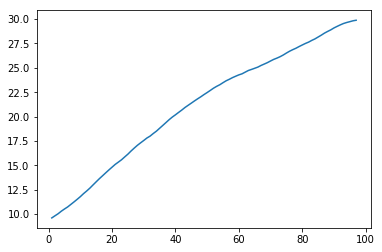

In [31]:
print("starts at episode {} and averages the past {} episodes".format(window_size, window_size))
plt.plot(range(1,len(avg_scores) +1 ), avg_scores)

In [11]:
import importlib
#importlib.reload(ddpg_multiple_agents)
importlib.reload(agent)

<module 'agent' from '/home/workspace/agent.py'>

In [10]:
%autoreload 1

When finished, you can close the environment.

In [19]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 